# _MAURITIUS: A STATISTICAL EXPLORATION_

#### by Juliet Ume-Ezeoke
##### Project Report from internship at the Mauritius Research Council

### INTRODUCTION
During my five-week internship at the Mauritius Research Council, I looked at various aspects of what makes Mauritius the country it is today. I had the opportunity to interact with its amazing people, learning about their culture and history through conversation. From what I have seen, the blend of several different ethnicities and religion creates a truly dynamic and irreplaceable nation.

I was also able to look at the country from an analytical perspective, studying the economic, educational, demographic history of Mauritius. It was interesting to study the trends, and see how they correlated to not just each other, but the information I had ascertained from conversations with Mauritians themselves.

### ABSTRACT
In performing this statistical analysis, the main question I was asking was rather broad: what is the story of Mauritius, as told by the data? Using data from the Central Statistics Office, I was able to create data frames using the Pandas Python library, and visualize the data in these data frames using the Matplotlib library. In order to perform predictive analyses, which turned out to be quite inaccurate, I used the Scikitlearn machine learning library. Graphing the data itself was quite helpful for identifying trends within individual categories, as can be seen in the first section. Comparing the data in different categories was also particularly fascinating, as it provided a clearer view of Mauritius as a whole.

In [30]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import locale
import math

%config InlineBackend.figure_formats = {'png', 'retina'}


In [31]:
count = 0

# CATEGORICAL STATISTICAL ANALYSES

## THE ECONOMY

  The Mauritian economy has often been heralded as a beacon of light in Africa. Despite being small, its ability to adjust to changing conditions in the global economy has afforded it stability and growth. The growth in the overall value of production has been extremely rapid, especially around the late 1980s. However the year-on-year growth seems to be slowing down dramatically.  
  
  It was also particularly fascinating to see how the industries that drove the economy changed over time, as shown in Figure 1.4. This graph considers only industries that have been part of the economy continuously between 1950 and 2016.   Manufacturing, which accounted for merely for five percent of economic growth in 1950, made up over 53 percent in 2016. The agriculture industry has had nearly the exact opposite experience.   
  
  The data used to create these graphs was taken from the website of the Central Statistics Office. 

In [32]:
# reading cleaned dataframes from Mauritius Demographic Stats.ipynb 
df_GDP = pd.read_pickle('GDP.pkl')
df_GDP_per = pd.read_pickle('GDP_per.pkl')
df_GDP2 = pd.read_pickle('GDP2.pkl')

In [33]:
# main dataframe 
df_GDP.head()

agriculture mining manufacturing power government services  \
Years                                                              
1953          177      1           108     7         17       43   
1954          170      1           106     7         18       44   
1955          179      1           109     8         20       46   
1956          200      1           120     8         21       50   
1957          200      1           115     8         22       55   

      gdp_market_price  
Years                   
1953               594  
1954               590  
1955               618  
1956               661  
1957               683

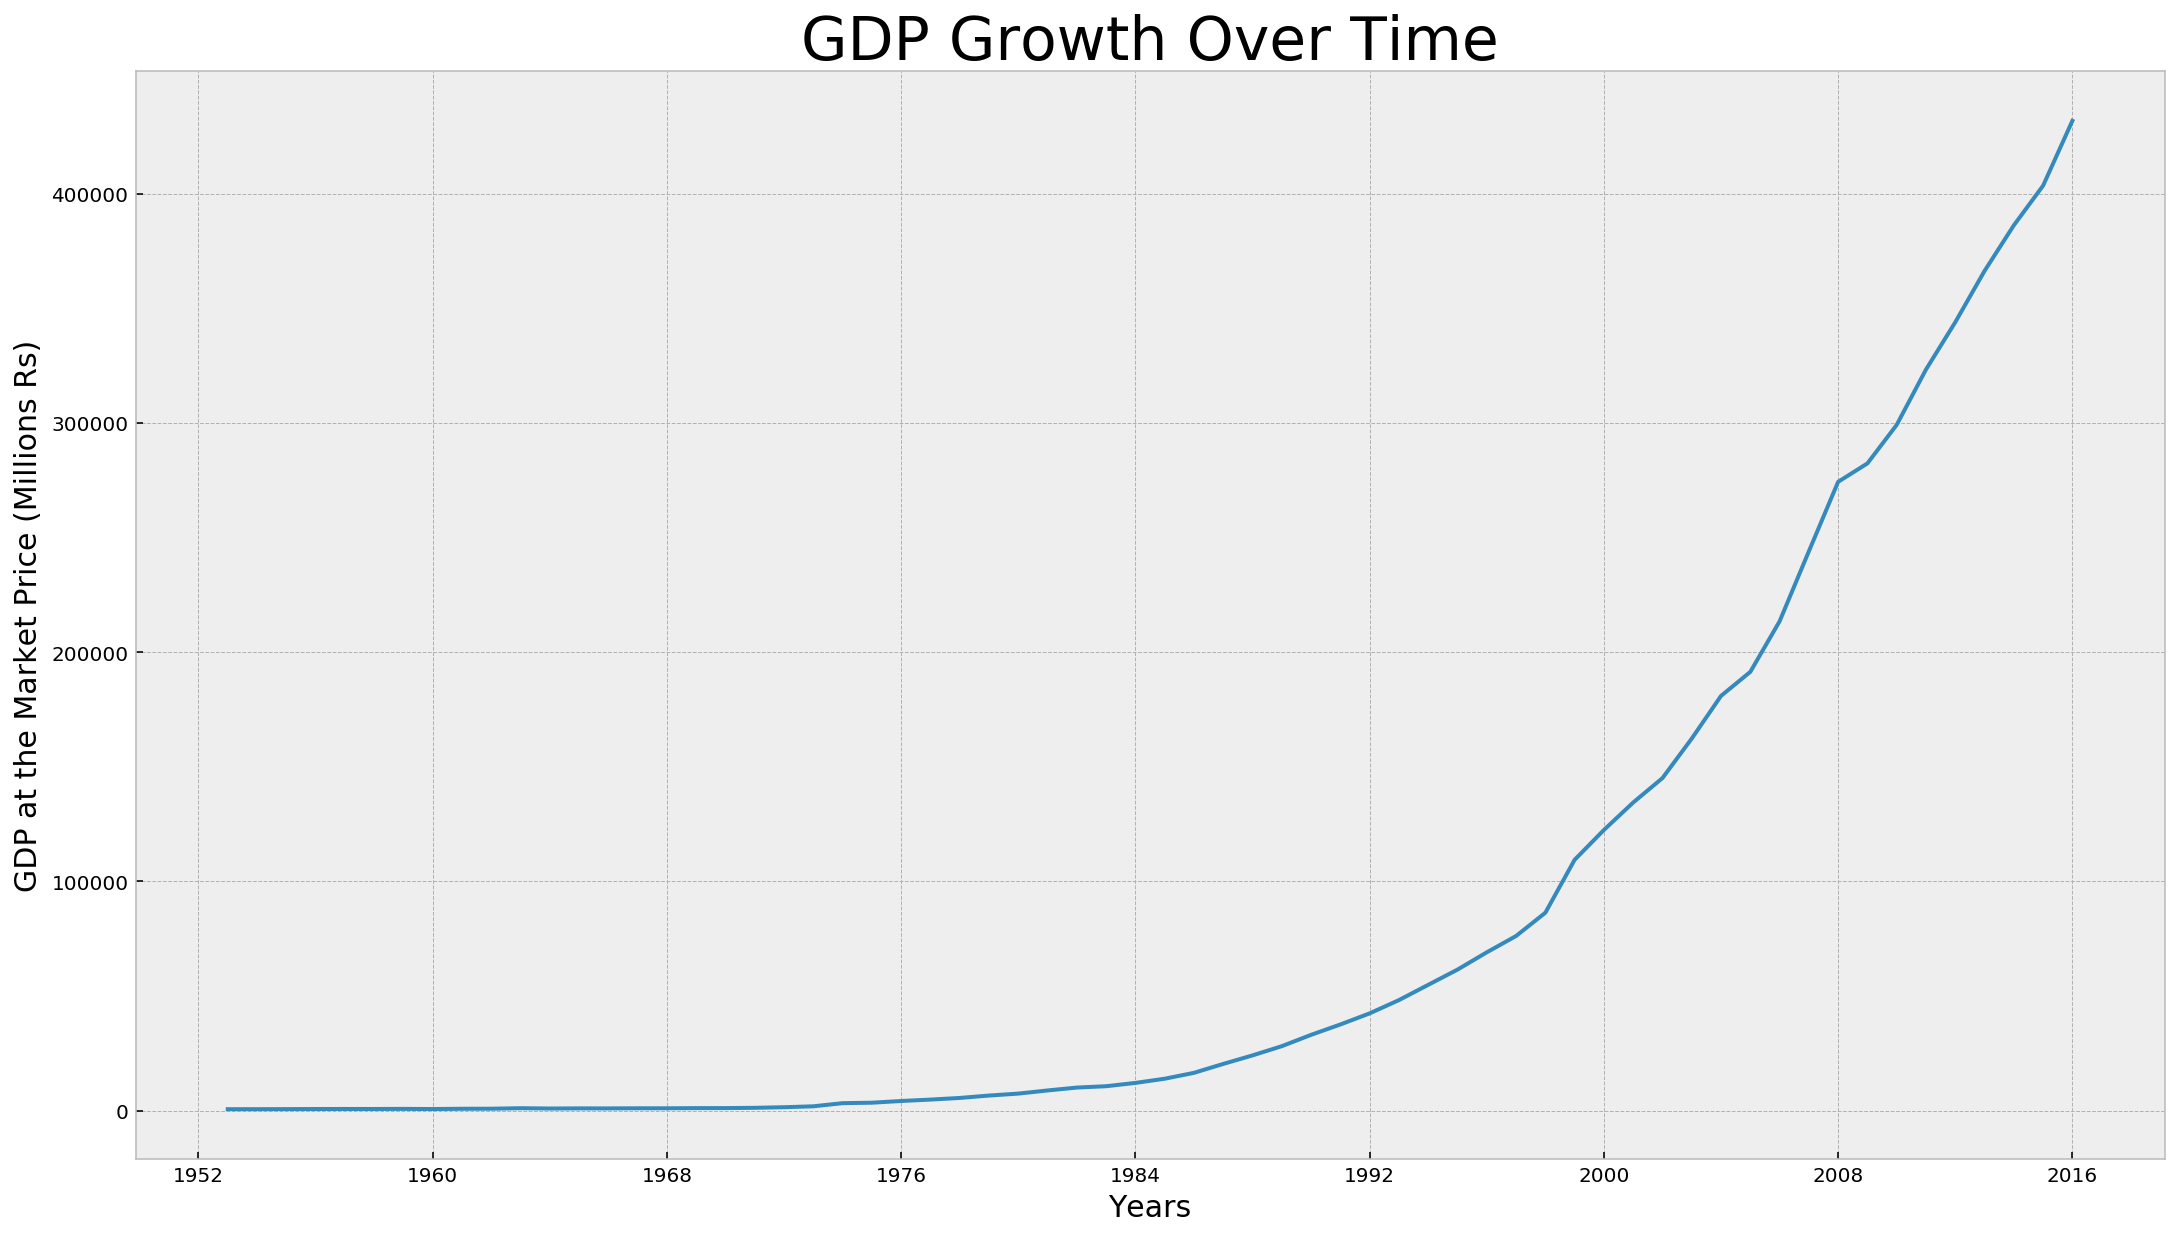

In [34]:
x = df_GDP.index.astype(int)
y = df_GDP['gdp_market_price']


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('GDP at the Market Price (Millions Rs)', fontsize=15)
plt.title('GDP Growth Over Time', fontsize=30)
plt.plot(linewidth = 10)

plt.plot(x,y)

plt.show


count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)


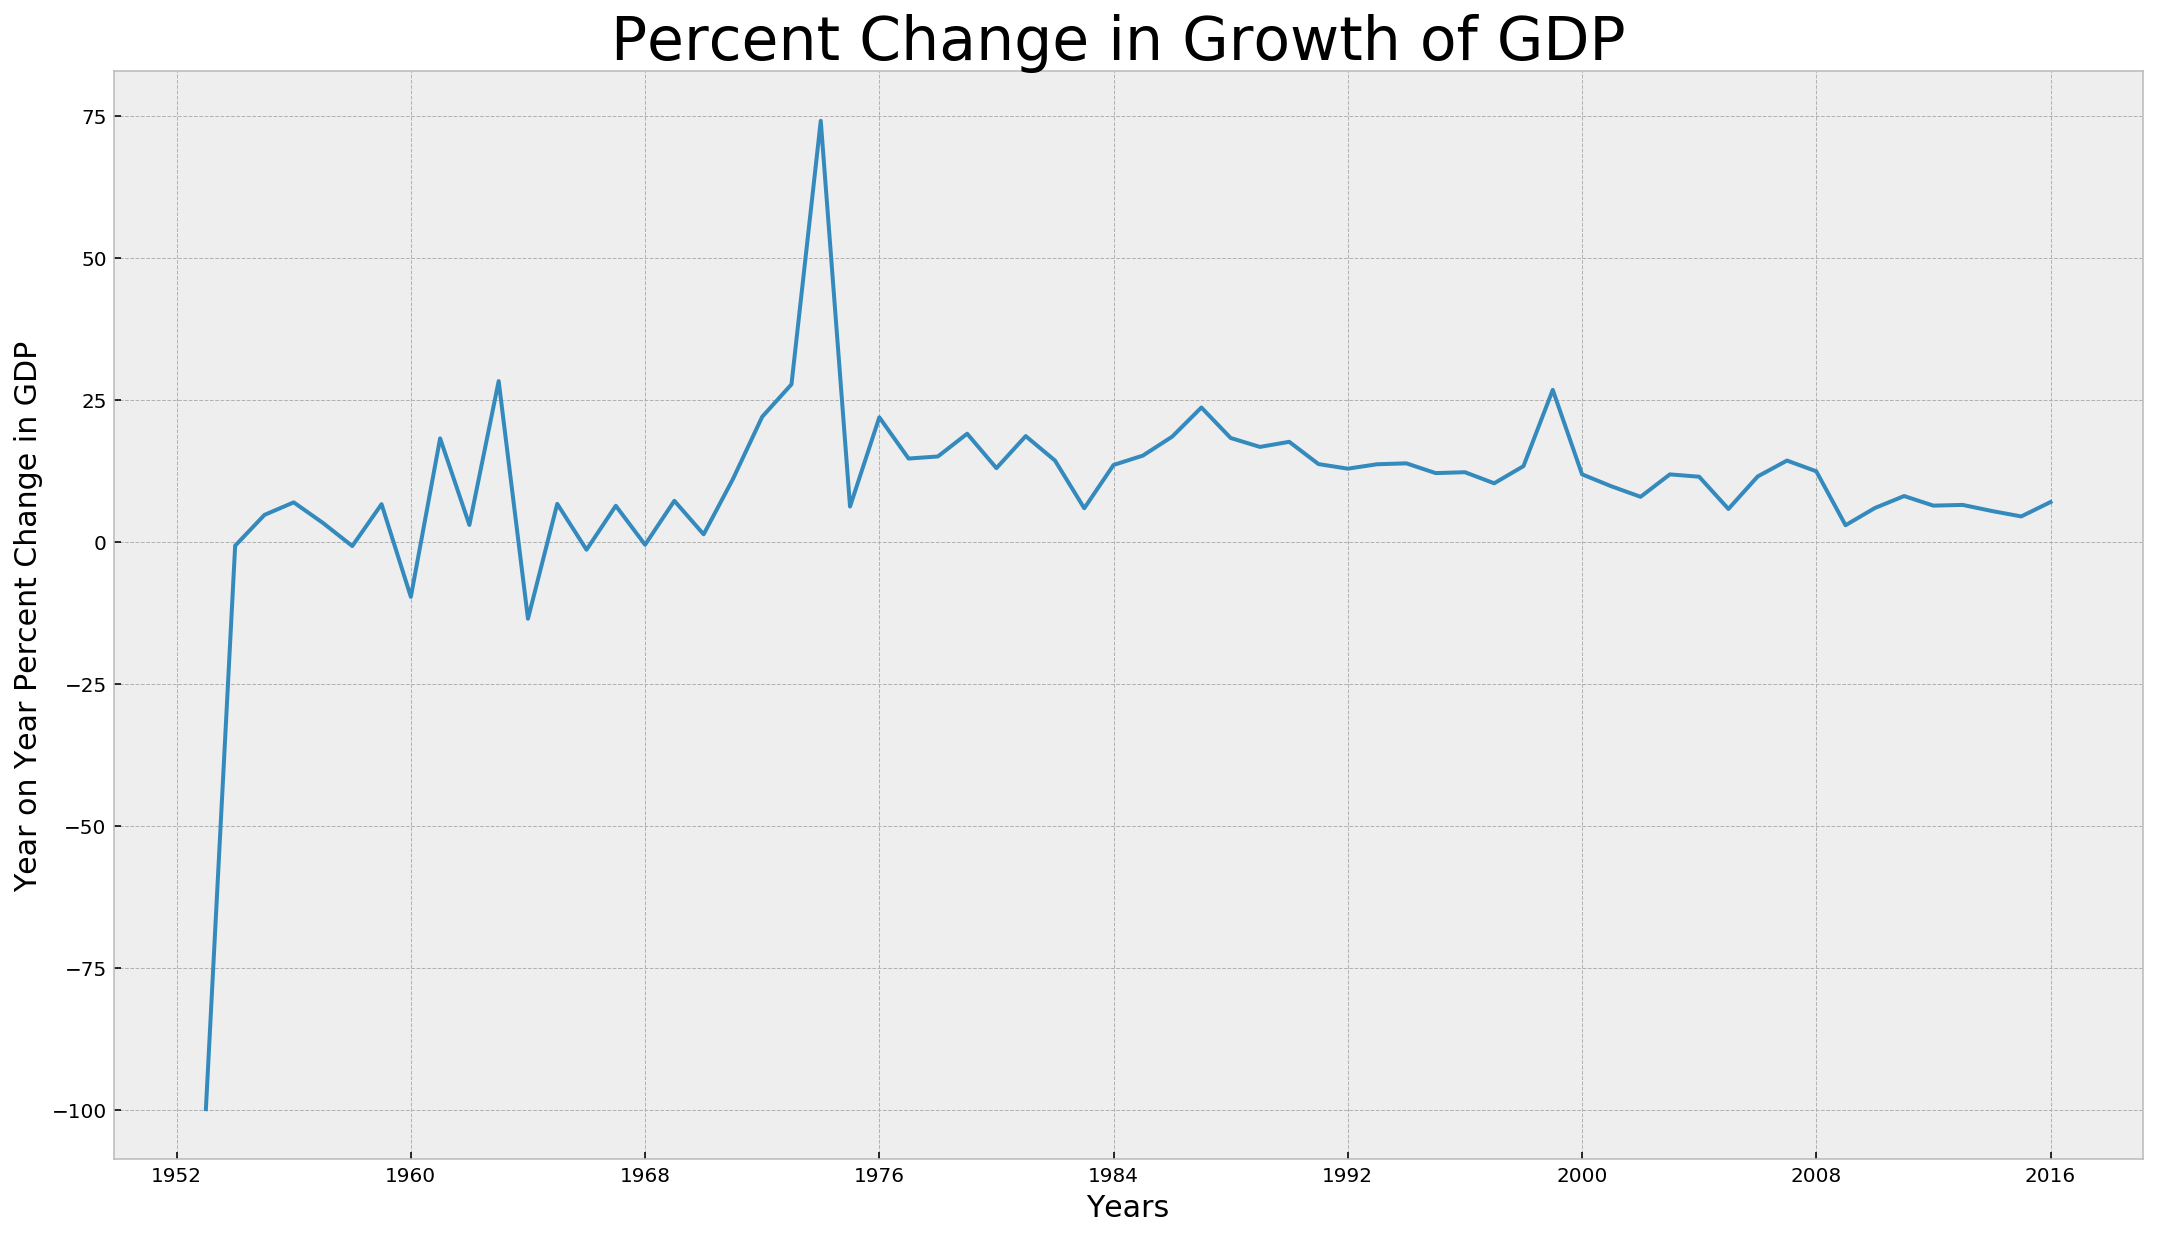

In [35]:
xa = df_GDP_per.index.astype(int)
ya = df_GDP_per['gdp_market_price']


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('Year on Year Percent Change in GDP', fontsize=15)
plt.title('Percent Change in Growth of GDP ', fontsize=30)

plt.plot(linewidth = 10)

plt.plot(xa,ya)
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)


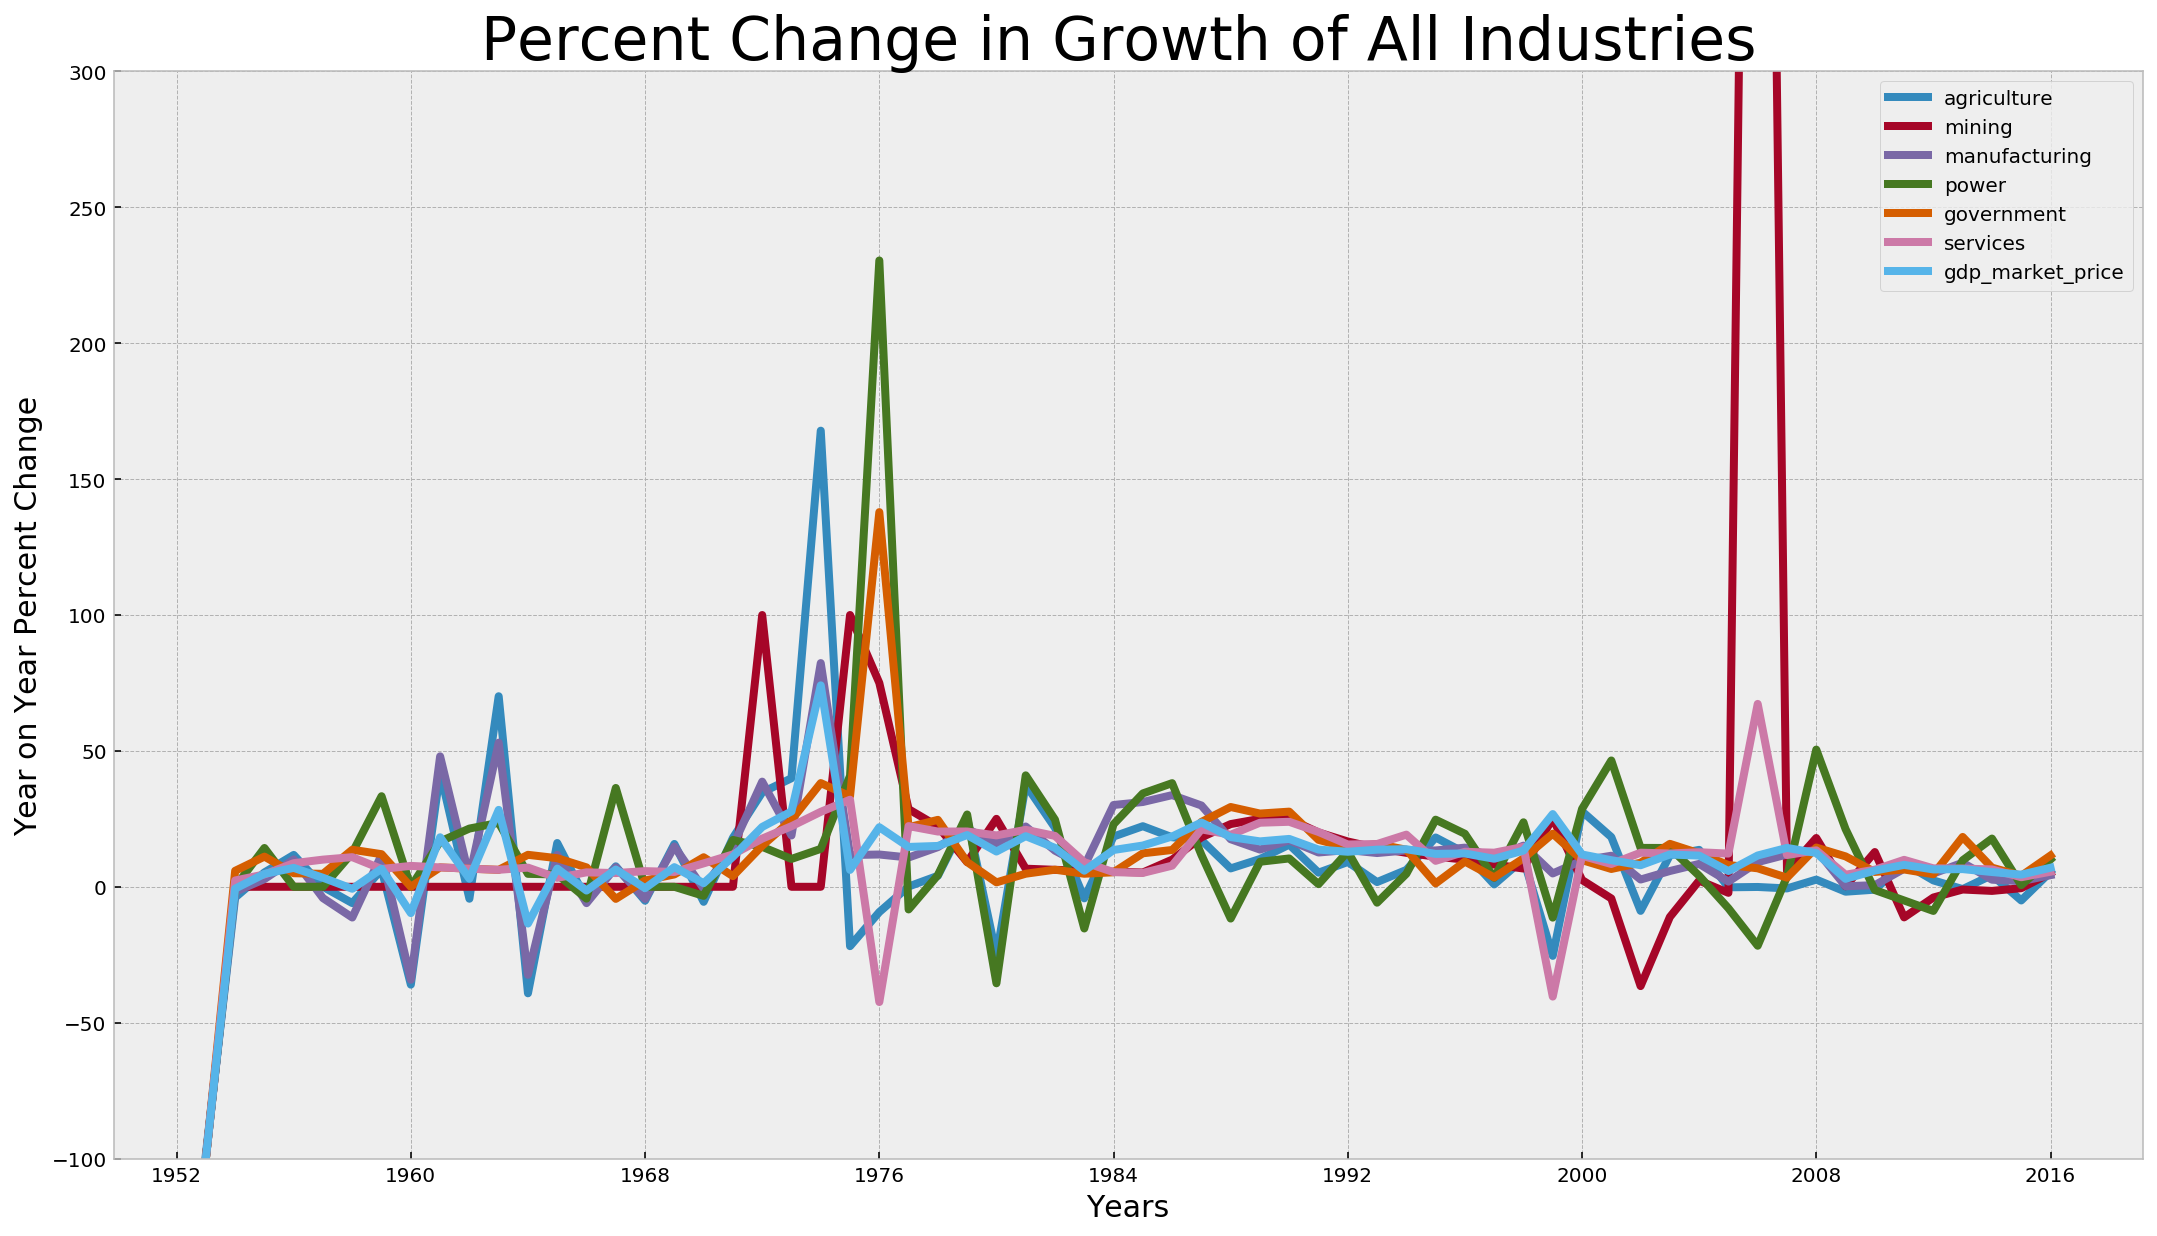

In [36]:
xa = df_GDP_per.index.astype(int)
ya = df_GDP_per


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('Year on Year Percent Change', fontsize=15)
plt.title('Percent Change in Growth of All Industries ', fontsize=30)

plt.plot(linewidth = 15)
plt.ylim(-100,300)

plt.plot(xa,ya, linewidth = 4)
plt.legend(df_GDP_per.columns)
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

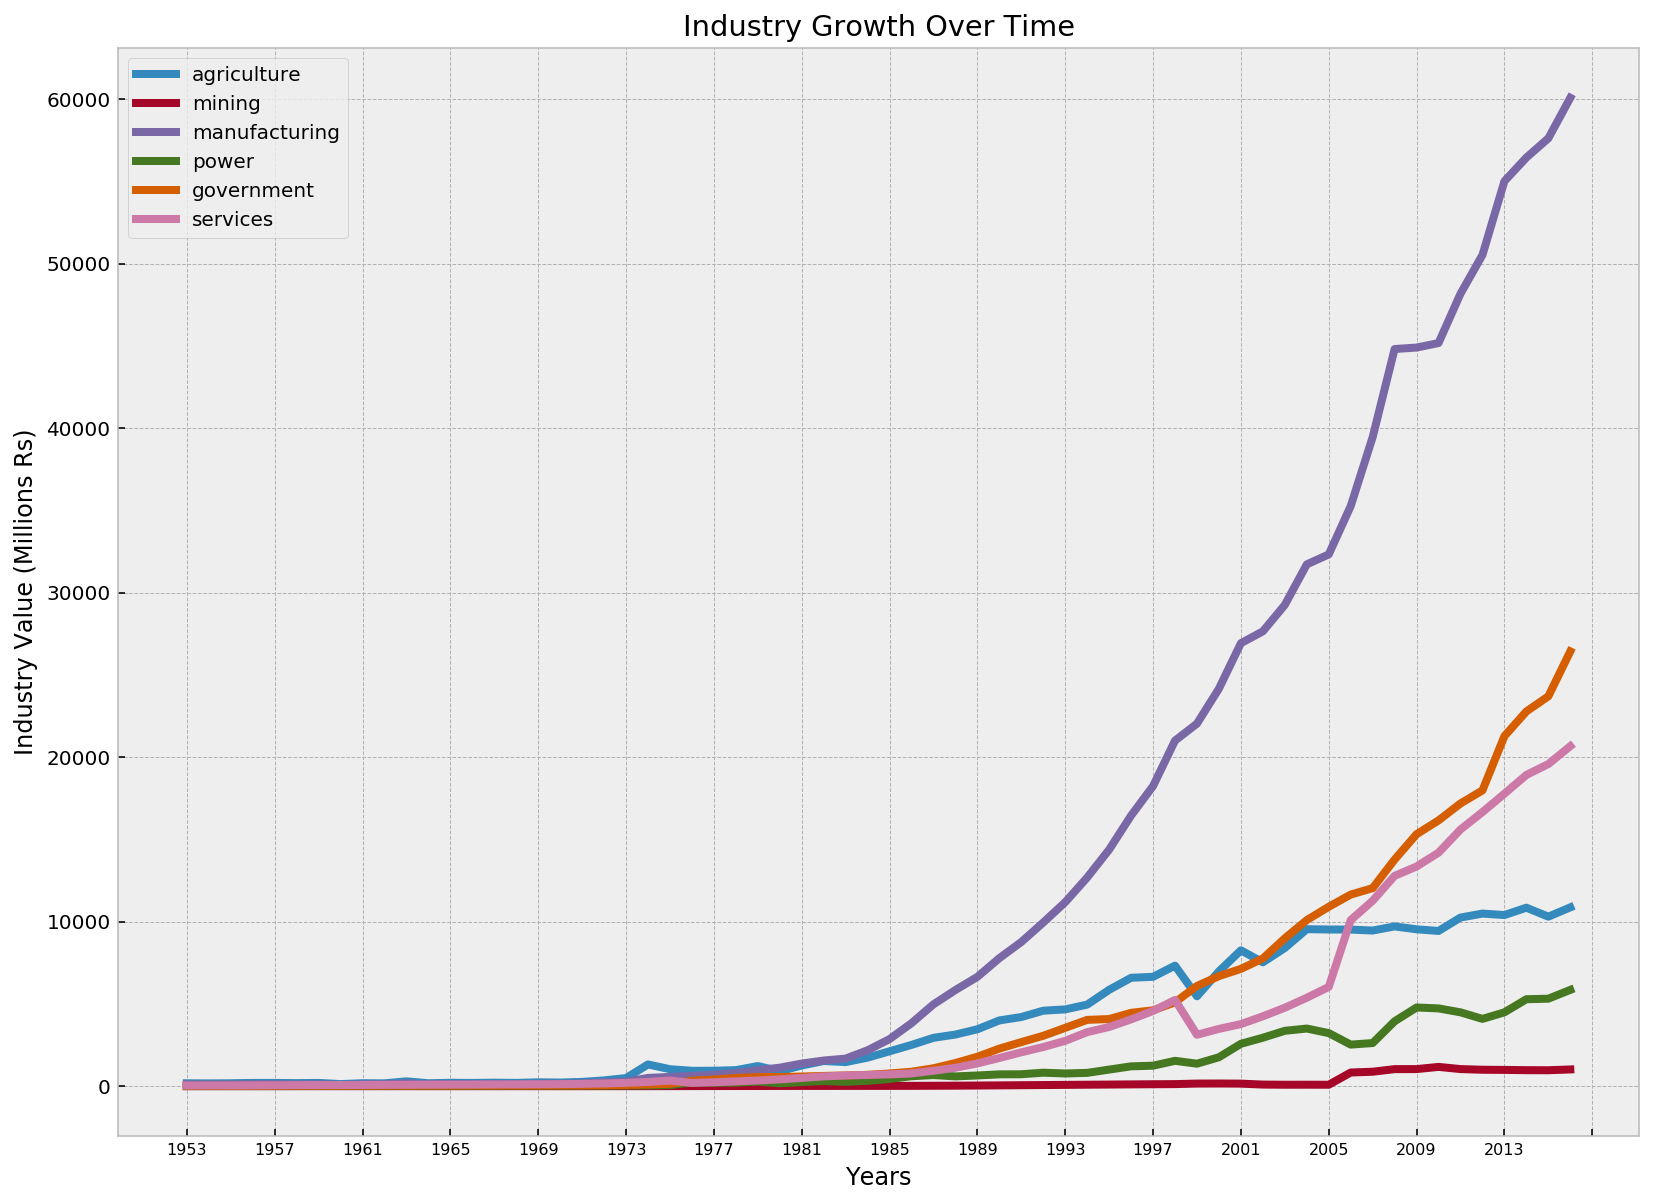

In [37]:
x = df_GDP2.index.astype(str)
y = df_GDP2

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(121)

# number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

ax.tick_params(axis='x', labelsize=8)
# where is the legend????
plt.plot(x,y, linewidth = 4)

plt.xlabel('Years')
plt.ylabel('Industry Value (Millions Rs)')
plt.title('Industry Growth Over Time')
plt.legend(df_GDP2.columns)

plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

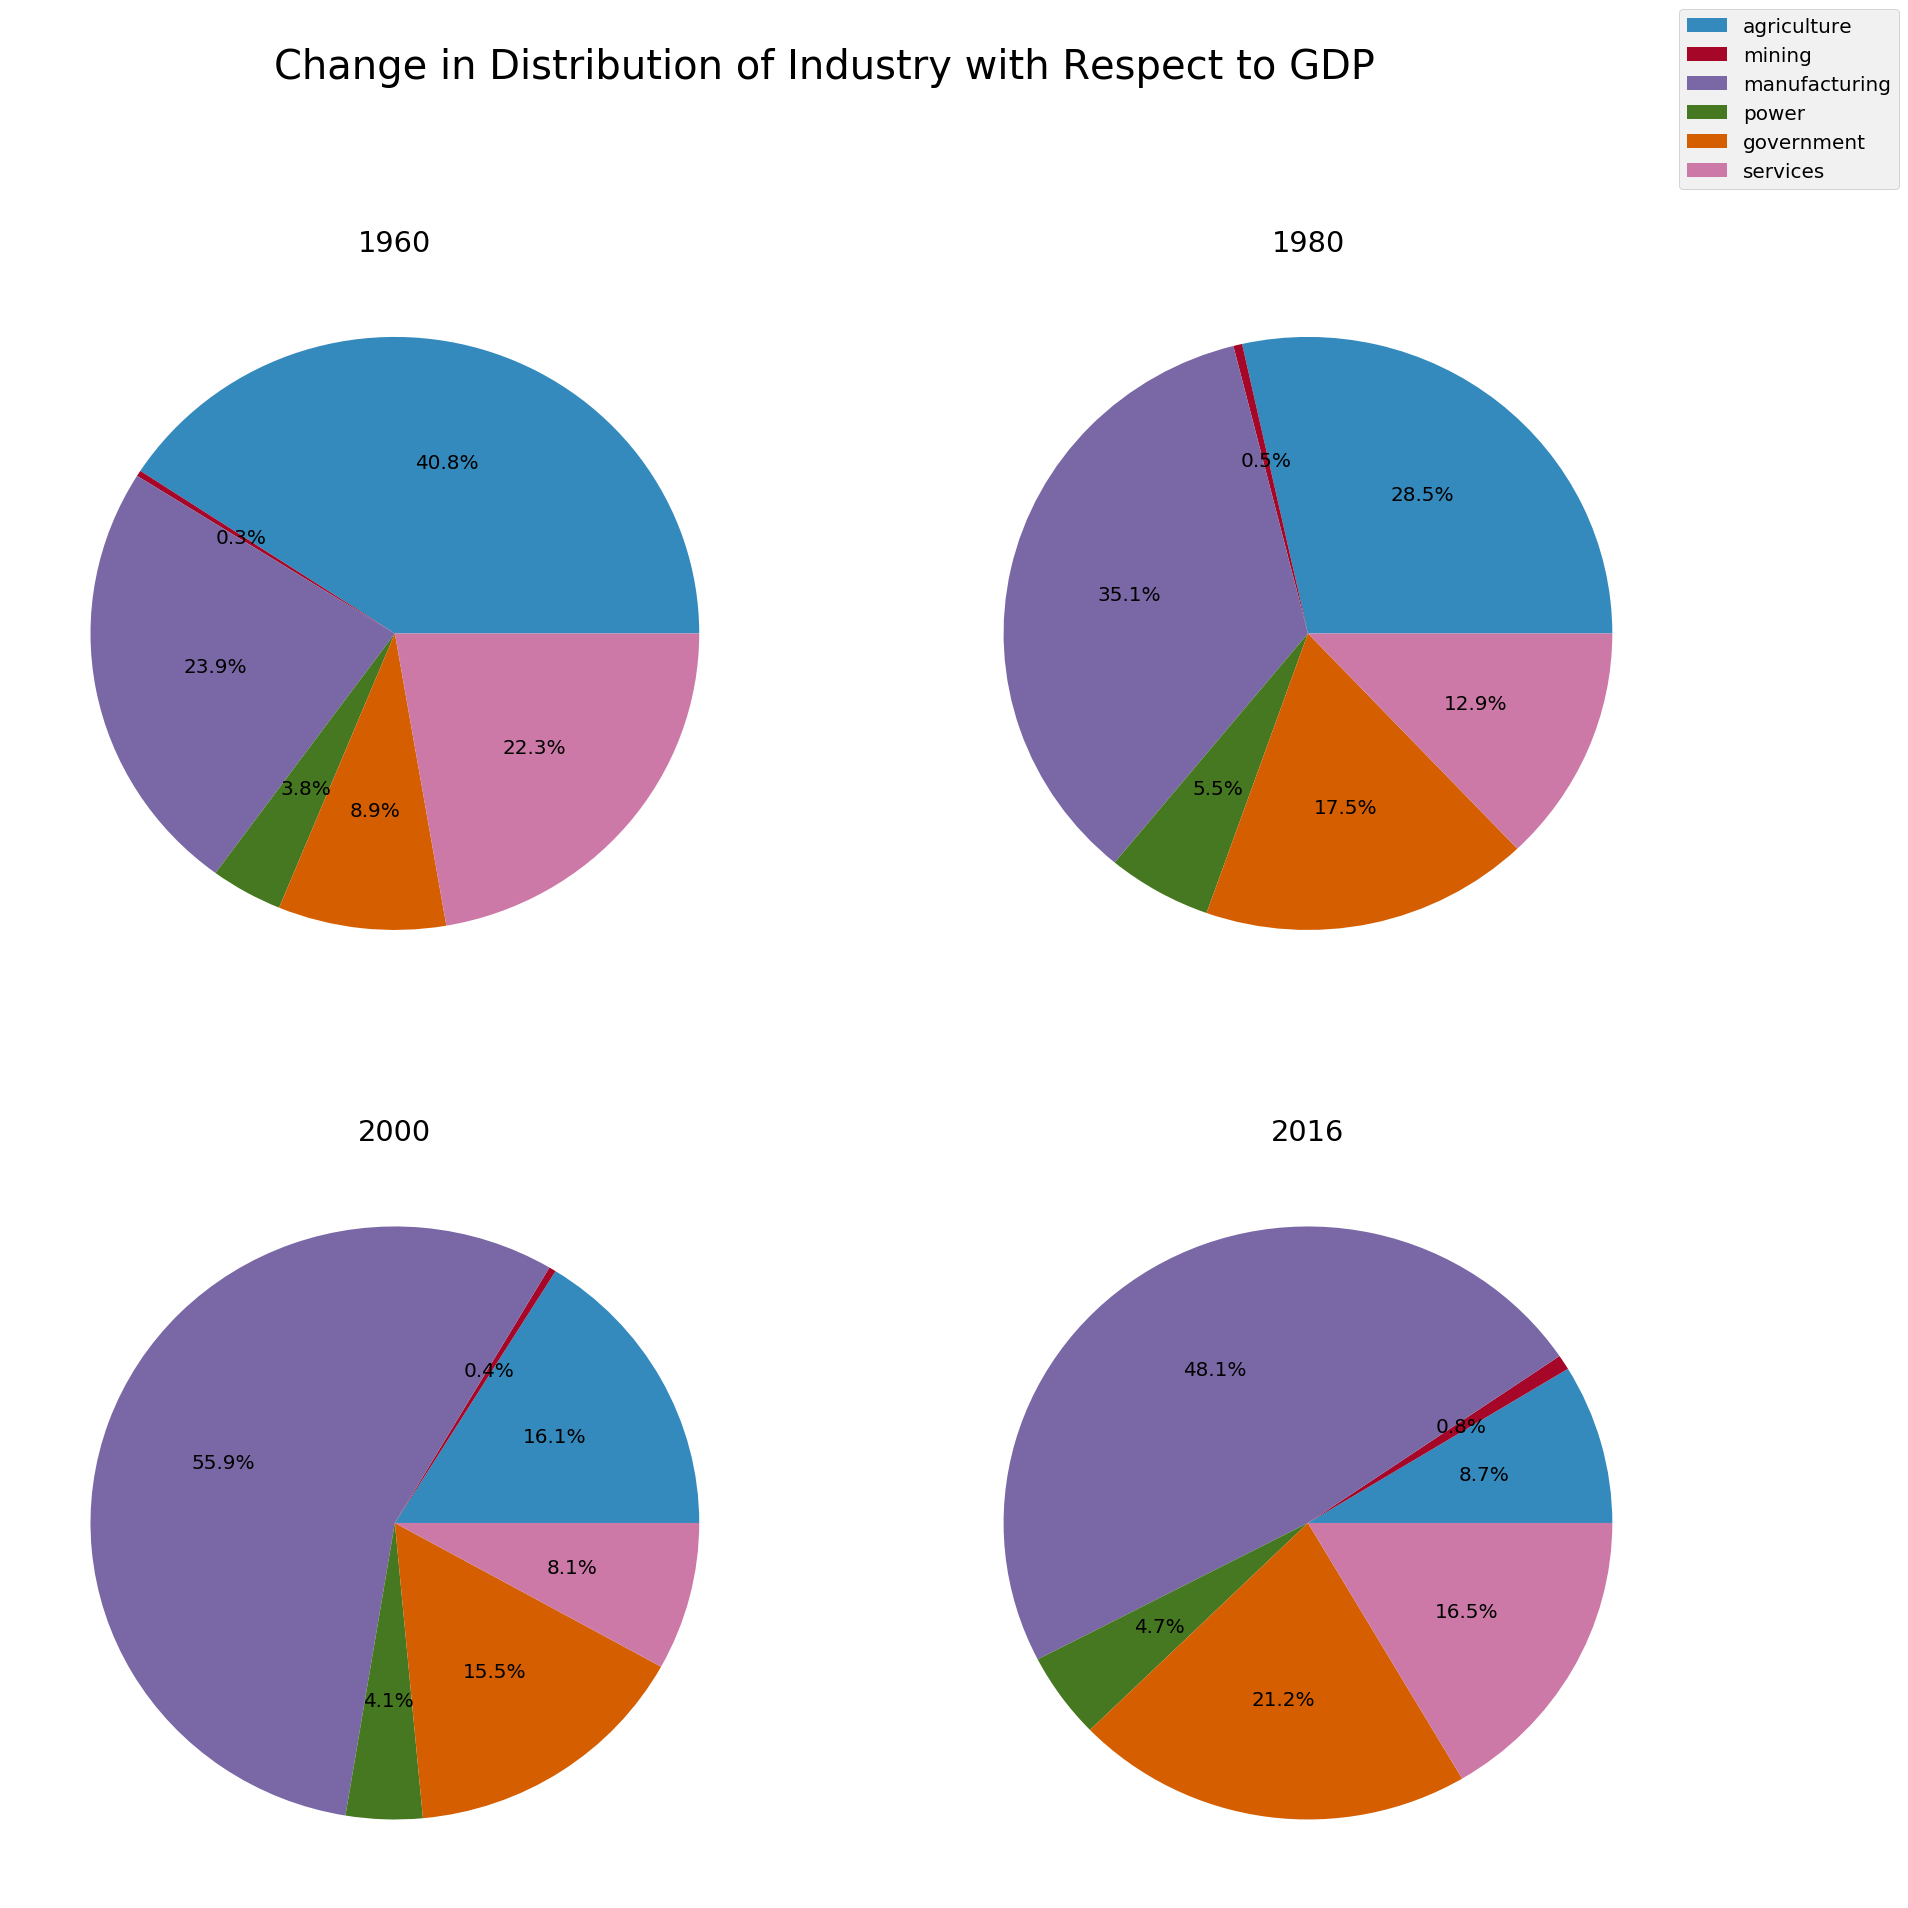

In [38]:
x50 = df_GDP2.loc['1960']
x70 = df_GDP2.loc['1980']
x90 = df_GDP2.loc['2000']
x2016 = df_GDP2.loc[2016]

fig, axes = plt.subplots(2,2,  figsize=(15,15))



axes[0,0].pie(x50, autopct='%.1f%%', pctdistance = 0.6)
axes[0,0].set_title("1960")
axes[0,1].pie(x70, autopct='%.1f%%', pctdistance = 0.6)
axes[0,1].set_title("1980")
axes[1,0].pie(x90, autopct='%.1f%%', pctdistance = 0.6)
axes[1,0].set_title("2000")
axes[1,1].pie(x2016, autopct='%.1f%%', pctdistance = 0.6)
axes[1,1].set_title("2016")

fig.suptitle("Change in Distribution of Industry with Respect to GDP", fontsize = 20)
plt.figlegend(list(df_GDP2.columns))


plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

## EDUCATION
Data concerning education in Mauritius follows an interesting trend that mirrors the country’s history. In 1976, primary education was made free for all.  At this time, it appeared that enrolment totals were trending down steeply. However, there is a large peak in 1987, perhaps indicting a decade long delay for the legislation’s effects to be seen. One interesting fact to point out with regards to enrolment in primary schools is that it is almost always above the population considered to be of primary school age. One reason for this might be that students outside of the primary school age range were frequently enrolled in primary schools up until 2012.  

Secondary school enrolment is a different story. Here, the number of students enrolled falls far below the population, only really beginning to converge in late 2010. There is, however, an interesting peak in enrolment around 1970. In 1988, secondary education was made free as well.  The effects of this legislation are much clearer in secondary education than in primary, as secondary enrolment began to grow at historical rates after 1988.  

With regards to enrolment in tertiary institutions, it is clear the public universities are the most popular choice among Mauritians. However, this might not be the case for long as enrolment in these universities shows a recent downward trend. The enrolment in overseas universities is clearly diverging from both other enrolment trends, and the population of possible attendees is leveling off. It would be interesting to examine why this is the case.  

The data used to create these graphs was taken from the website of the Central Statistics Office. 


In [39]:
# read cleaned dataframes from Mauritius Education Stats.ipynb
df_prim_educ = pd.read_pickle('df_prim_educ.pkl')
df_sec_educ = pd.read_pickle('df_sec_educ.pkl')
df_ter_educ = pd.read_pickle('df_ter_educ.pkl')

### Primary Education

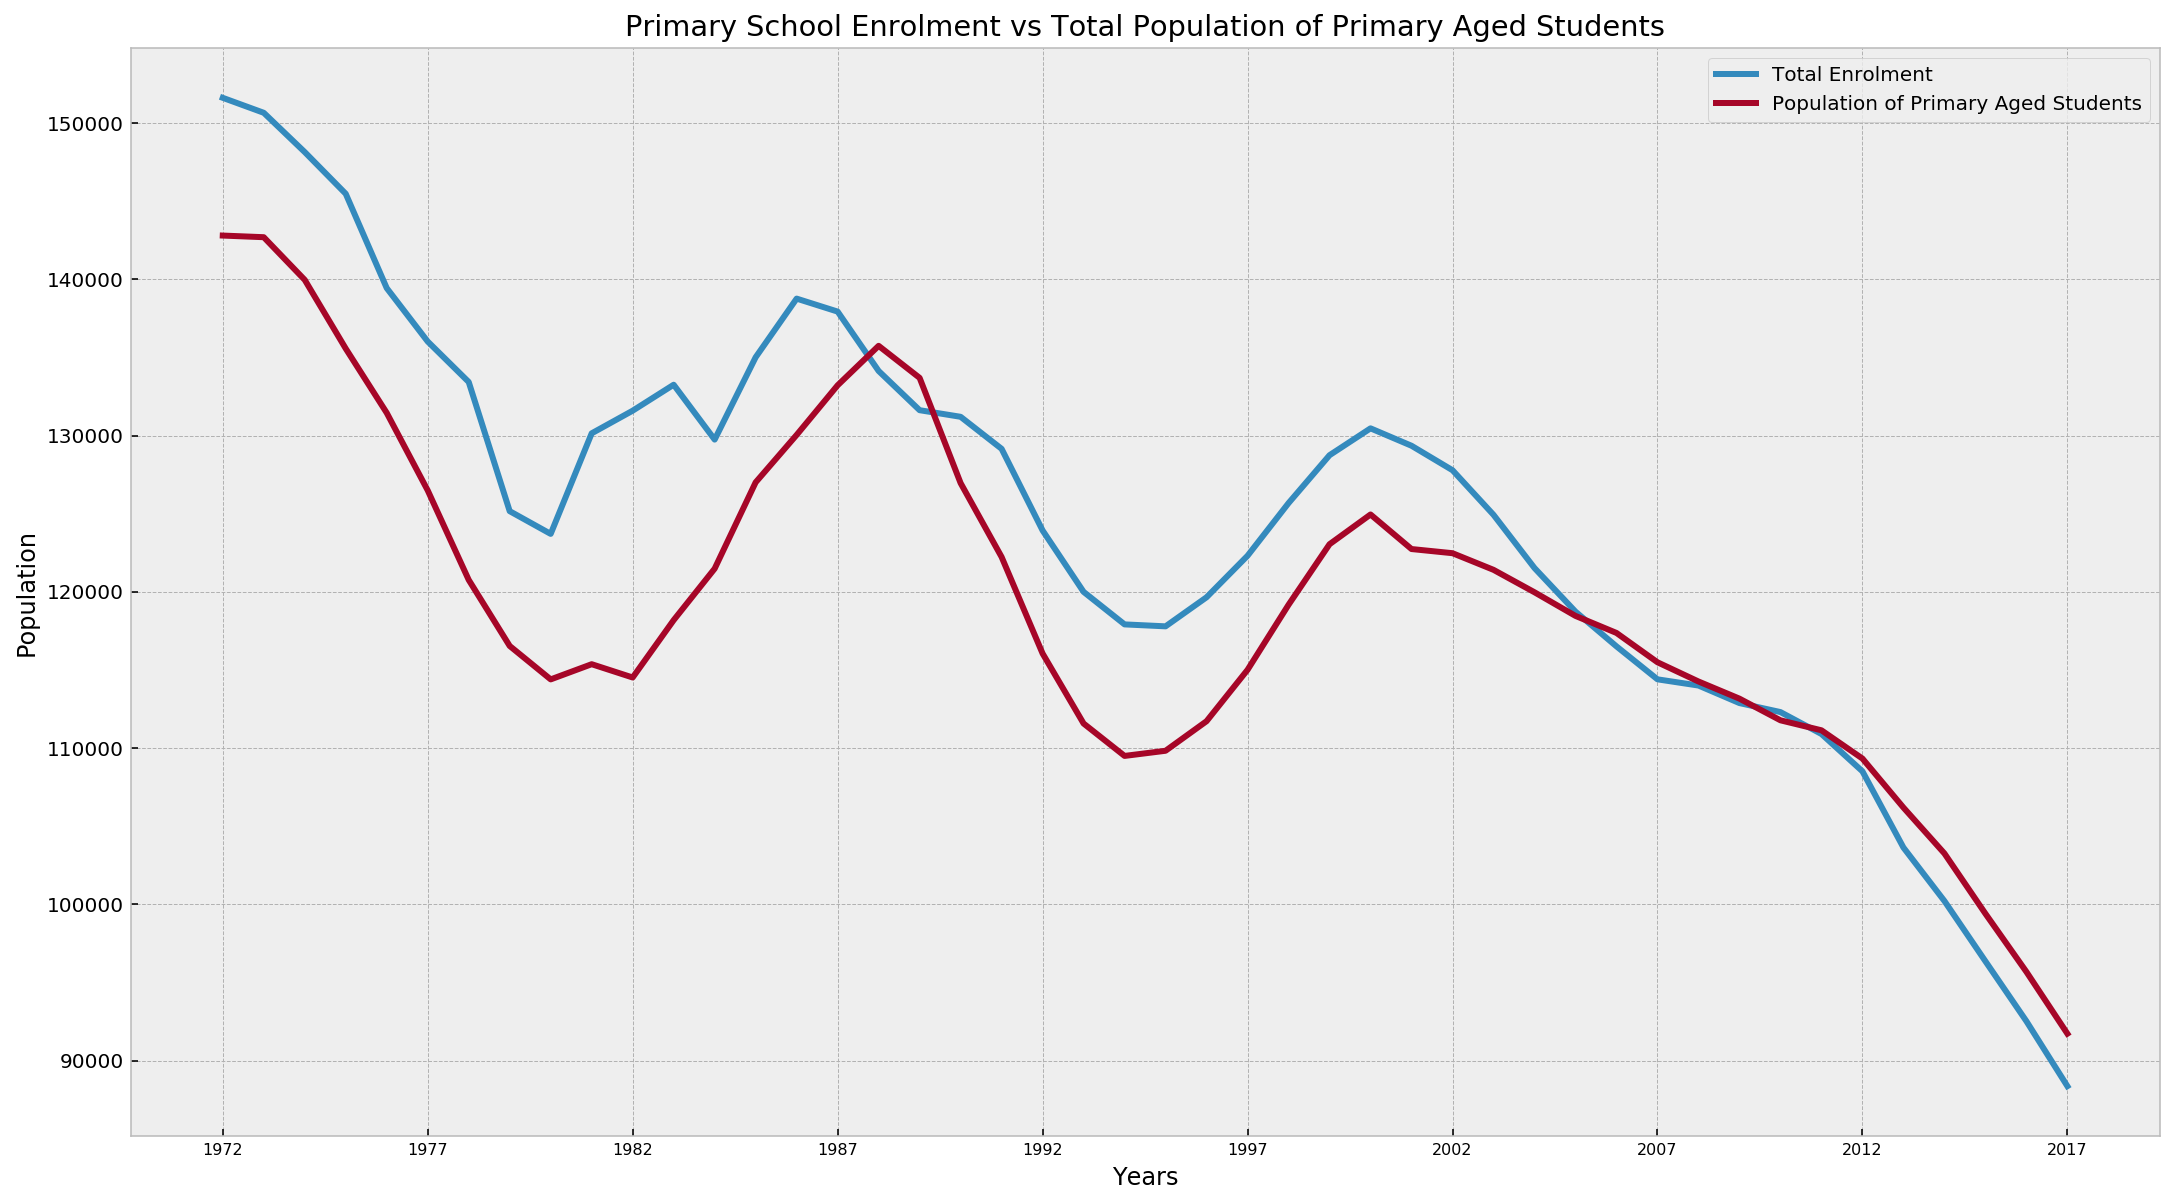

In [40]:
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Total']
z = df_prim_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 3)
plt.legend(['Total Enrolment', 'Population of Primary Aged Students'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Primary School Enrolment vs Total Population of Primary Aged Students')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

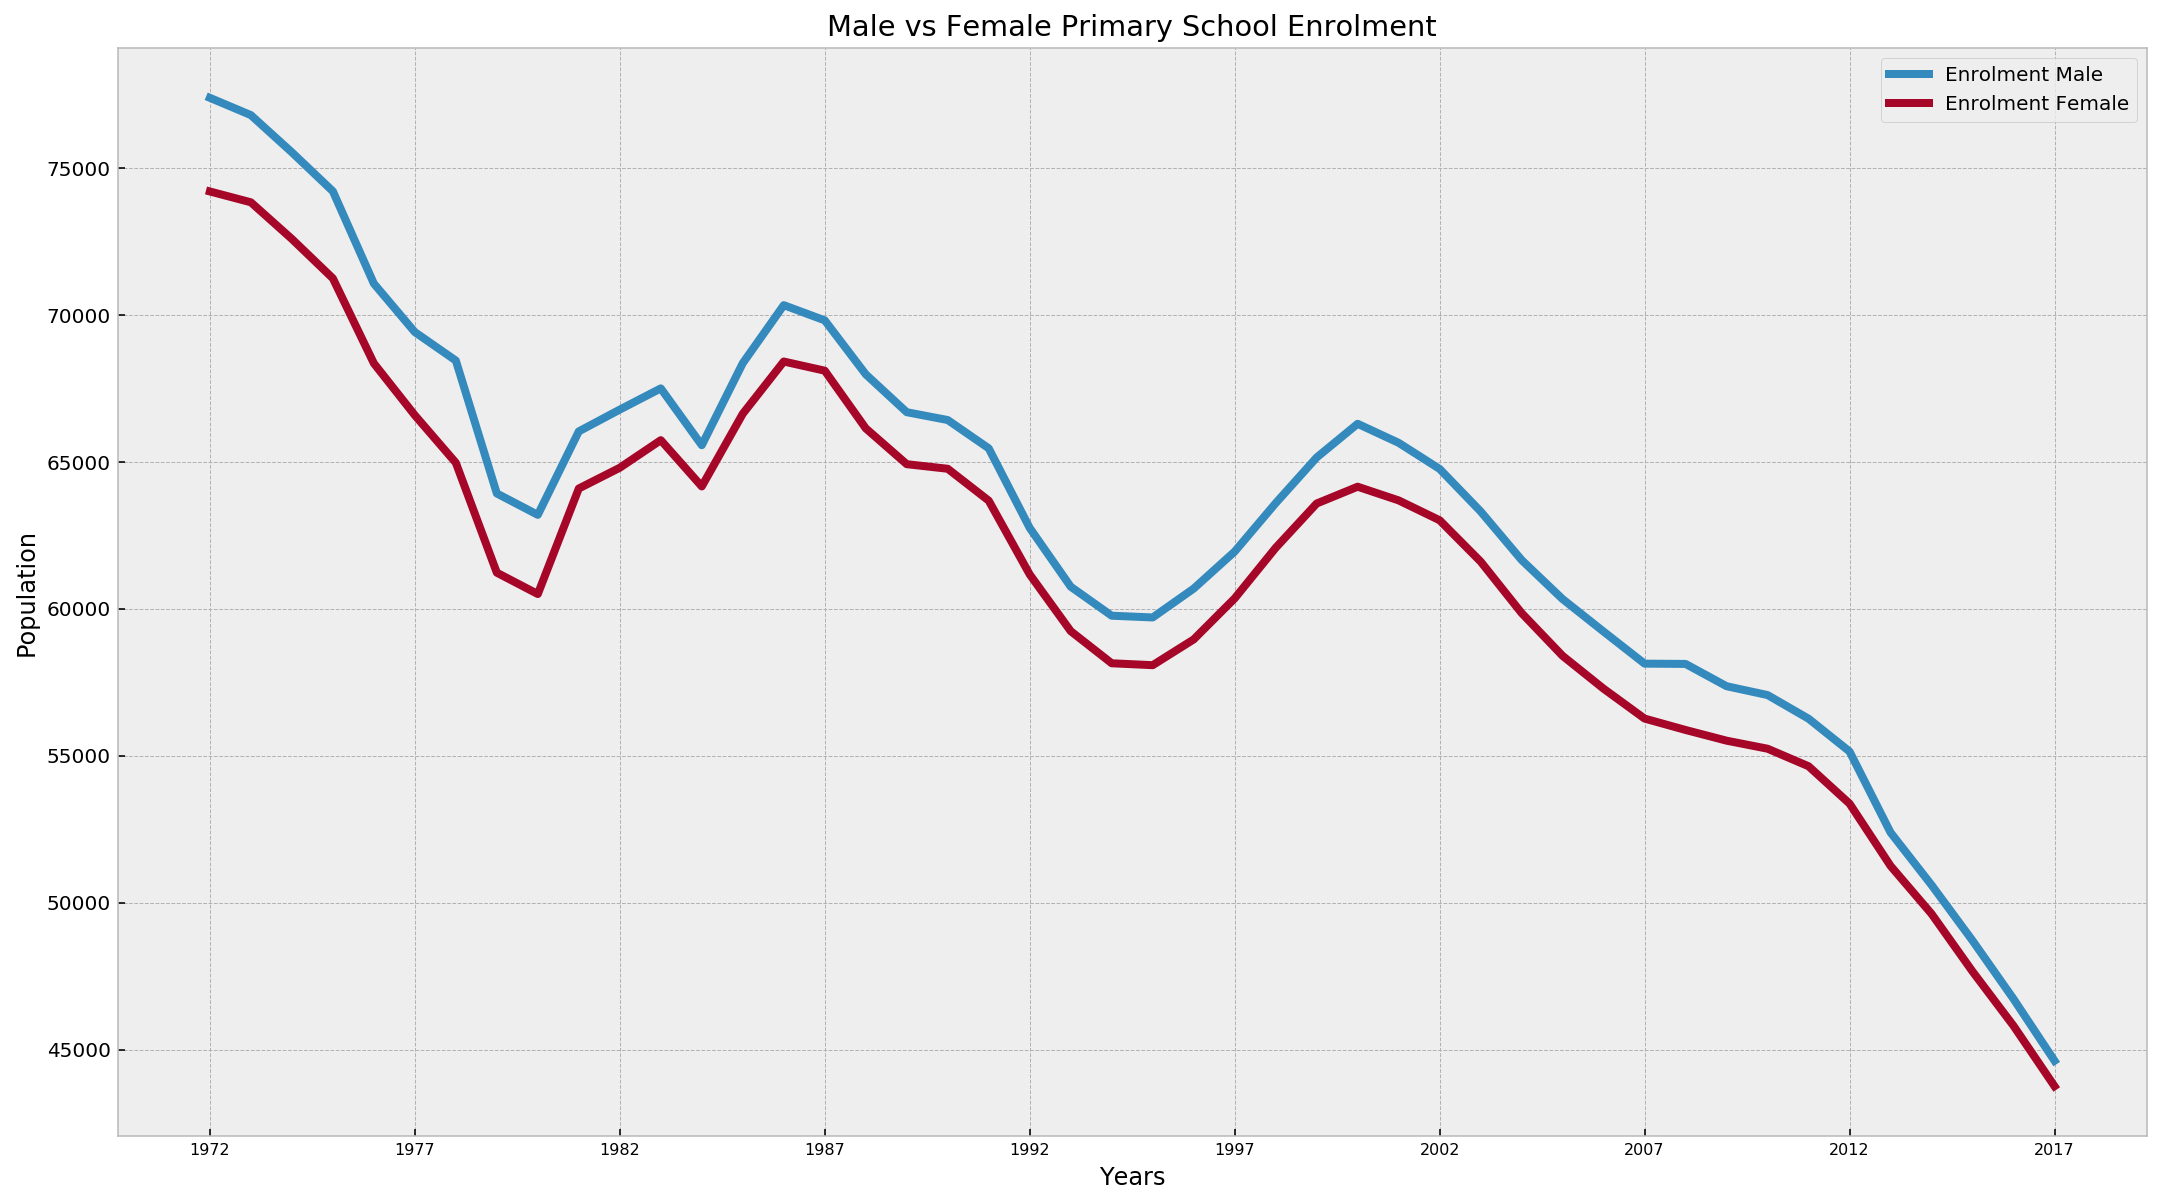

In [41]:
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Male']
z = df_prim_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male vs Female Primary School Enrolment')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

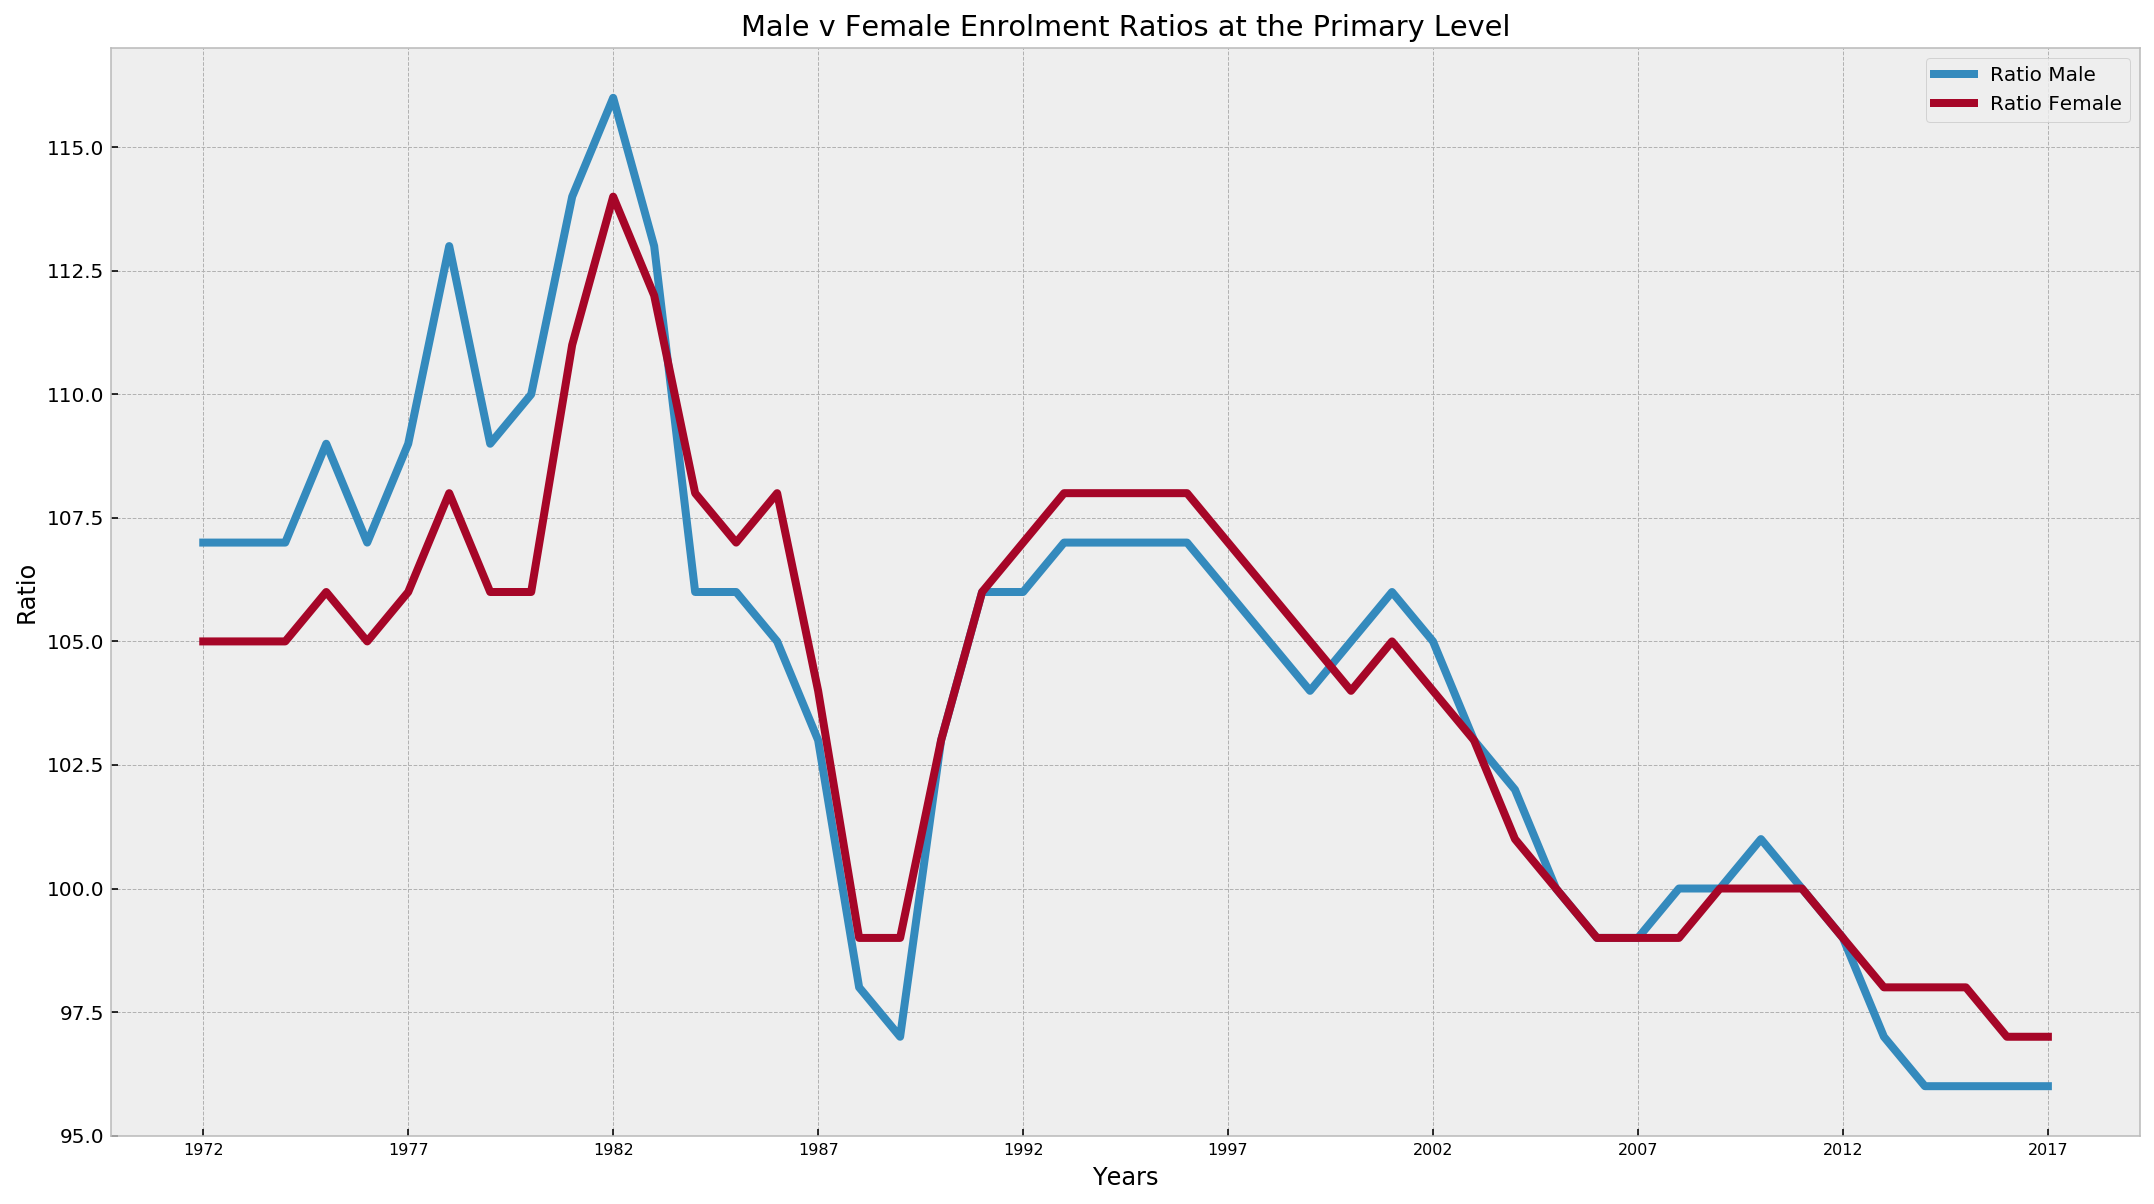

In [42]:
x = df_prim_educ.index
y = df_prim_educ['Ratio_Male']
z = df_prim_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Ratio Male','Ratio Female'])
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.title('Male v Female Enrolment Ratios at the Primary Level')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

### Secondary Education 

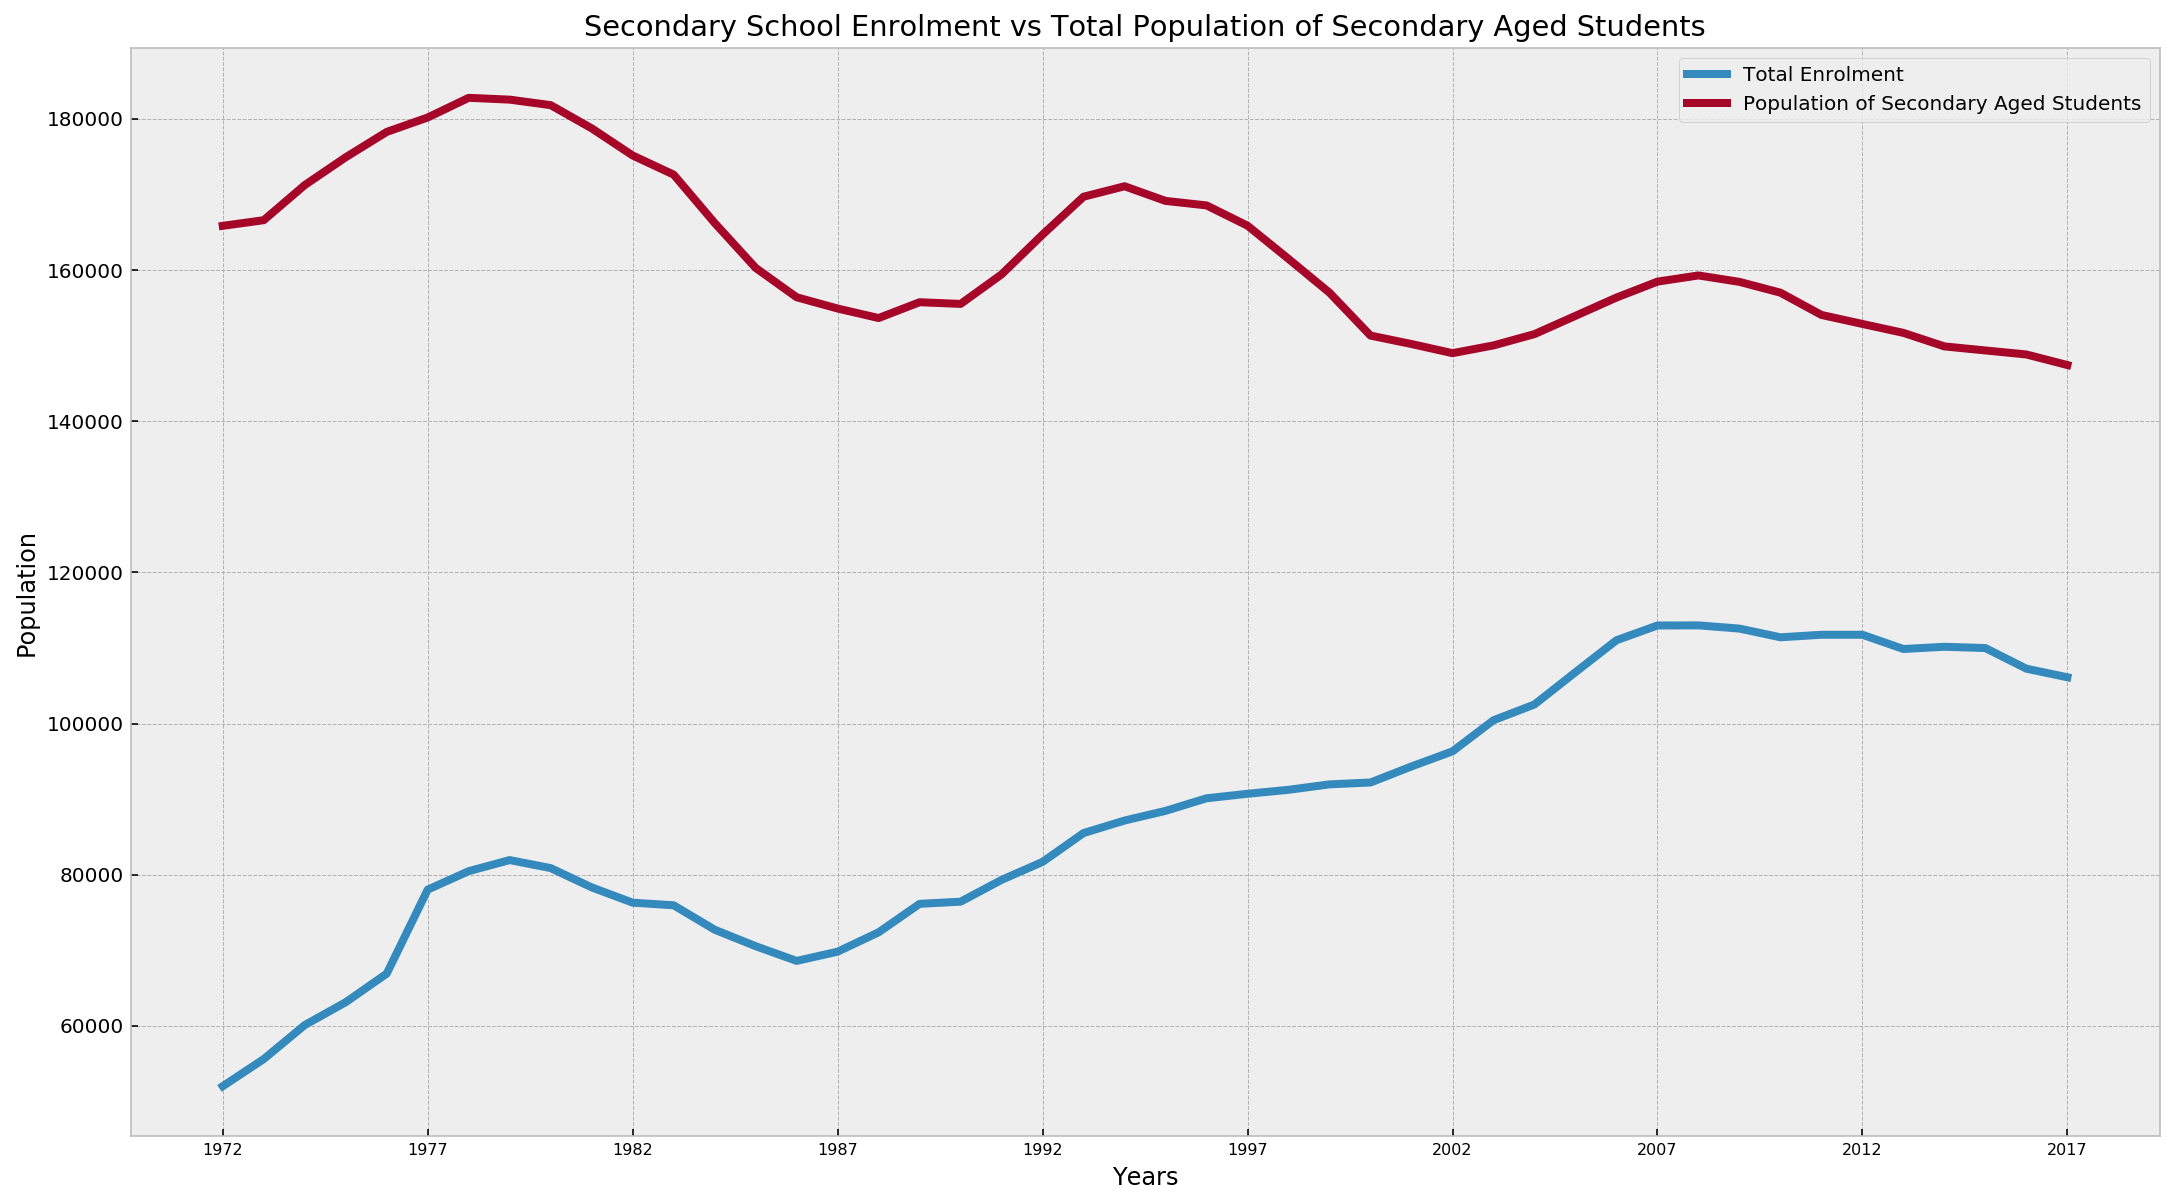

In [43]:
x = df_prim_educ.index
y = df_sec_educ['Enrolment_Total']
z = df_sec_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Total Enrolment','Population of Secondary Aged Students'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Secondary School Enrolment vs Total Population of Secondary Aged Students')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

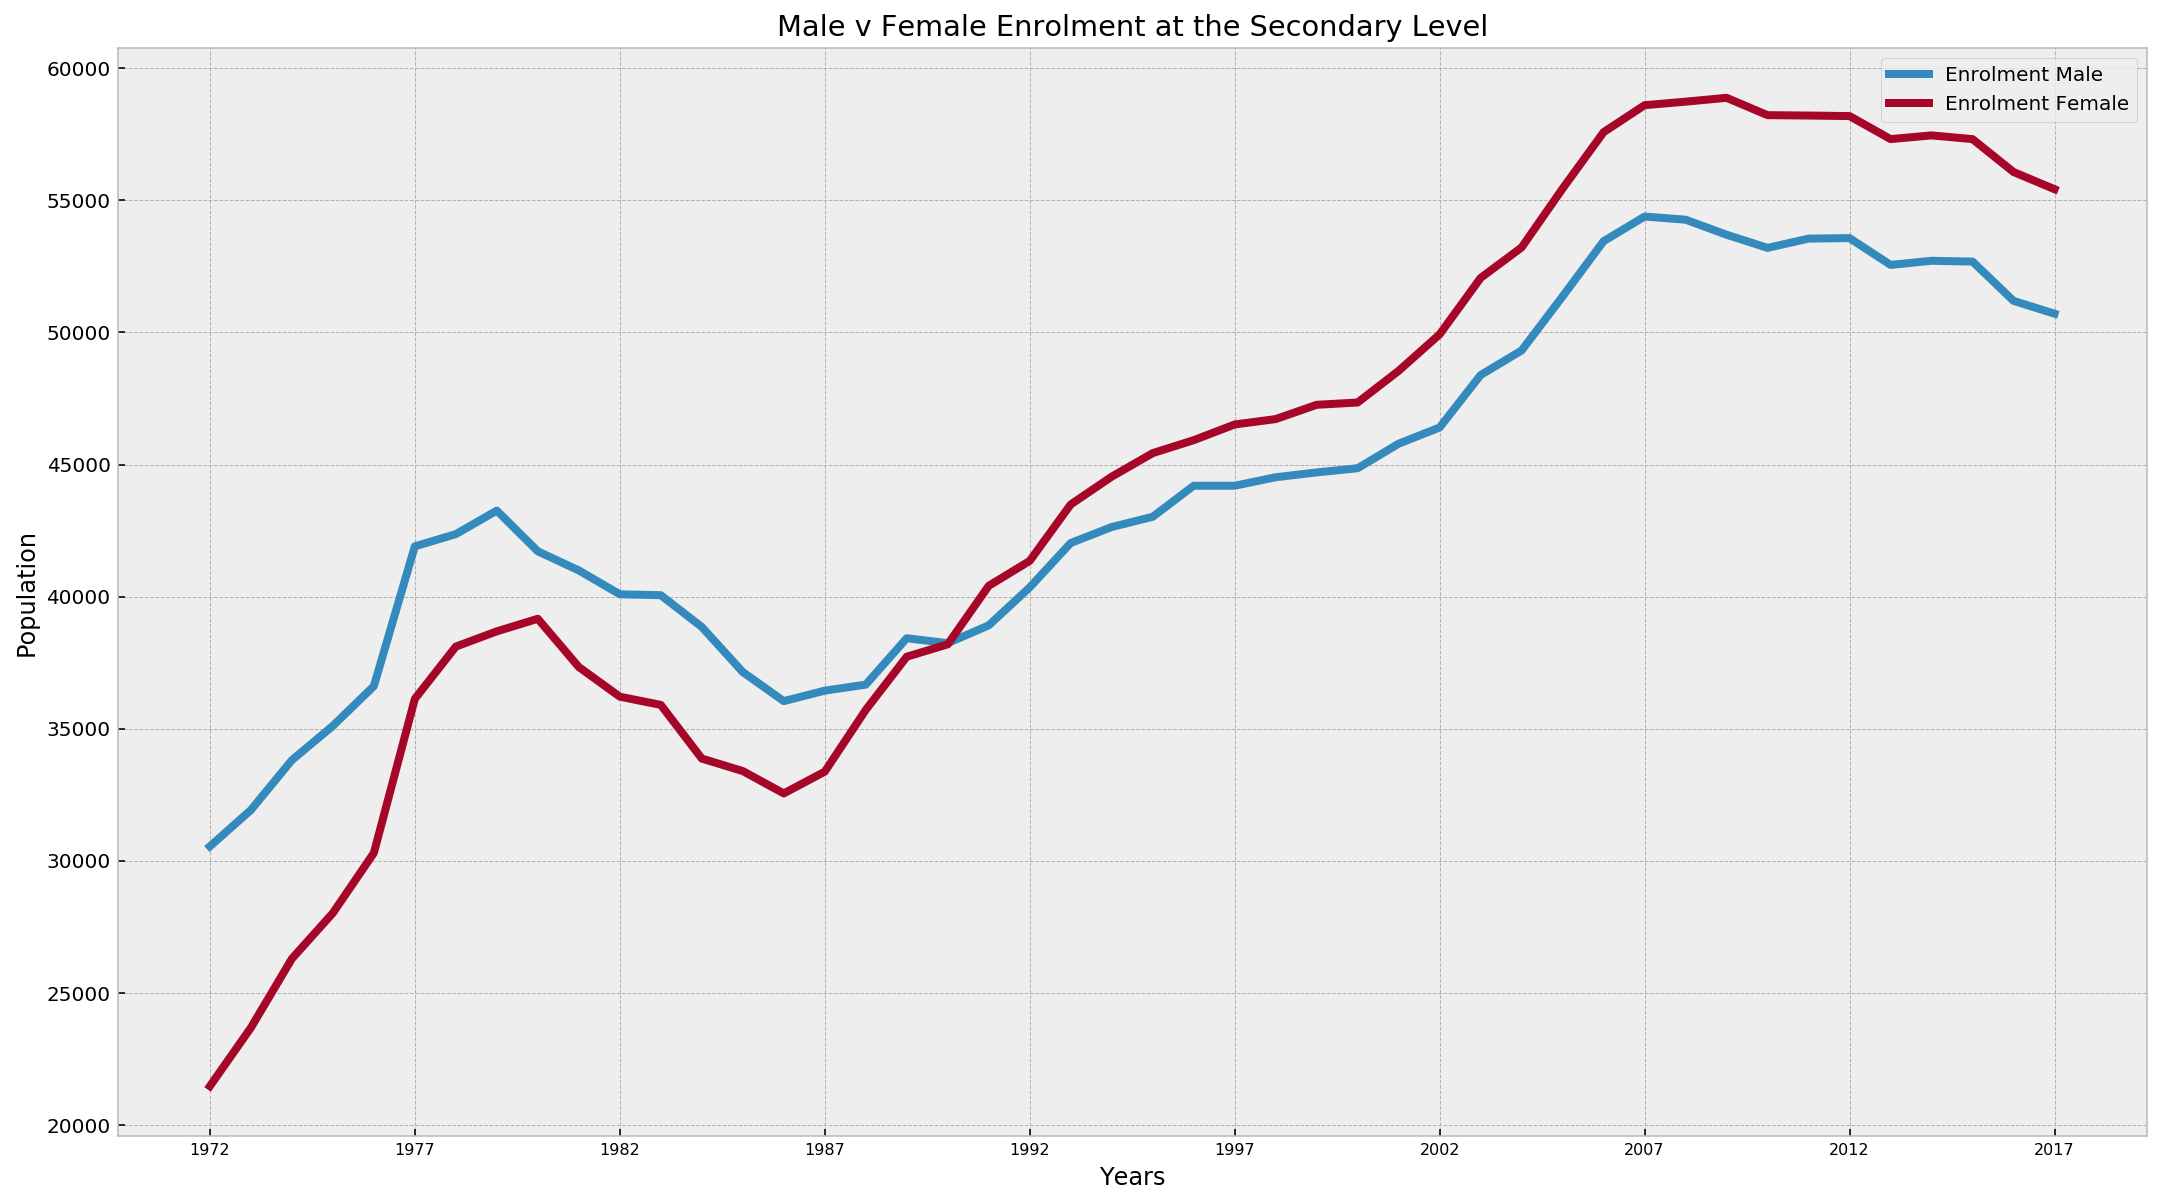

In [44]:
x = df_sec_educ.index
y = df_sec_educ['Enrolment_Male']
z = df_sec_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male v Female Enrolment at the Secondary Level')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

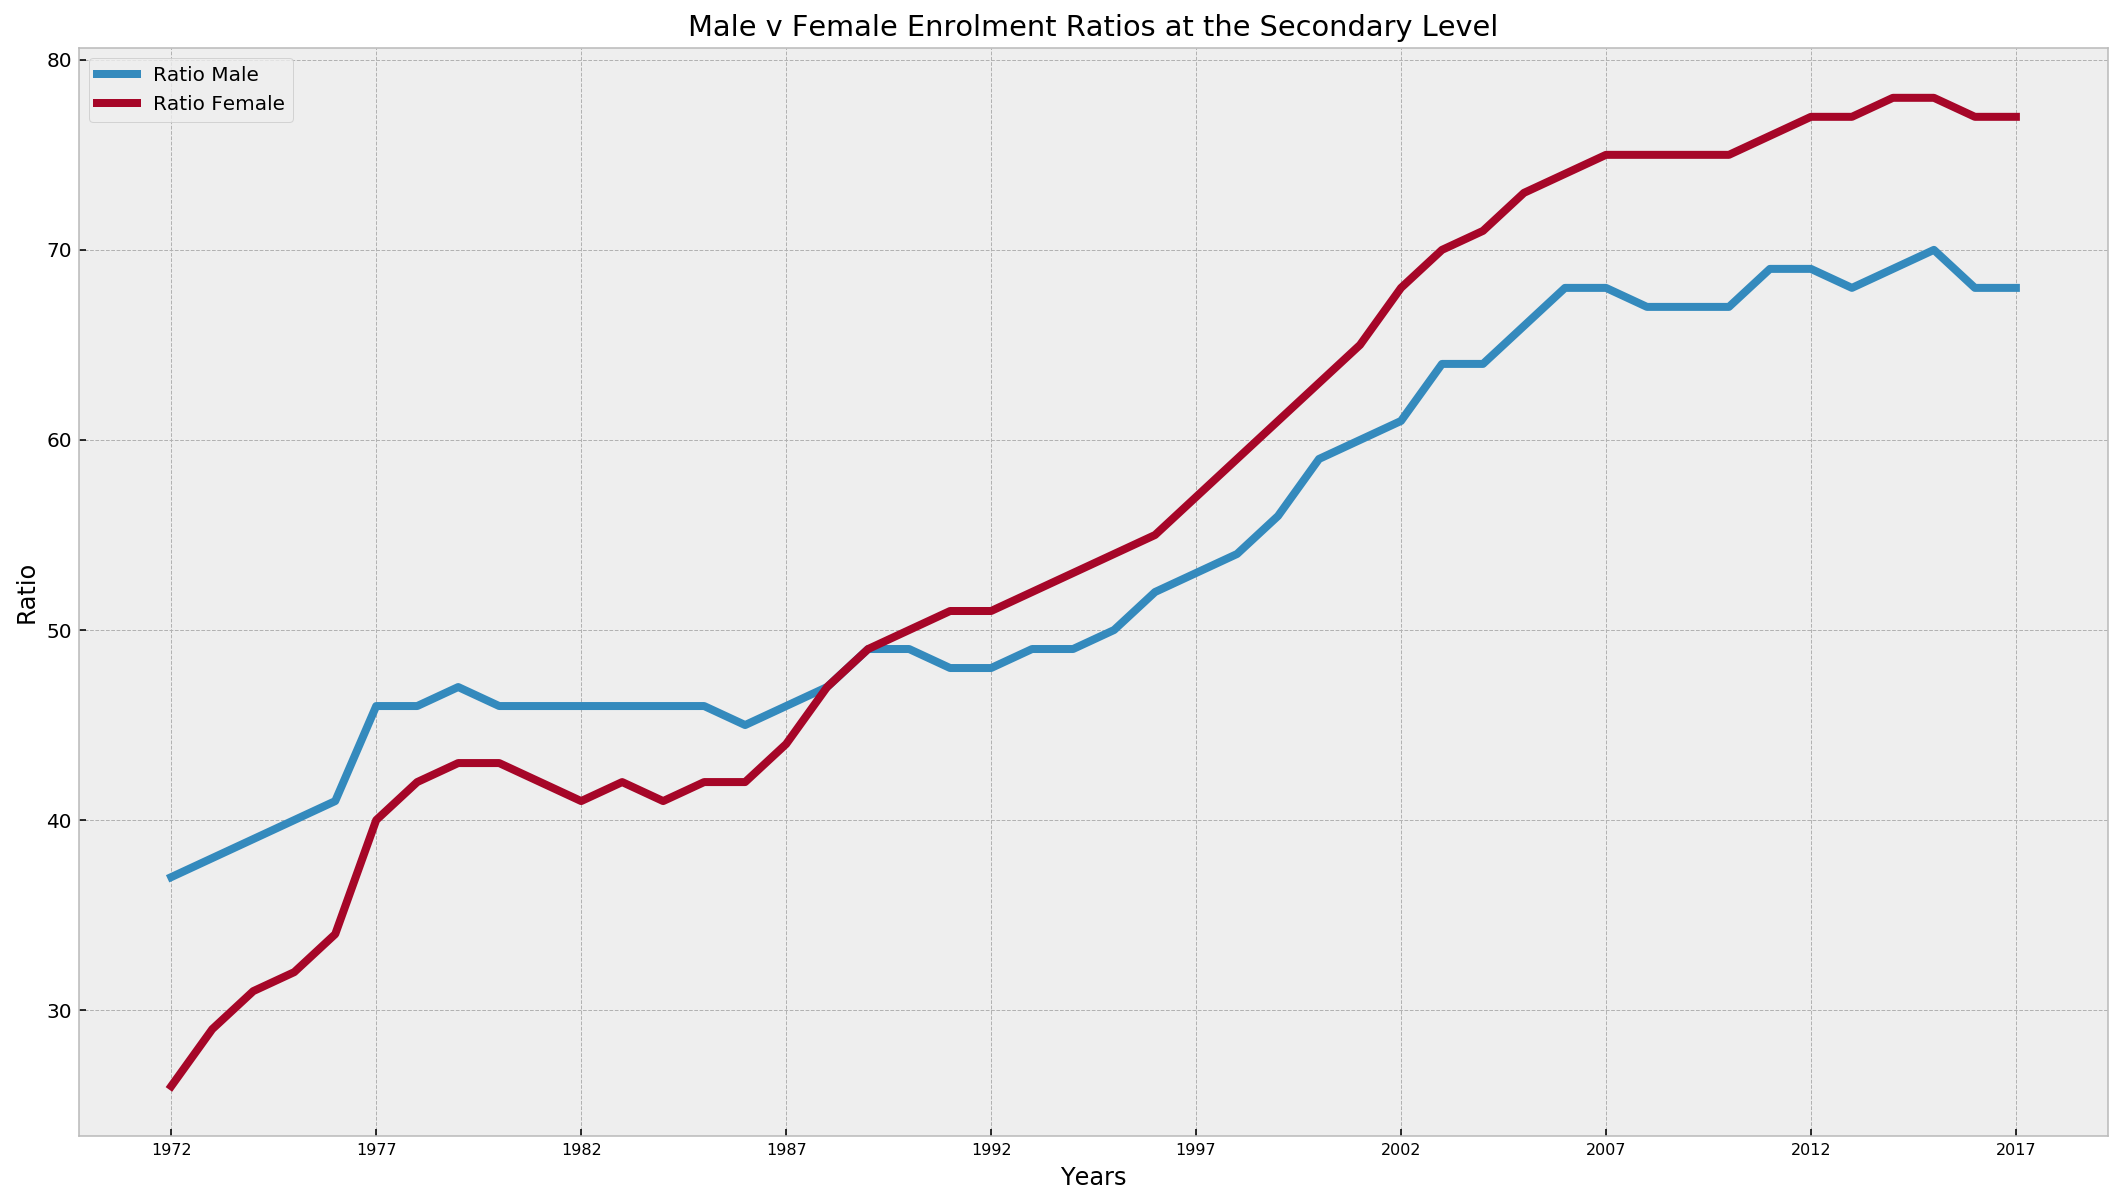

In [45]:
x = df_sec_educ.index
y = df_sec_educ['Ratio_Male']
z = df_sec_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z, linewidth = 4)
plt.legend(['Ratio Male','Ratio Female'])
plt.xlabel('Years')
plt.ylabel('Ratio')
plt.title('Male v Female Enrolment Ratios at the Secondary Level')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

### Tertiary Education 

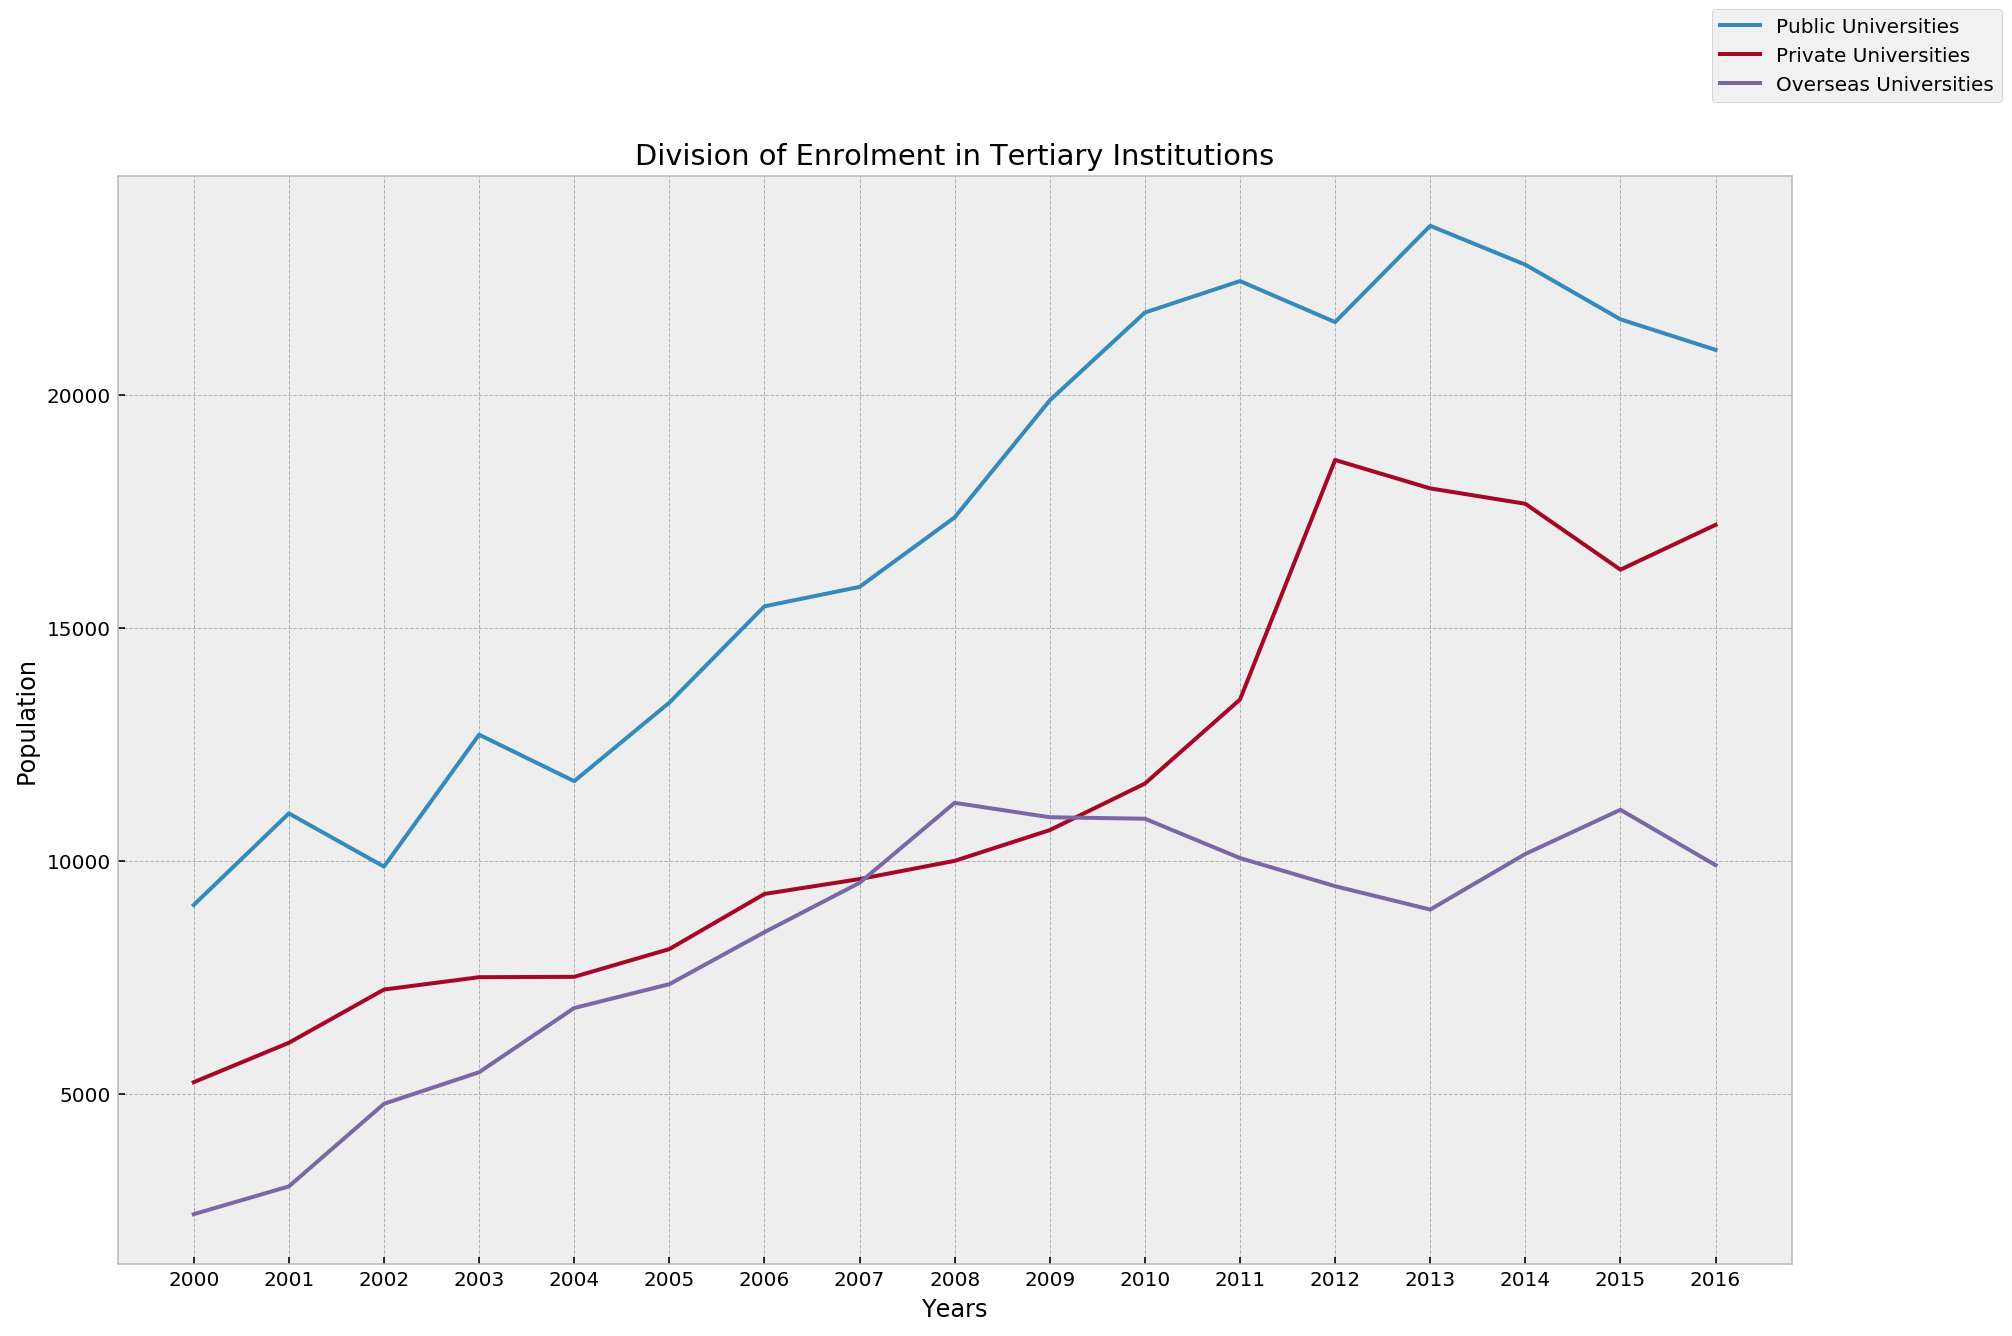

<Figure size 432x288 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(15,10), linewidth = 4)
#df_ter_educ[['Public_Total', 'Private_Total', 'Overseas_Total']].plot(figsize=(25,10), linewidth = 4, legend = False,)
plt.plot(df_ter_educ.index, df_ter_educ['Public_Total'])
plt.plot(df_ter_educ.index, df_ter_educ['Private_Total'])
plt.plot(df_ter_educ.index, df_ter_educ['Overseas_Total'])


plt.figlegend(['Public Universities', 'Private Universities', 'Overseas Universities'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Division of Enrolment in Tertiary Institutions')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

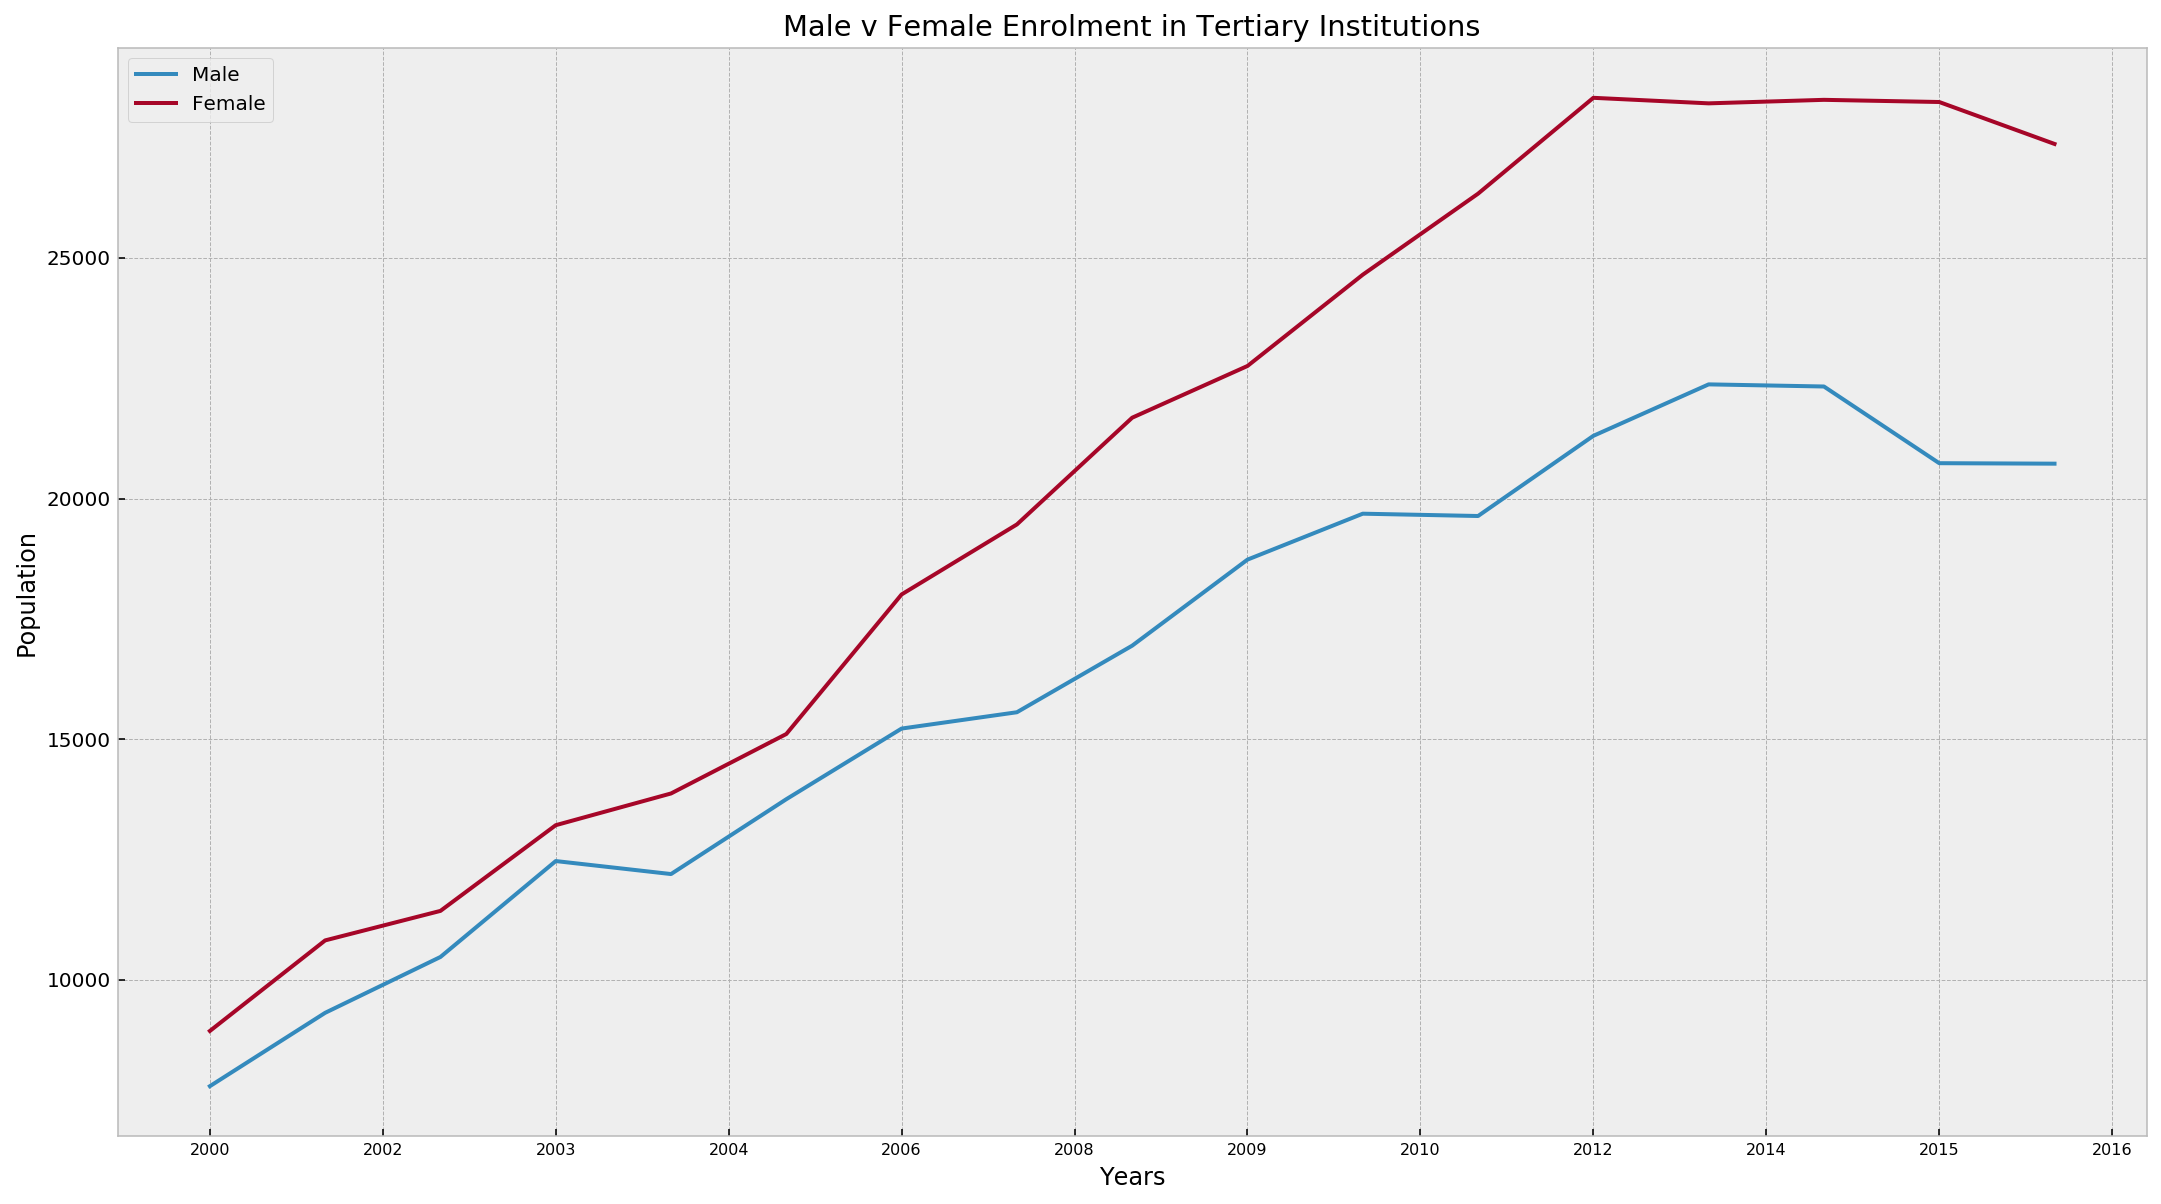

In [47]:
x = df_ter_educ.index
y = df_ter_educ['Overall_Male']
z = df_ter_educ['Overall_Female']



fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)

plt.legend(['Male','Female'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Male v Female Enrolment in Tertiary Institutions')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

## DEMOGRAPHICS
Looking at demographic data was particularly interesting because of the volume of data available, particularly with respect to the population of different age groups. Trends revealed by graphing the data supported information that had been exchanged in conversations concerning the demography of Mauritius: that population growth was slowing down. While the population increased rapidly in the 90s and early 2000s, growth slowed significantly between 2005 and 2010. The population has remained at about 12 million for nearly the last decade.

The Age Distribution per Decade graph reveals a clear effect of slowing population growth, an aging population. While the population of Mauritians younger than 30 was often lower in 2015 than it was in 1985, the population older than 30 was always significantly higher in 2015. 

While the population has grown older, the life expectancy has also increased. Increase in years expected to live at birth has increased at a lower rate for men than women.

The data used to create these graphs was taken from the website of the Central Statistics Office. 

In [48]:
# read cleaned dataframes from Mauritius Demographic Stats.ipynb
df_demogn_both = pd.read_pickle('df_demogn_both.pkl')
df_demogn_all = pd.read_pickle('df_demogn_all.pkl')
df_demographics = pd.read_pickle('Demographics.pkl')

df_lifex = pd.read_pickle('df_lifex.pkl')
df_lifex_per = pd.read_pickle('df_lifex_per.pkl')

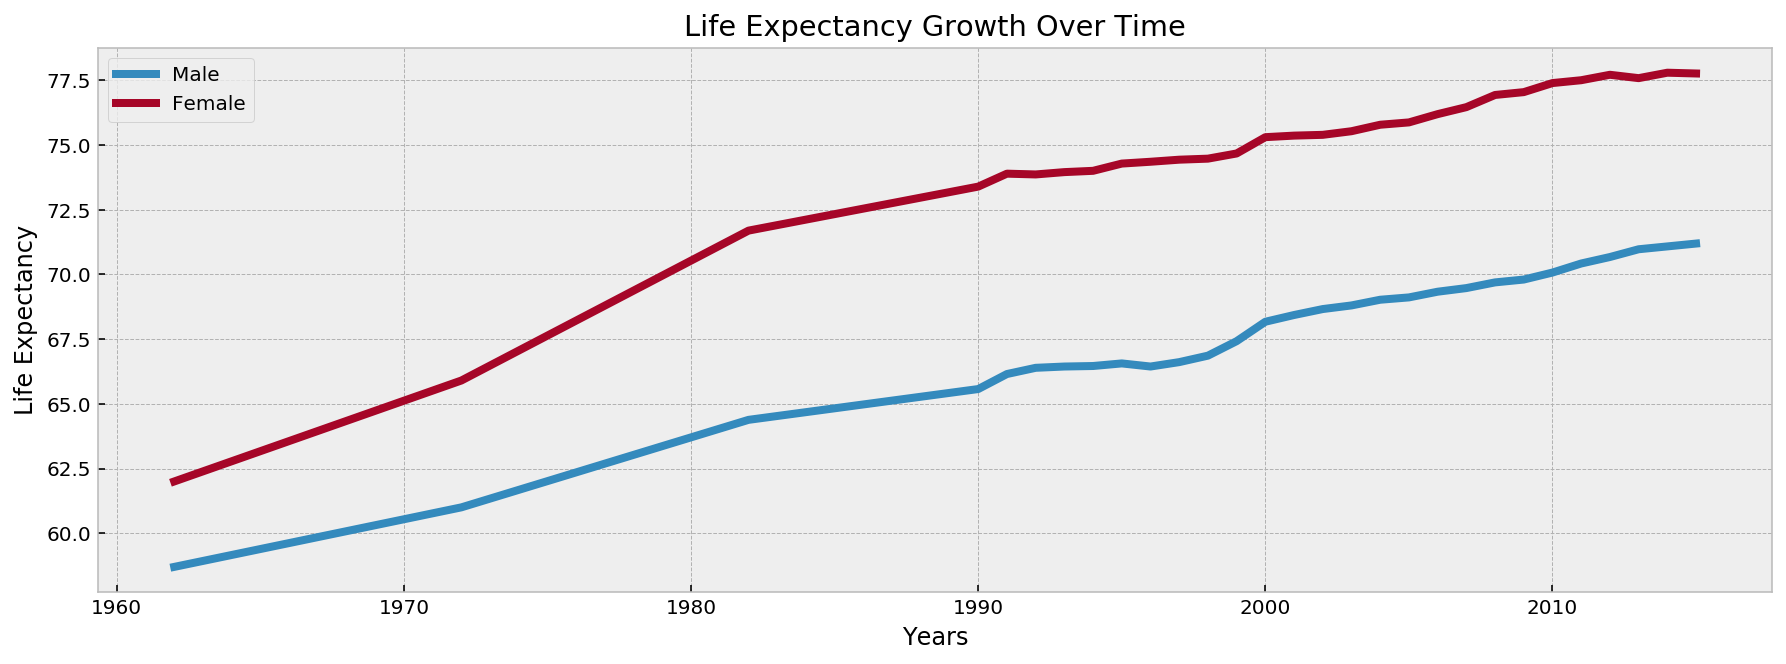

In [49]:
df_lifex.plot(linewidth=4, figsize=(15, 5))
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Growth Over Time')

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

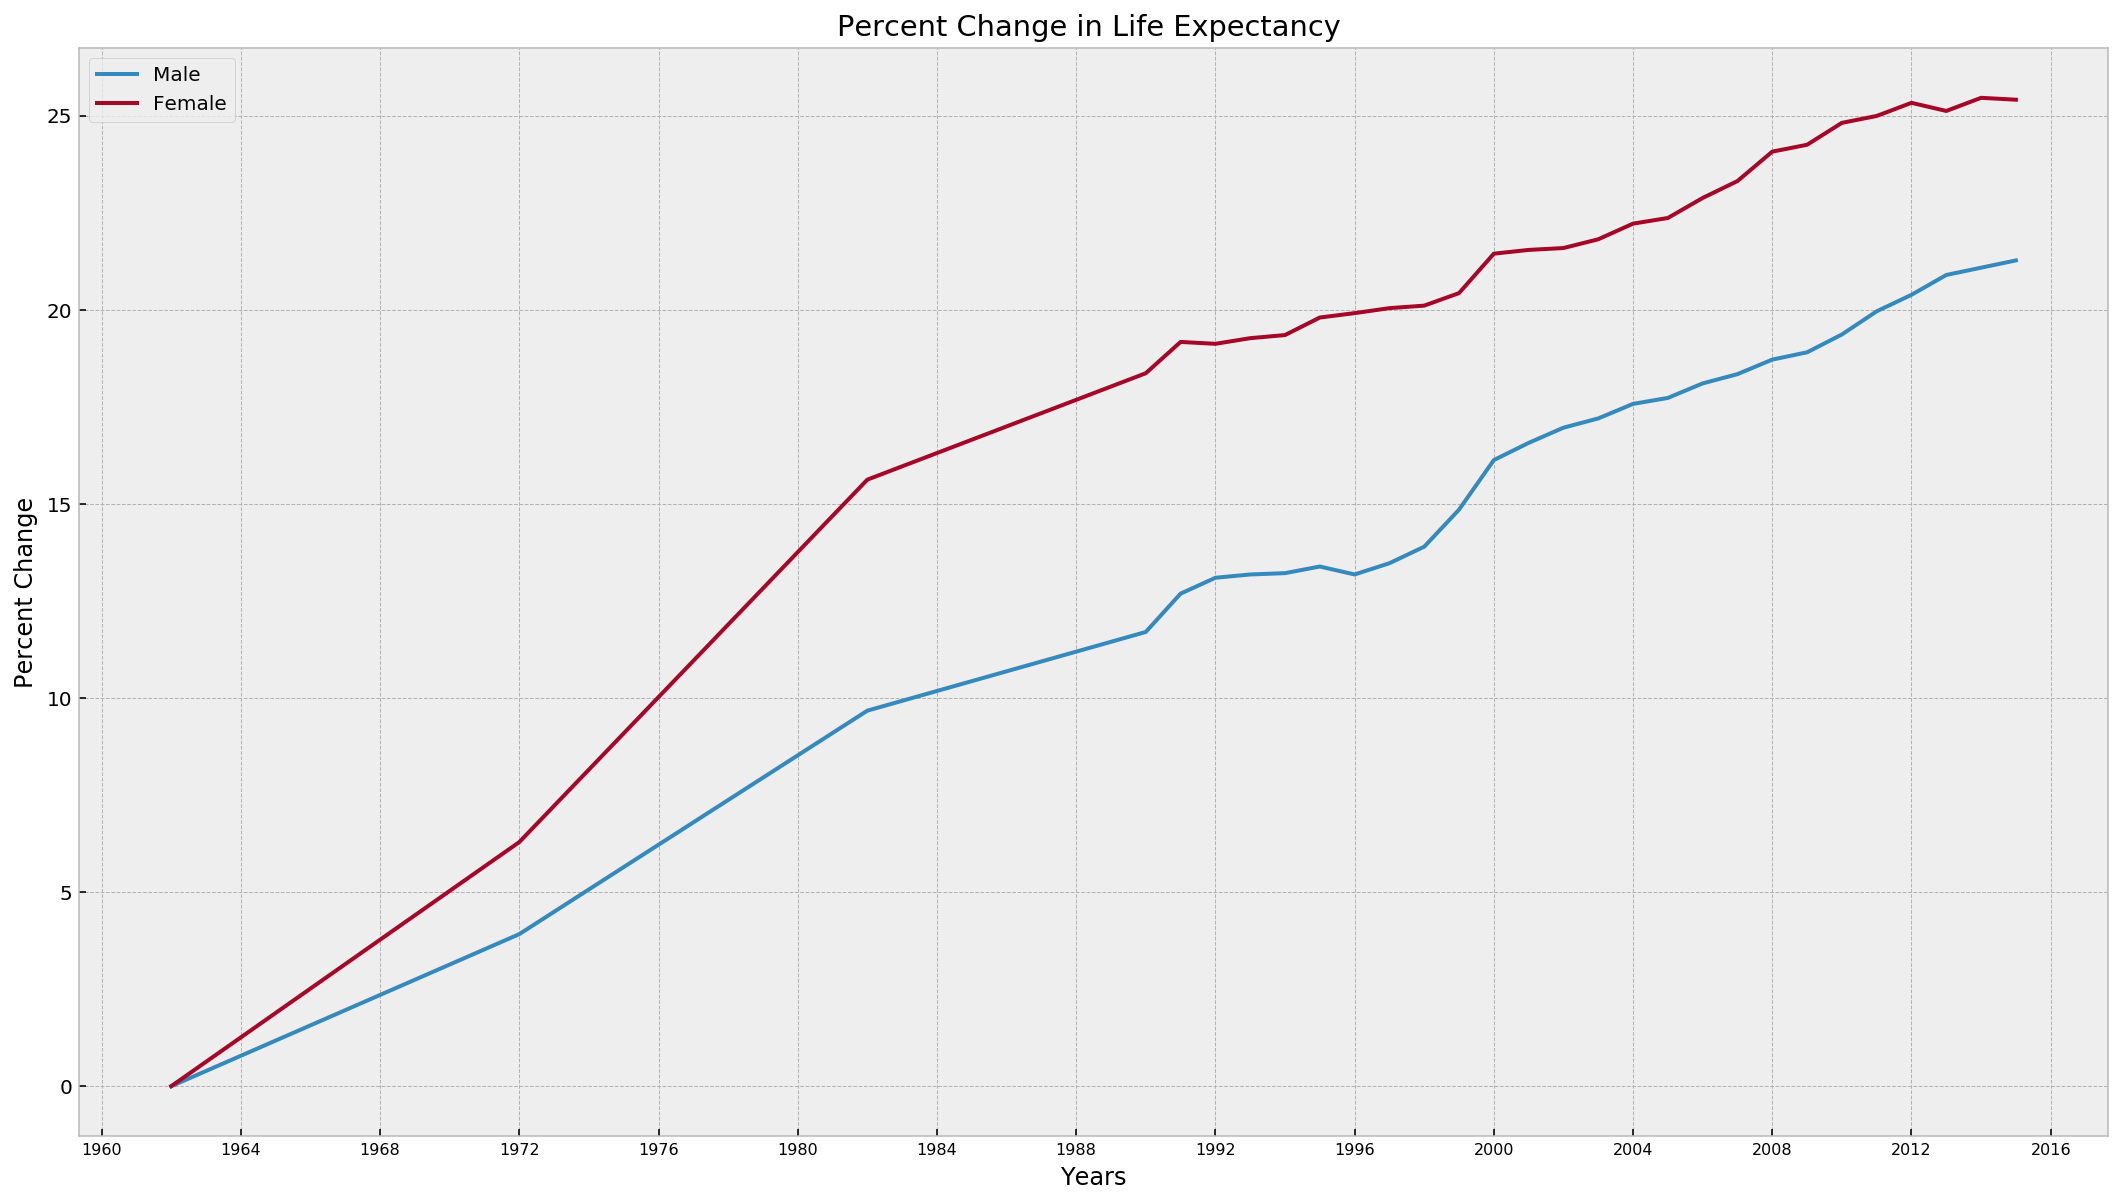

In [50]:
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(df_lifex_per.index, df_lifex_per)


plt.legend(['Male','Female'])
plt.xlabel('Years')
plt.ylabel('Percent Change')
plt.title('Percent Change in Life Expectancy ')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

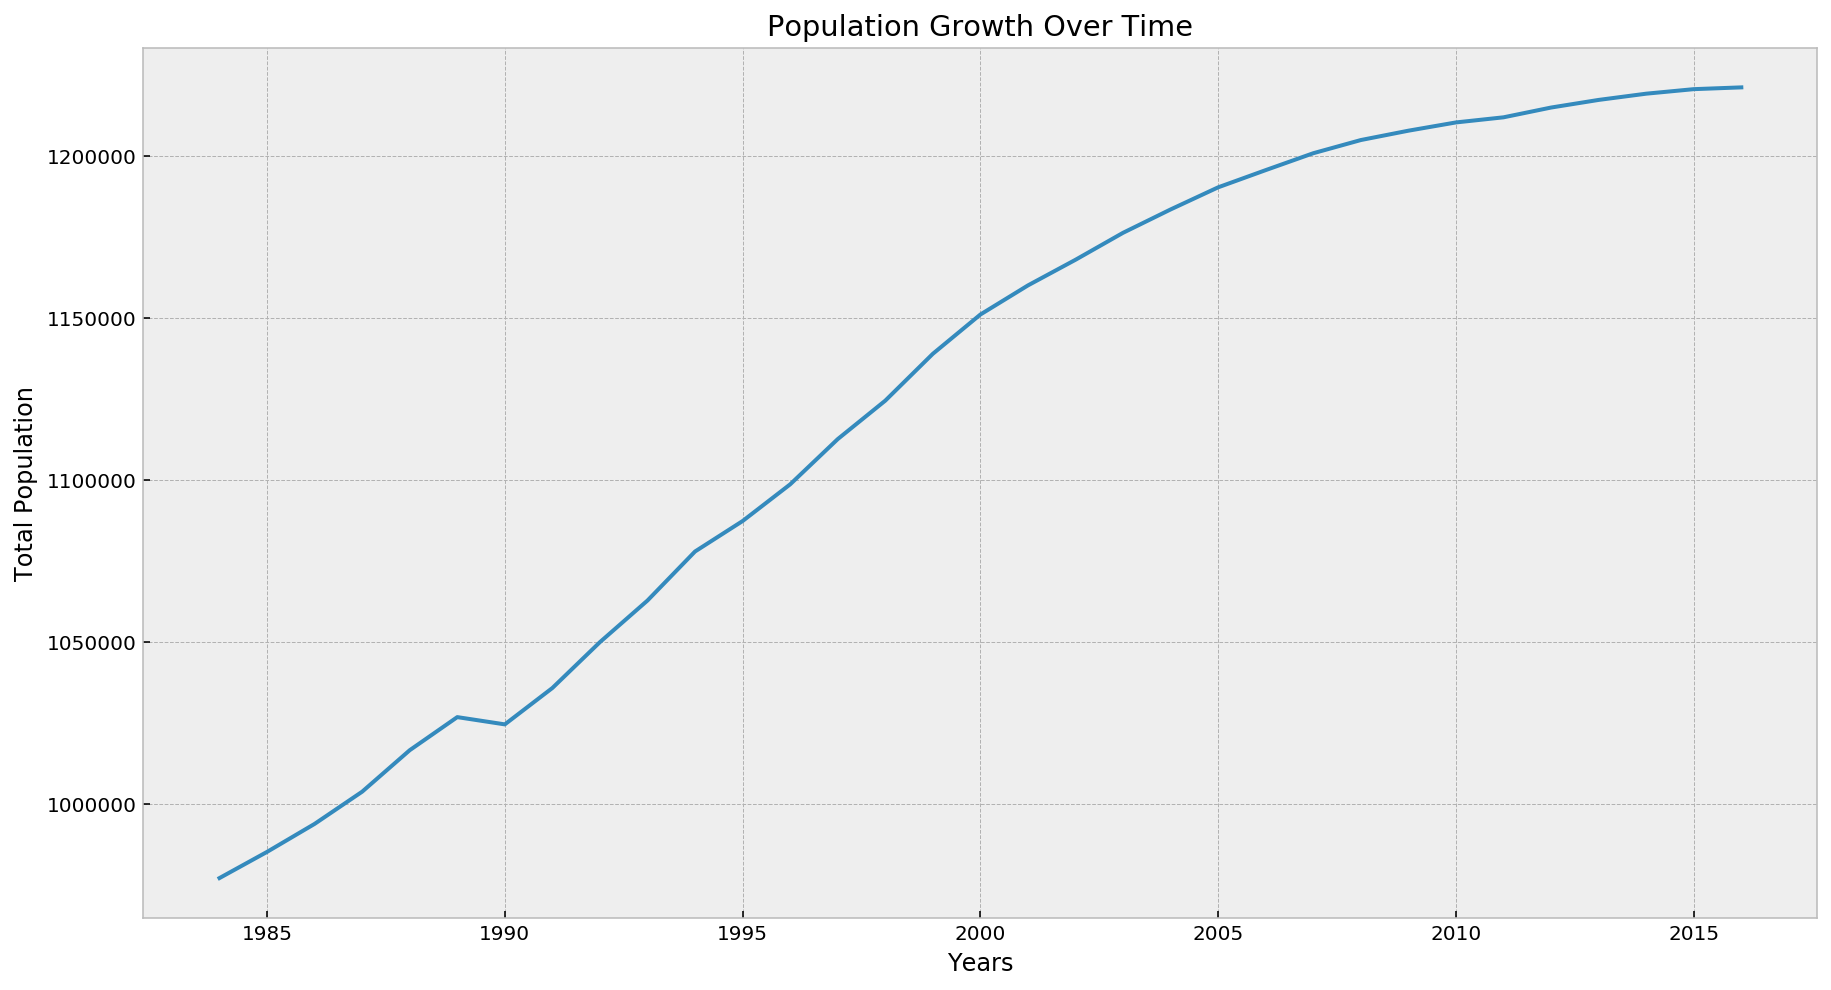

In [51]:
fig = plt.figure(figsize=(15,8))

x = list(range(1984,2017))
y = df_demogn_both['All ages']

plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.title('Population Growth Over Time')

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

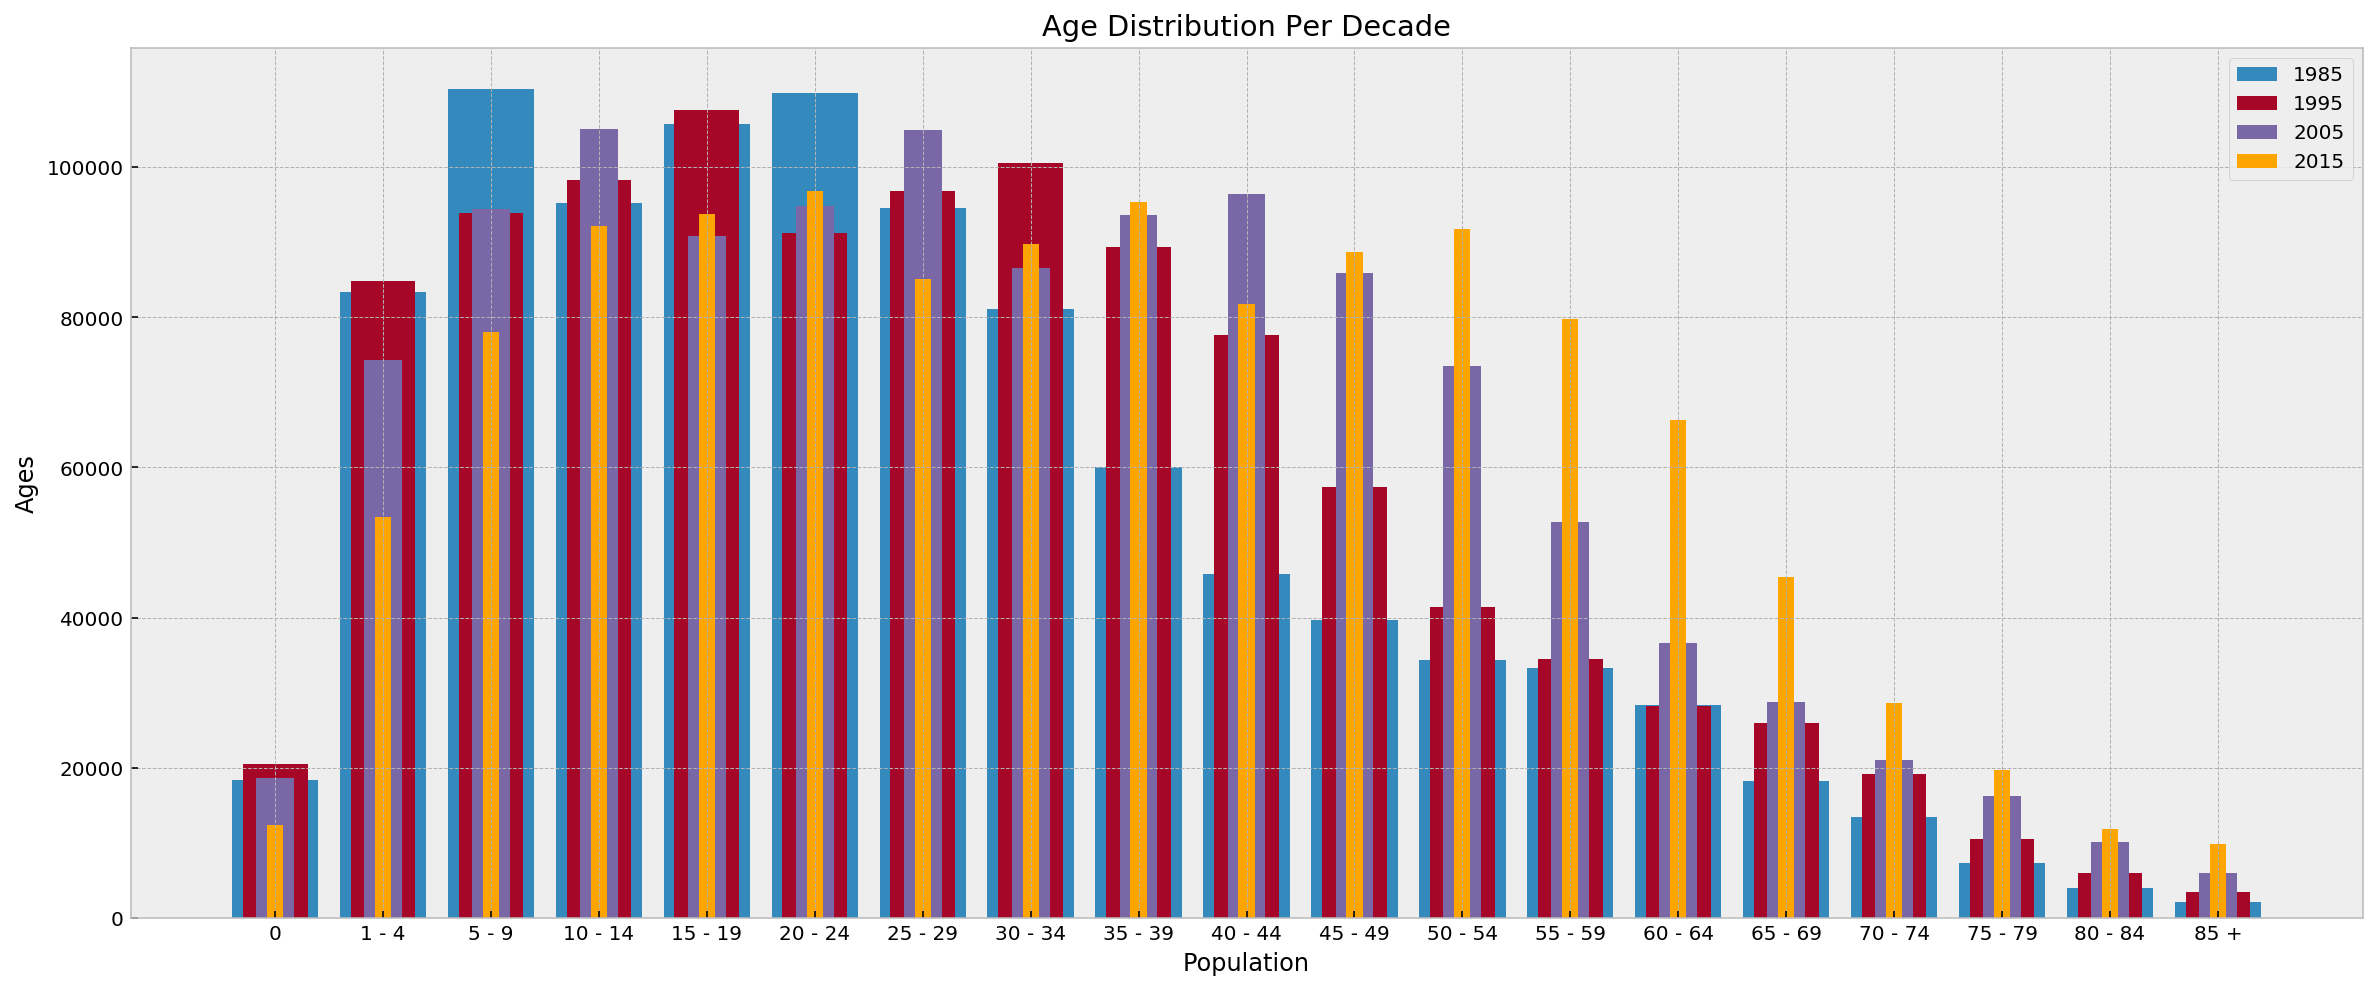

In [52]:
fig = plt.figure(figsize=(20,8))



plt.bar(df_demogn_all.columns, df_demogn_all.loc[1985, 'Both Sexes'], label = 1985, width = 0.8)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[1995, 'Both Sexes'], label = 1995, width = 0.60)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[2005, 'Both Sexes'], label = 2005, width = 0.35)
plt.bar(df_demogn_all.columns, df_demogn_all.loc[2015, 'Both Sexes'], label = 2015, width = 0.15, color = 'orange')


plt.ylabel('Ages')
plt.xlabel('Population')
plt.title('Age Distribution Per Decade')
plt.legend()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

# CROSS-CATEGORY STATISTICAL ANALYSES

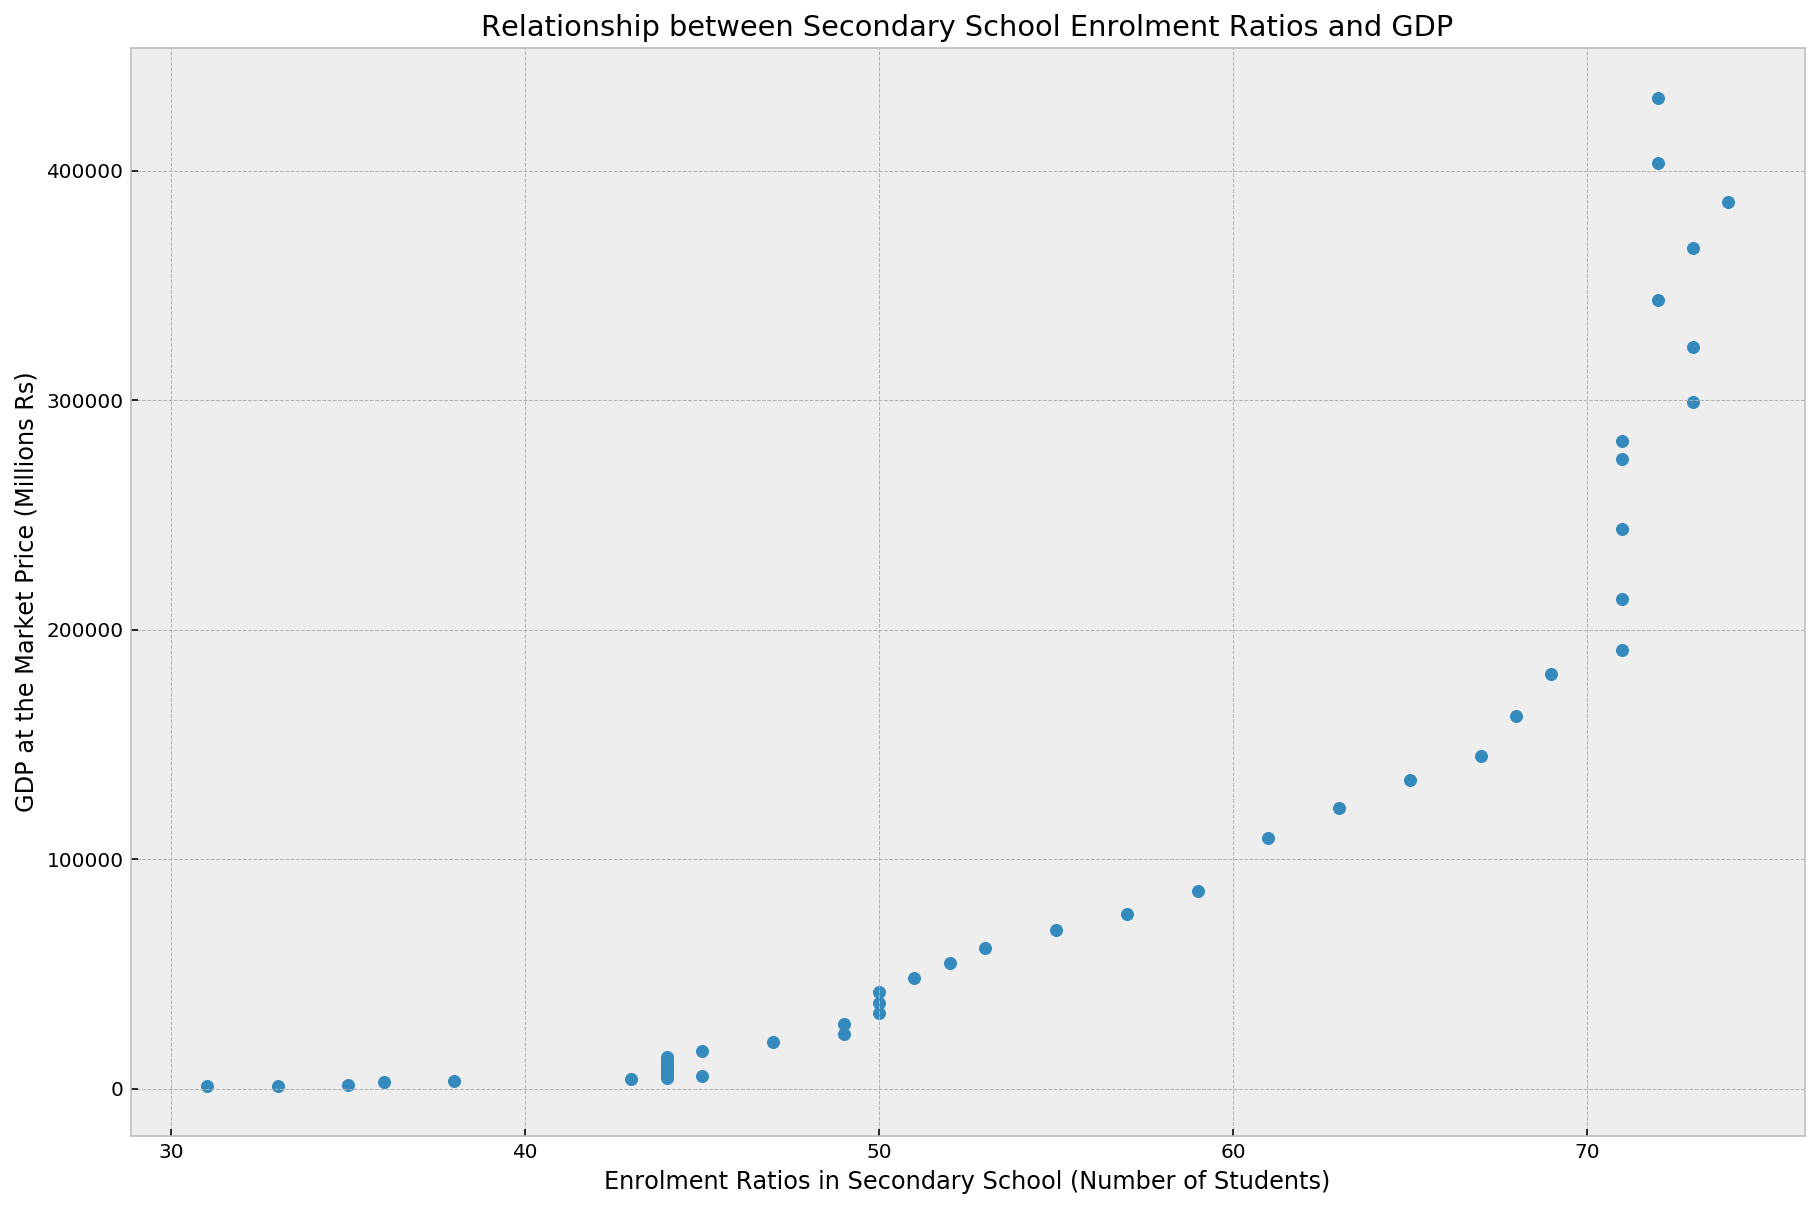

<Figure size 432x288 with 0 Axes>

In [66]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_sec_educ.Ratio_Total, df_GDP.gdp_market_price.iloc[18:67])
plt.xlabel('Enrolment Ratios in Secondary School (Number of Students)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Secondary School Enrolment Ratios and GDP')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

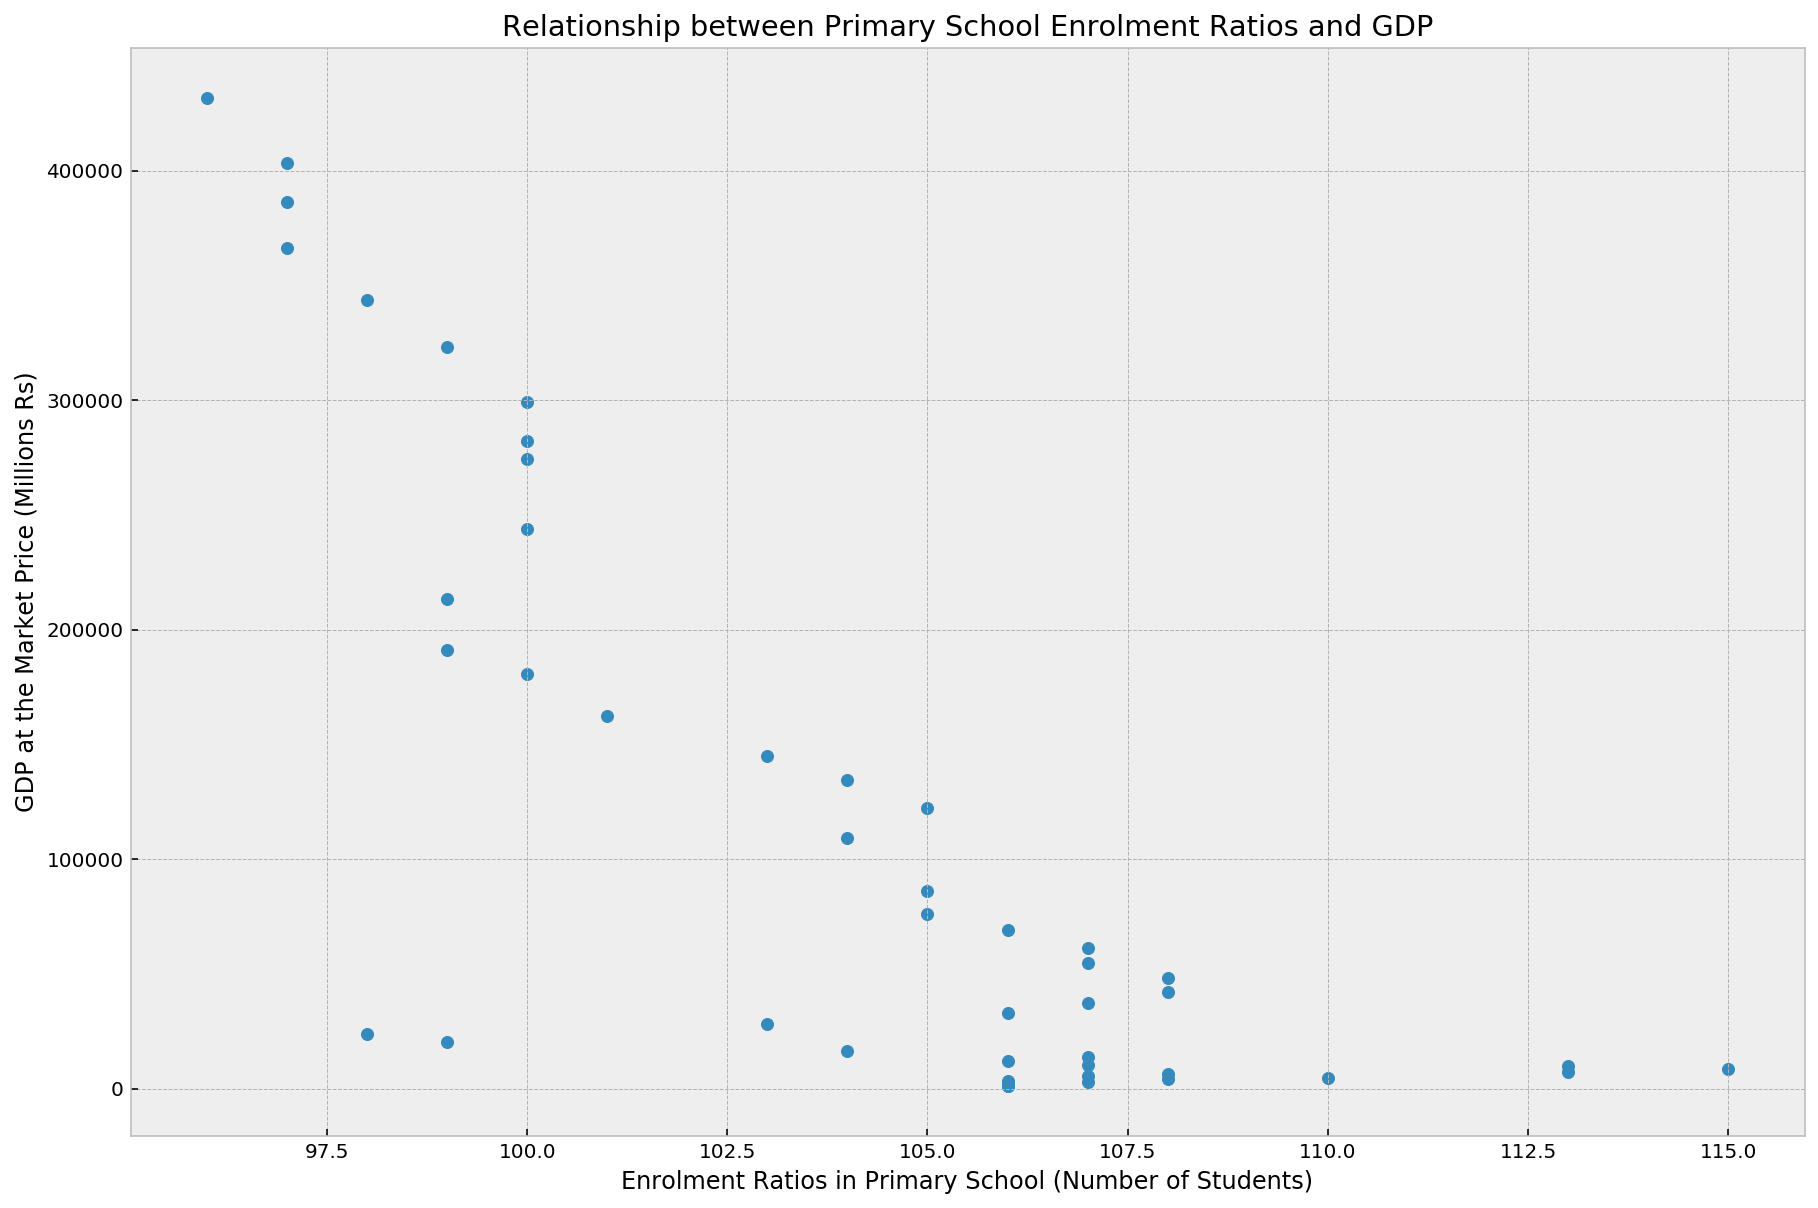

<Figure size 432x288 with 0 Axes>

In [67]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_prim_educ.Ratio_Total, df_GDP.gdp_market_price.iloc[18:67])
plt.xlabel('Enrolment Ratios in Primary School (Number of Students)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Primary School Enrolment Ratios and GDP')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

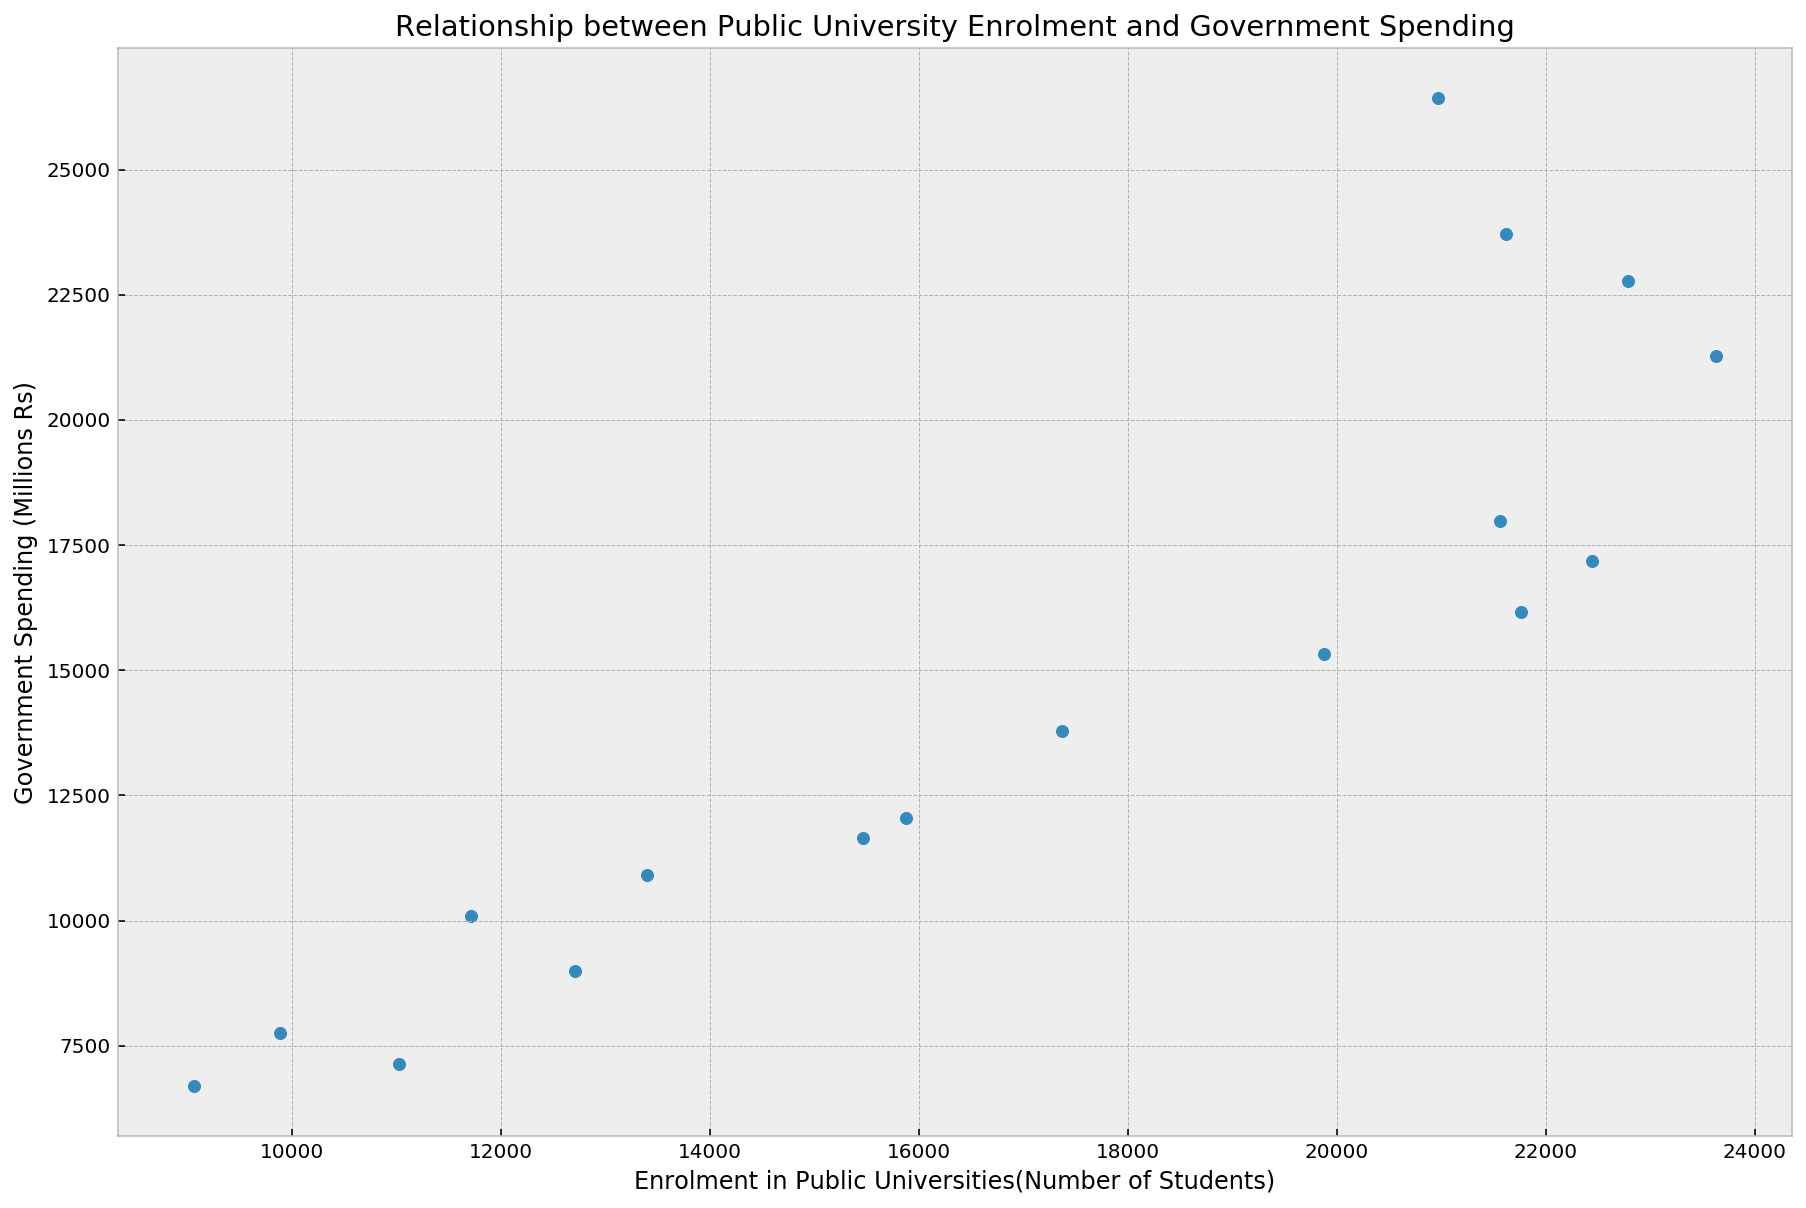

<Figure size 432x288 with 0 Axes>

In [68]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_ter_educ.Public_Total, df_GDP.government.iloc[47:67])
plt.xlabel('Enrolment in Public Universities(Number of Students)')
plt.ylabel('Government Spending (Millions Rs)')
plt.title('Relationship between Public University Enrolment and Government Spending')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

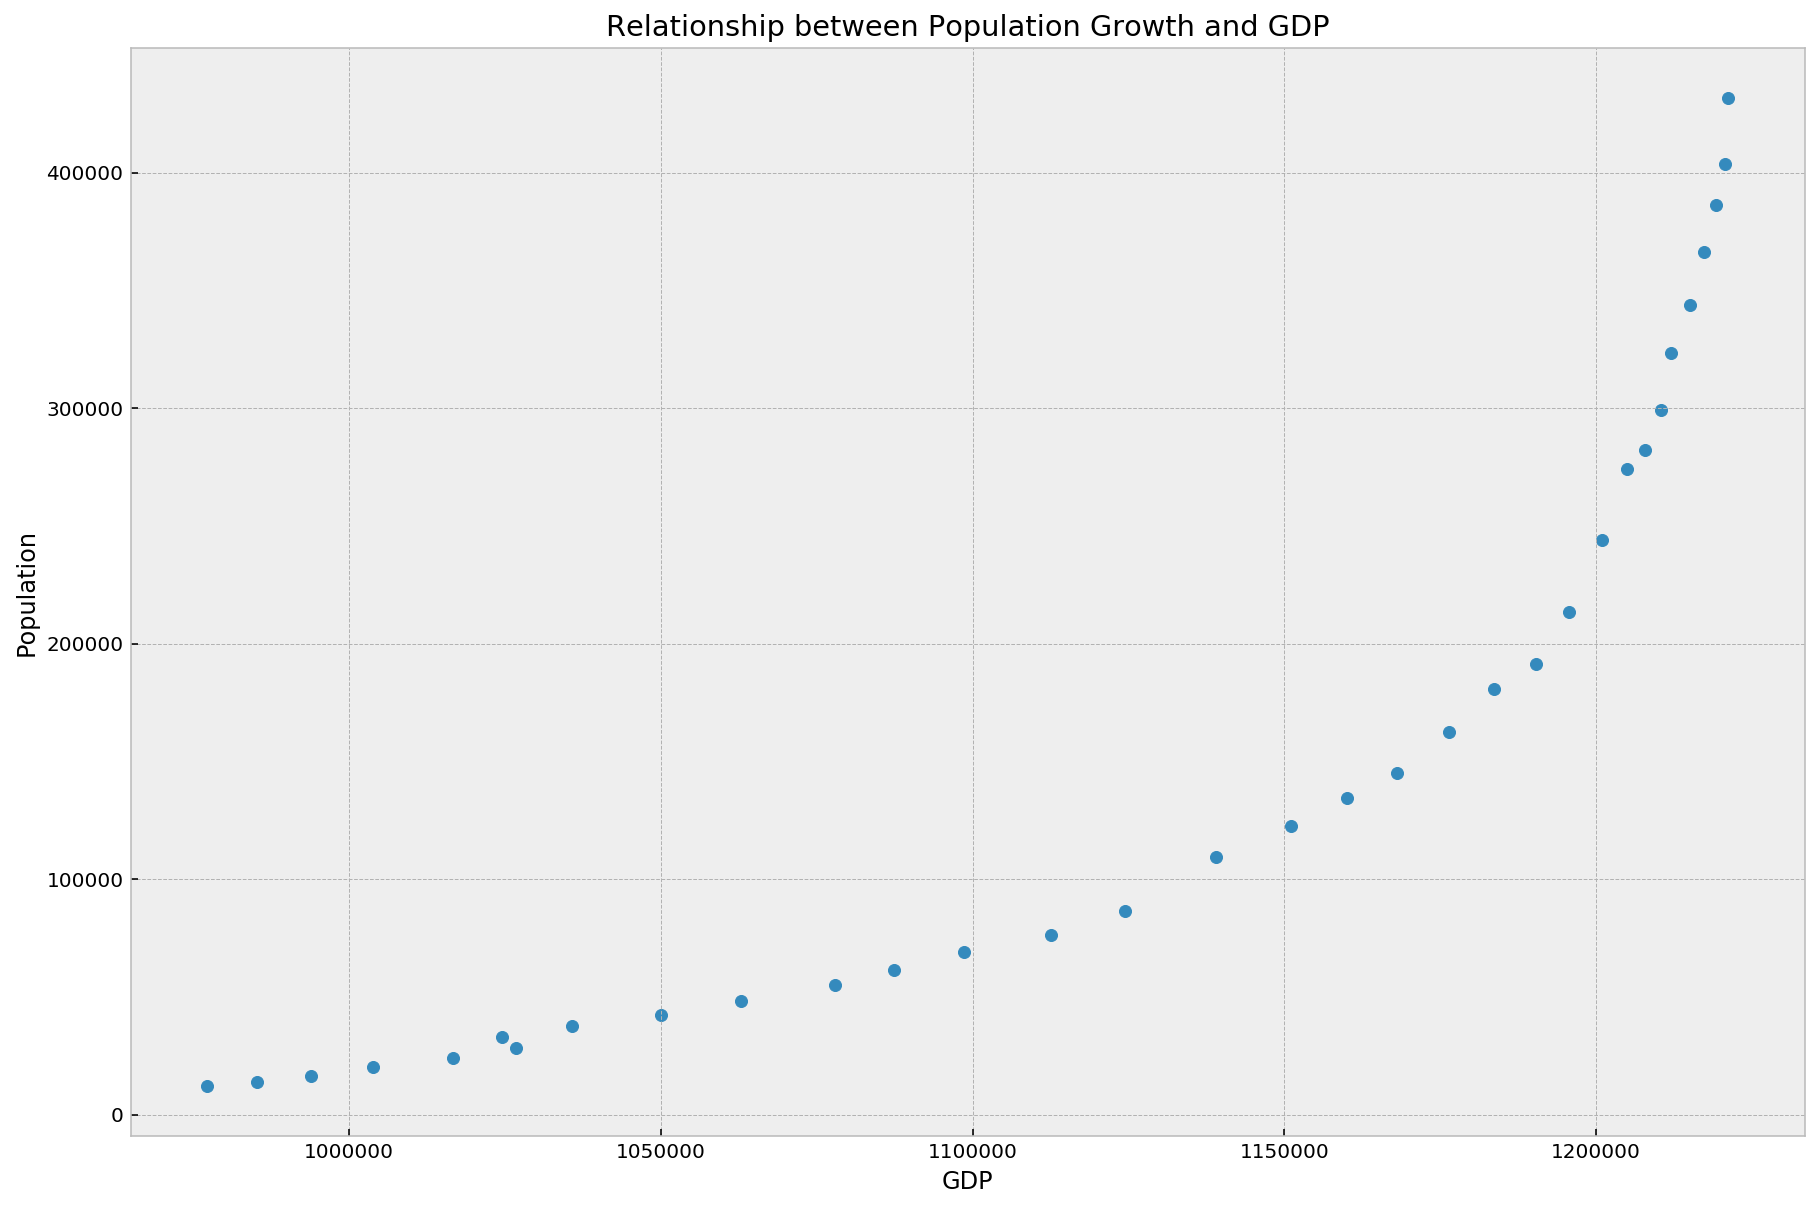

In [56]:
idx = pd.IndexSlice
fig = plt.figure(figsize=(15,10))

plt.scatter(df_demographics.loc[idx['1984':'2016','Both Sexes'],'All ages'], df_GDP.gdp_market_price.iloc[31:67])
plt.xlabel('GDP')
plt.ylabel('Population')
plt.title('Relationship between Population Growth and GDP')

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

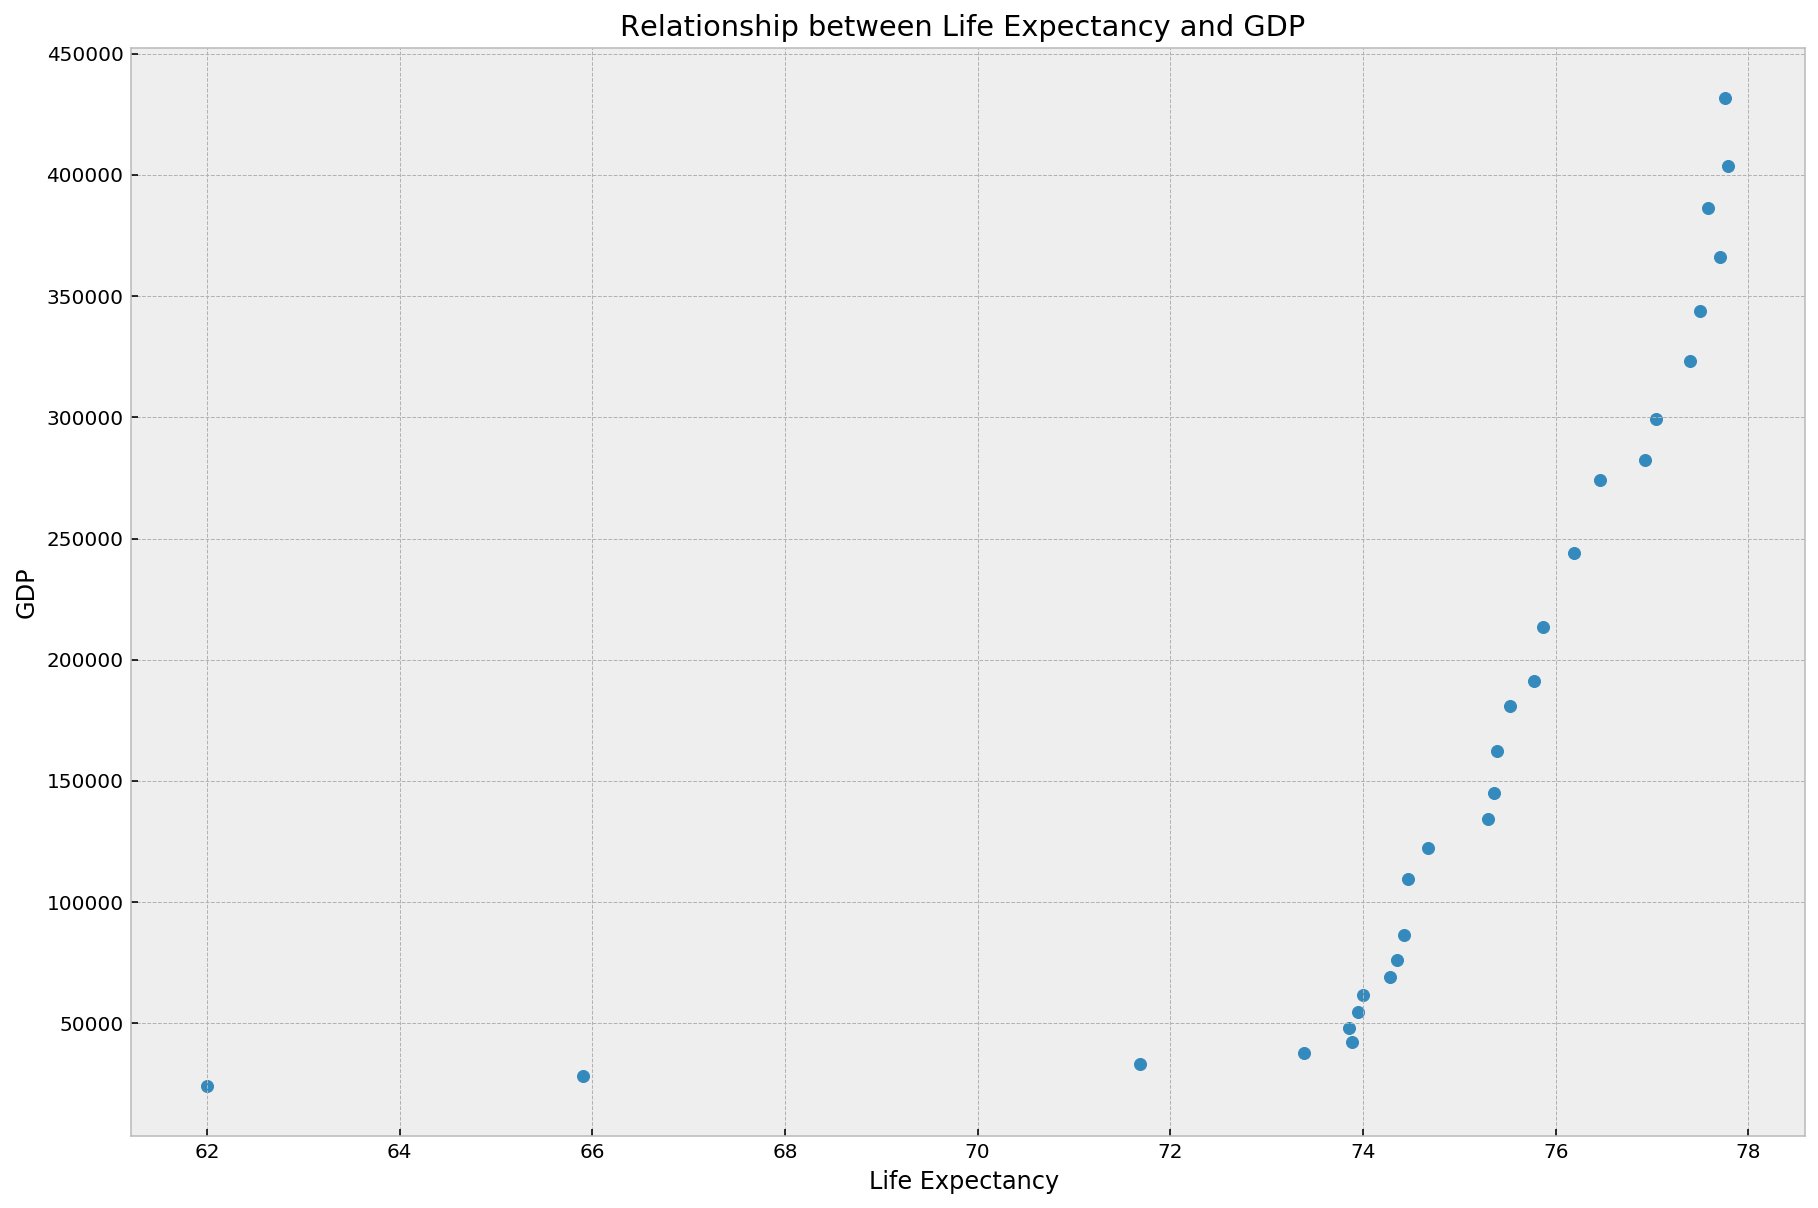

<Figure size 432x288 with 0 Axes>

In [69]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_lifex['Female'], df_GDP.gdp_market_price.iloc[35:67])
plt.ylabel('GDP')
plt.xlabel('Life Expectancy ')
plt.title('Relationship between Life Expectancy and GDP ')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

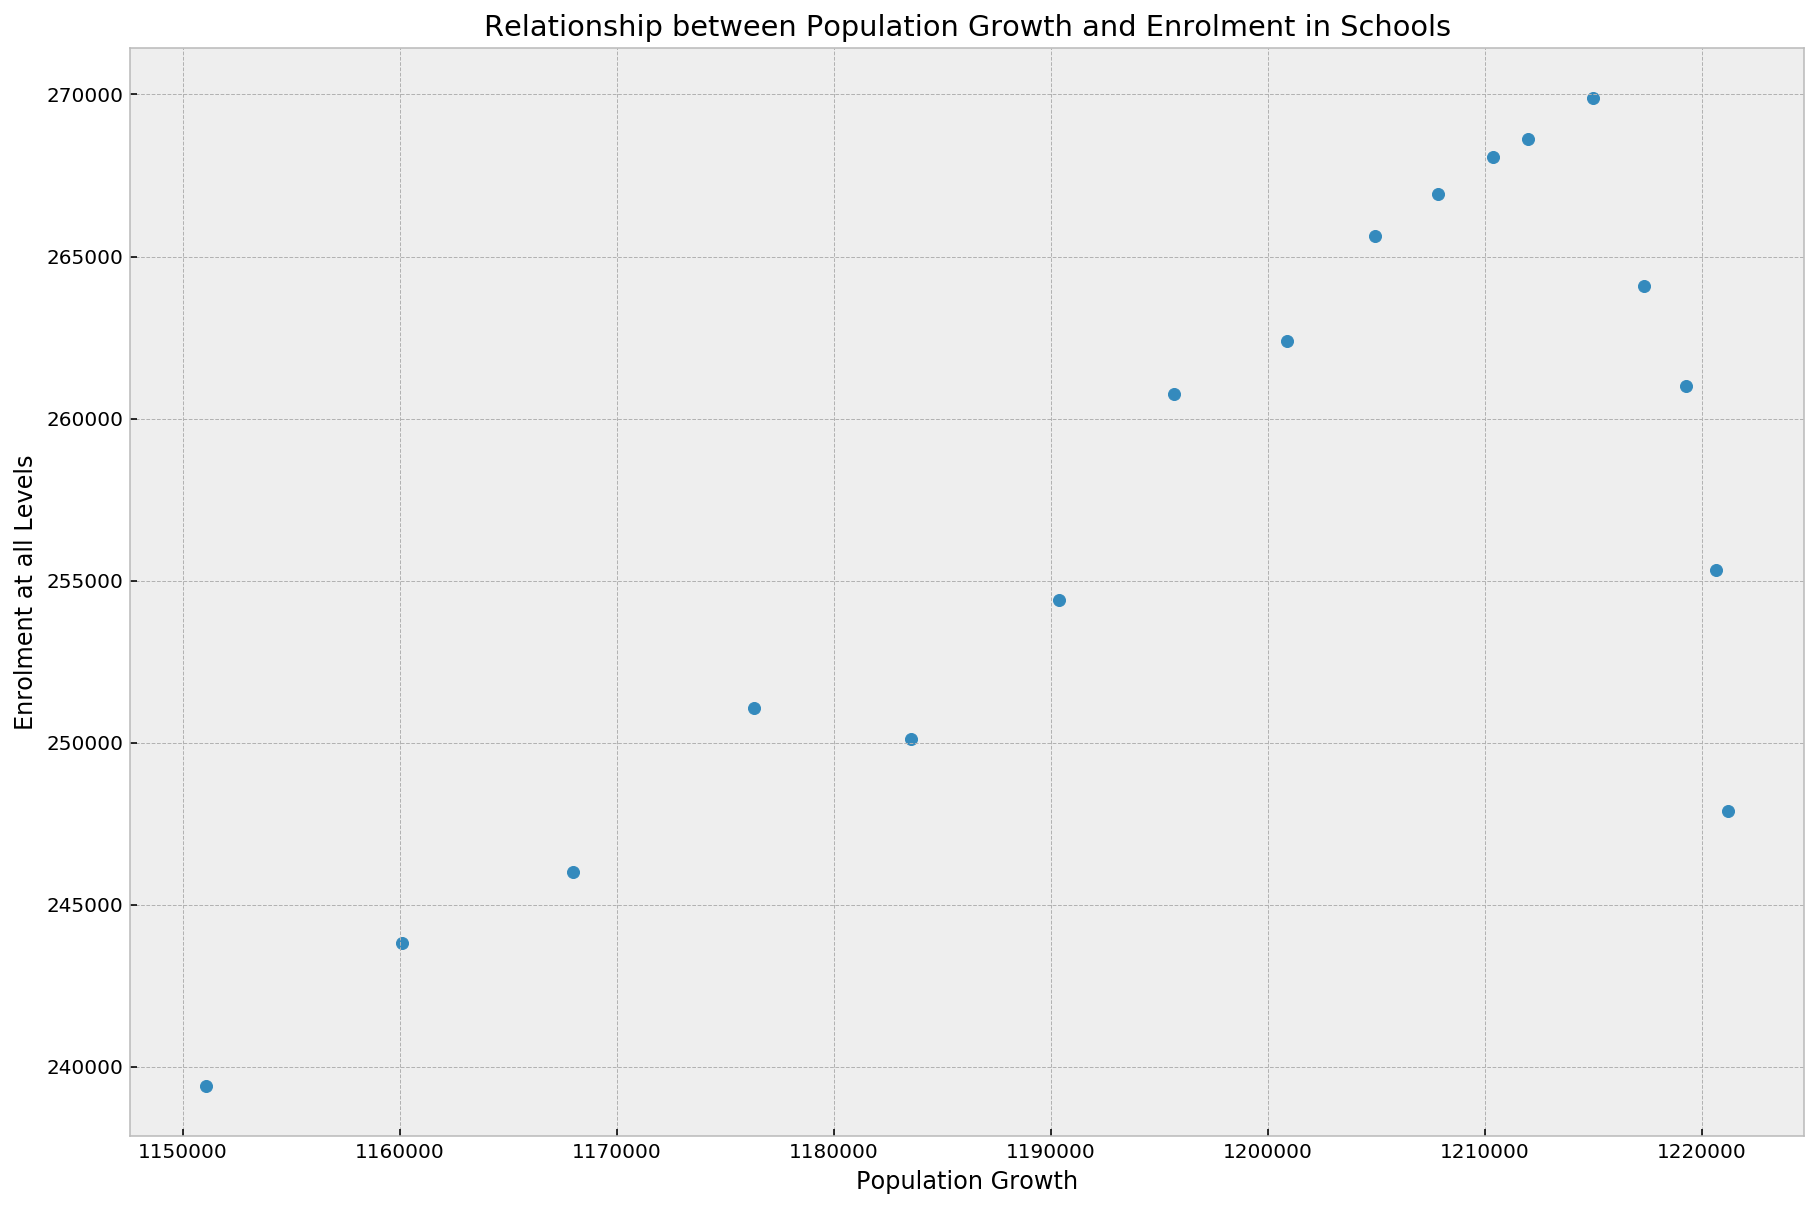

<Figure size 432x288 with 0 Axes>

In [70]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_demographics.loc[idx['2000':'2016','Both Sexes'],'All ages'], df_ter_educ.Overall_Total + df_prim_educ.Enrolment_Total.iloc[28:45]+ df_sec_educ.Enrolment_Total.iloc[28:45])
plt.xlabel('Population Growth')
plt.ylabel('Enrolment at all Levels')
plt.title('Relationship between Population Growth and Enrolment in Schools')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

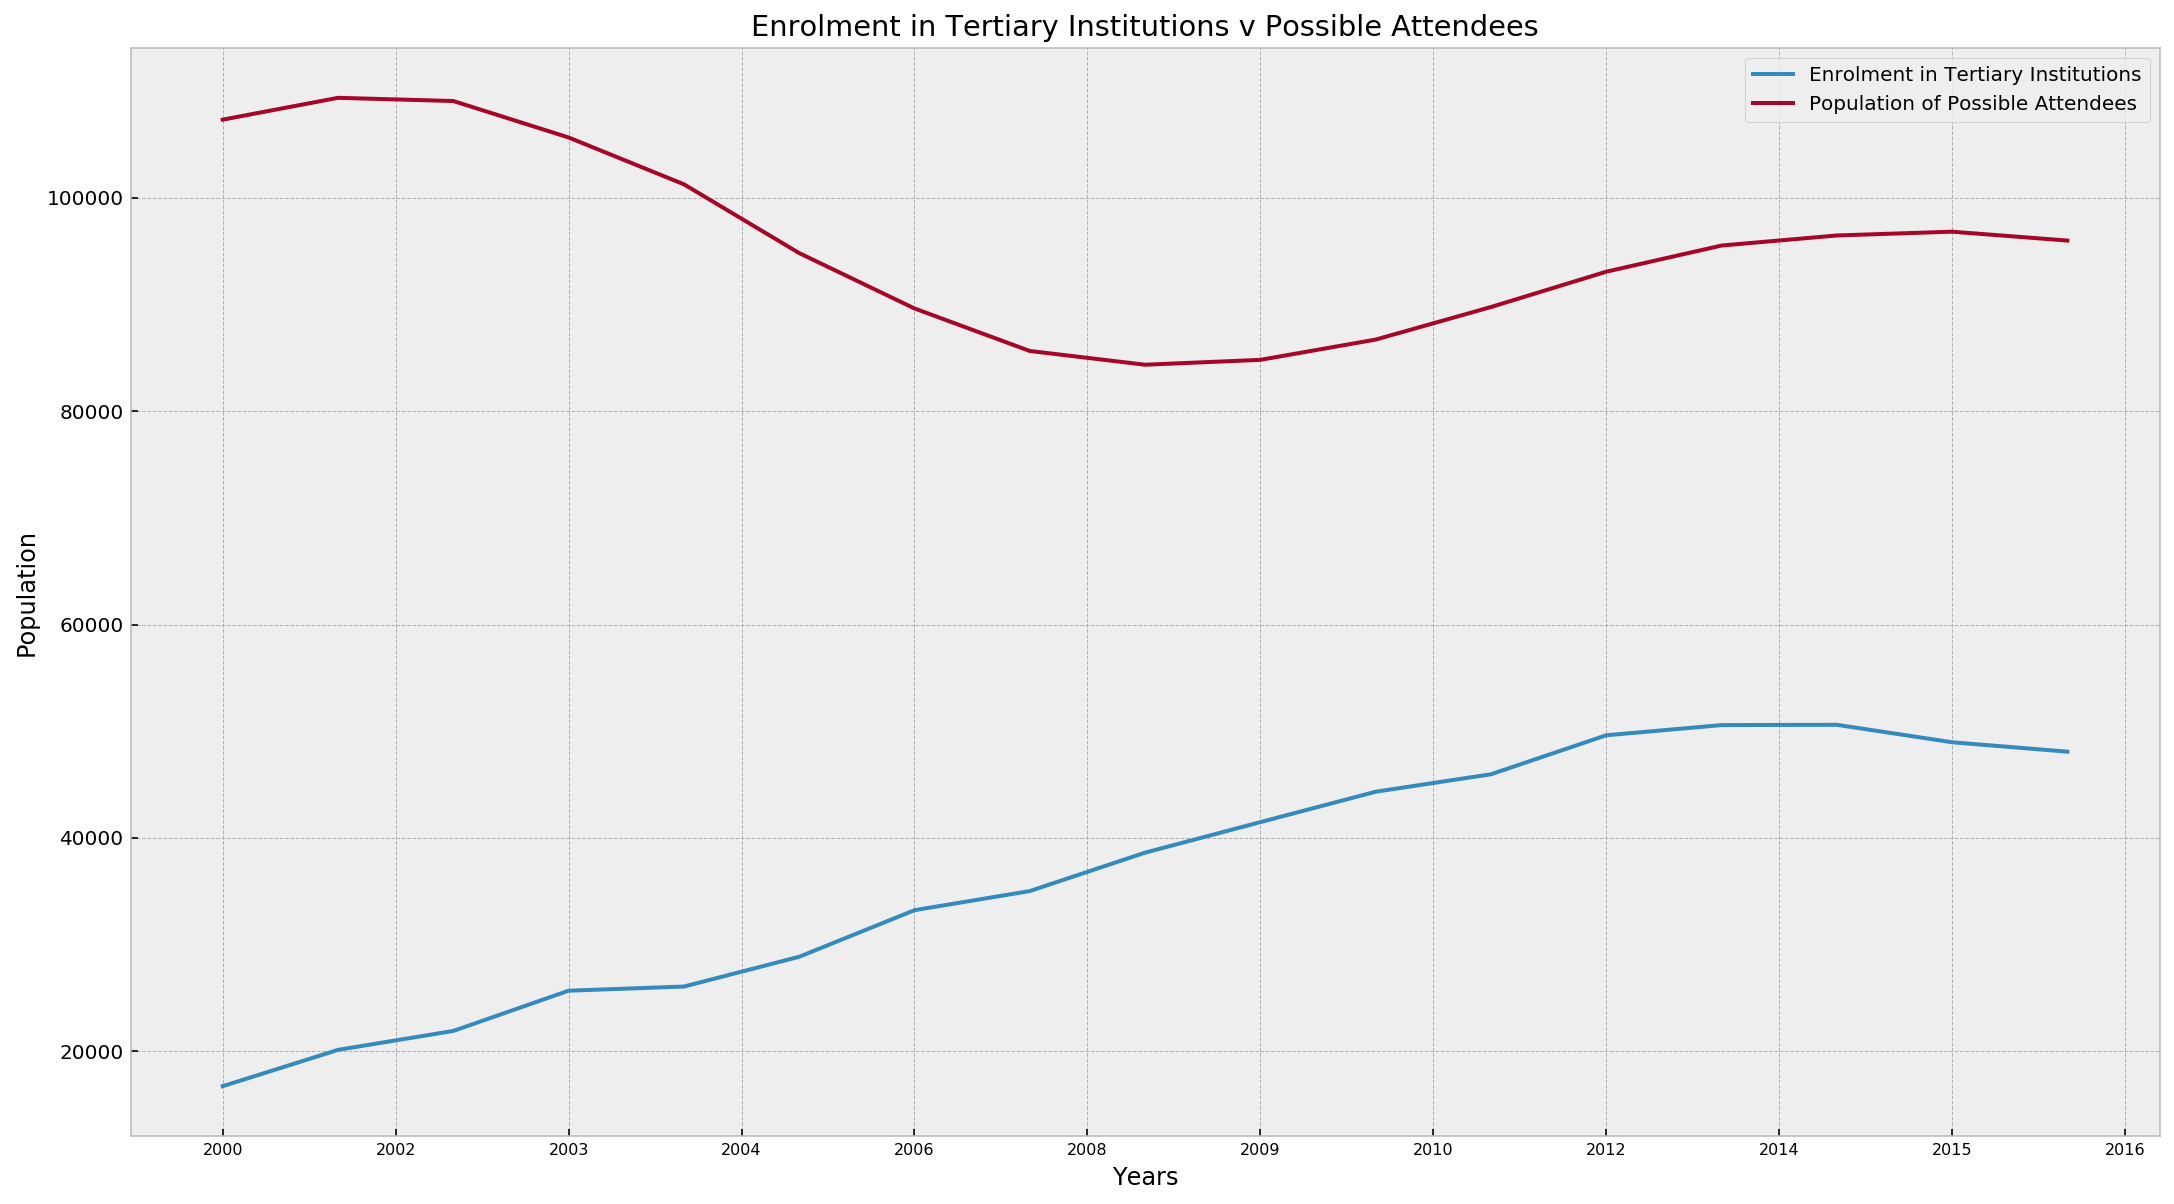

In [59]:
college_kids = df_demographics.loc[idx['1984':'2016','Both Sexes'],'20 - 24']

x = df_ter_educ.index
y = df_ter_educ['Overall_Male'] + df_ter_educ['Overall_Female']
z = college_kids[-17:]



fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y)
plt.plot(x,z)

plt.legend(['Enrolment in Tertiary Institutions','Population of Possible Attendees'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Enrolment in Tertiary Institutions v Possible Attendees')
plt.show

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

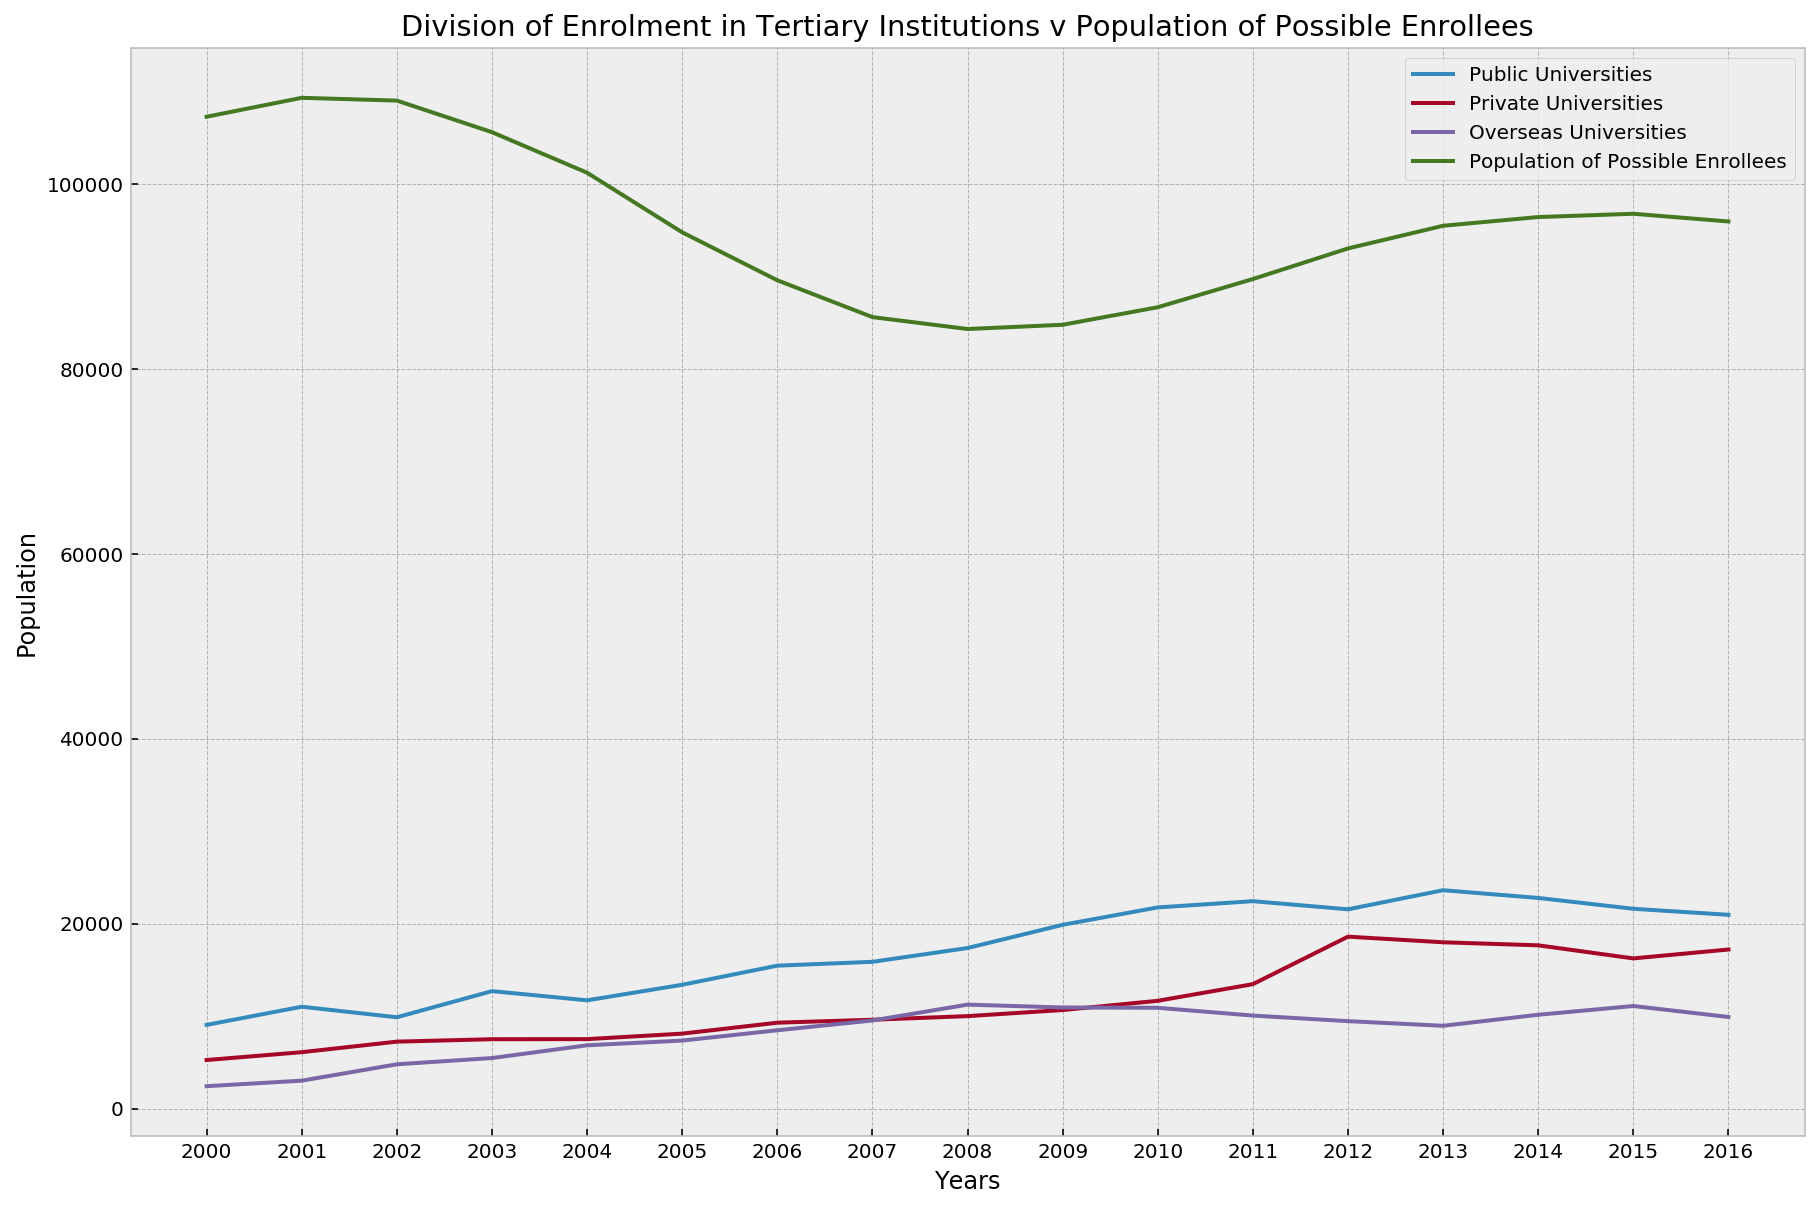

<Figure size 432x288 with 0 Axes>

In [60]:
fig = plt.figure(figsize=(15,10), linewidth = 4)
x = df_ter_educ.index

plt.plot(x, df_ter_educ['Public_Total'])
plt.plot(x, df_ter_educ['Private_Total'])
plt.plot(x, df_ter_educ['Overseas_Total'])
plt.plot(x, college_kids[-17:])

         
plt.legend(['Public Universities', 'Private Universities', 'Overseas Universities', 'Population of Possible Enrollees'], loc = 'best')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Division of Enrolment in Tertiary Institutions v Population of Possible Enrollees')
plt.show()

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

# MRC STATISTICS

For this part of the project, I looked at a database that aggregated details concerning projects funded by the Mauritius Research Council. Since its creation the MRC has been sponsored different research projects to advance innovation within Mauritius. It was interesting to look at some of the details such as which themes and schemes are the largest and the smallest, as well as to which schemes the most funding is allocated. 

In [61]:
# reading cleaned dataframes from MRC Projects.ipynb
df_mrc = pd.read_pickle('df_mrc.pkl')
df_scheme_cash = pd.read_pickle('df_scheme_cash.pkl')
df_mrcStart = pd.read_pickle('df_mrcStart.pkl')


In [62]:
# main organized dataframe
df_mrcStart.head()

Ref No.                                   Title of project  \
28     CRIGS-A16  Design and Evaluation of a Small Mechanical Ca...   
38   HPC-RIG-A09  Leveraging cloud computing to build an advance...   
540     RUN-1509  Investigating the factors affecting technology...   
381     RSS-1502  Cité Beau-Vallon and Cité Tôle, Mahebourg: A N...   
382     RSS-1503  Decent Work: How far do the established parame...   

    Commercial Potential    Start Date  \
28                  TRUE  28 June 2016   
38                   Yes        Sep-17   
540                  NaN           NaN   
381                    -   1 Sept 2015   
382                  NaN           NaN   

                                  Contractual End Date Year Contract signed  \
28                                        28 June 2017                 2016   
38                                              Feb-19                 2017   
540                                         2016 -2017                  NaN   
381  May 2016\nJuly 2016 (FR)\nAug 2016 (disseminat...                 2015   
382                                                NaN                  NaN   

    Duration (months)     ActualStart  ActualEnd     Status  Scheme  \
28                 12  September 2016        NaN    Ongoing   CRIGS   
38                 18          Sep-17        NaN   On Going  HPCRIG   
540               NaN          Sep-15   12.04.17  Completed   URIGS   
381                 7          Sep-15        NaN  Delayed\n   SSRGS   
382               NaN          Sep-15     9/1/16  Completed  SSRIGS   

                          Thematic Classification  \
28                               Manufacturing      
38   cane hybridisation and selection Climatology   
540                                           ICT   
381             Socio- Economic Issues and Health   
382                               Human Resources   

            Principal Investigator Gender  \
28                Mr Errol Jacquin      M   
38     Dr M Goolam Houssen Badaloo      M   
540  Dr Baby Ashwin Gobin-Rahimbux      M   
381          Mrs Martine Hennequin      F   
382          Dr S D Lukea Bhiwajee      F   

                                         Institution MRC Officer in charge  \
28                                             MECOM                   HMJ   
38       Mauritius Sugar Industry Research Institute  Mrs P Veer Ramjeawon   
540                                              UOM                   NaN   
381  PILS &\nSeal CUT \n(Collectif \nUrgence Toxida)          Dr A Peedoly   
382                                              UTM                   NaN   

    Total Project Value Total Amount Disbursed Brief Description of Project  
28           13,452,000                    NaN                          NaN  
38            2,537,000              1,078,250                          NaN  
540             201,400                177,500                          NaN  
381             141,150                100,000                          NaN  
382             150,000                150,000                          NaN

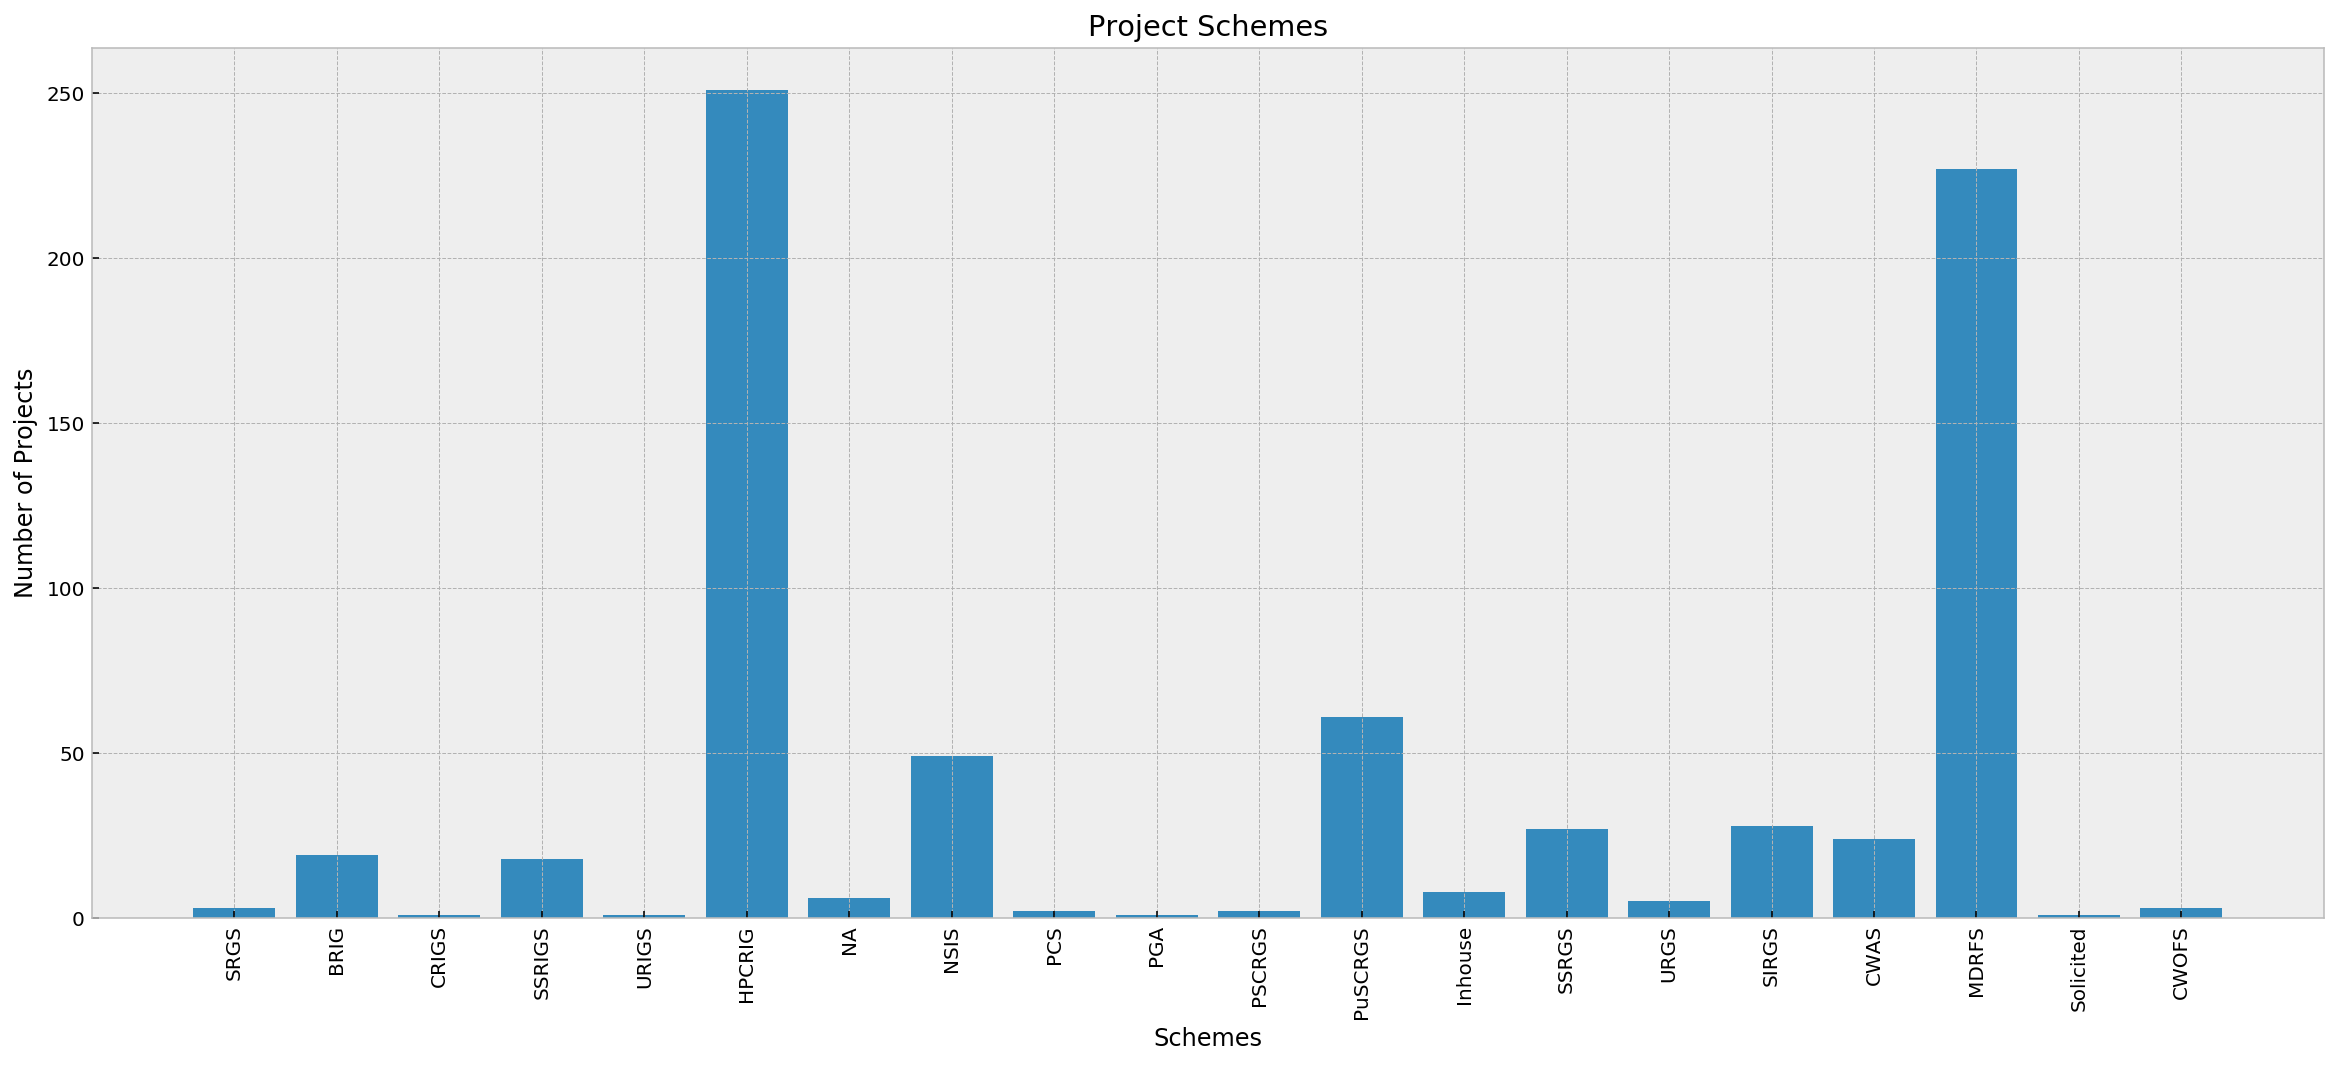

In [63]:
values = pd.value_counts(df_mrc['Scheme'].values, sort =  False)

dif = []
for i in df_mrc['Scheme']:
    if i not in dif:
        dif.append(i)

fig = plt.figure(figsize=(20,8))

plt.bar(dif, values,)
plt.xticks(rotation='vertical')

plt.ylabel('Number of Projects')
plt.xlabel('Schemes')
plt.title('Project Schemes')

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

<Figure size 432x288 with 0 Axes>

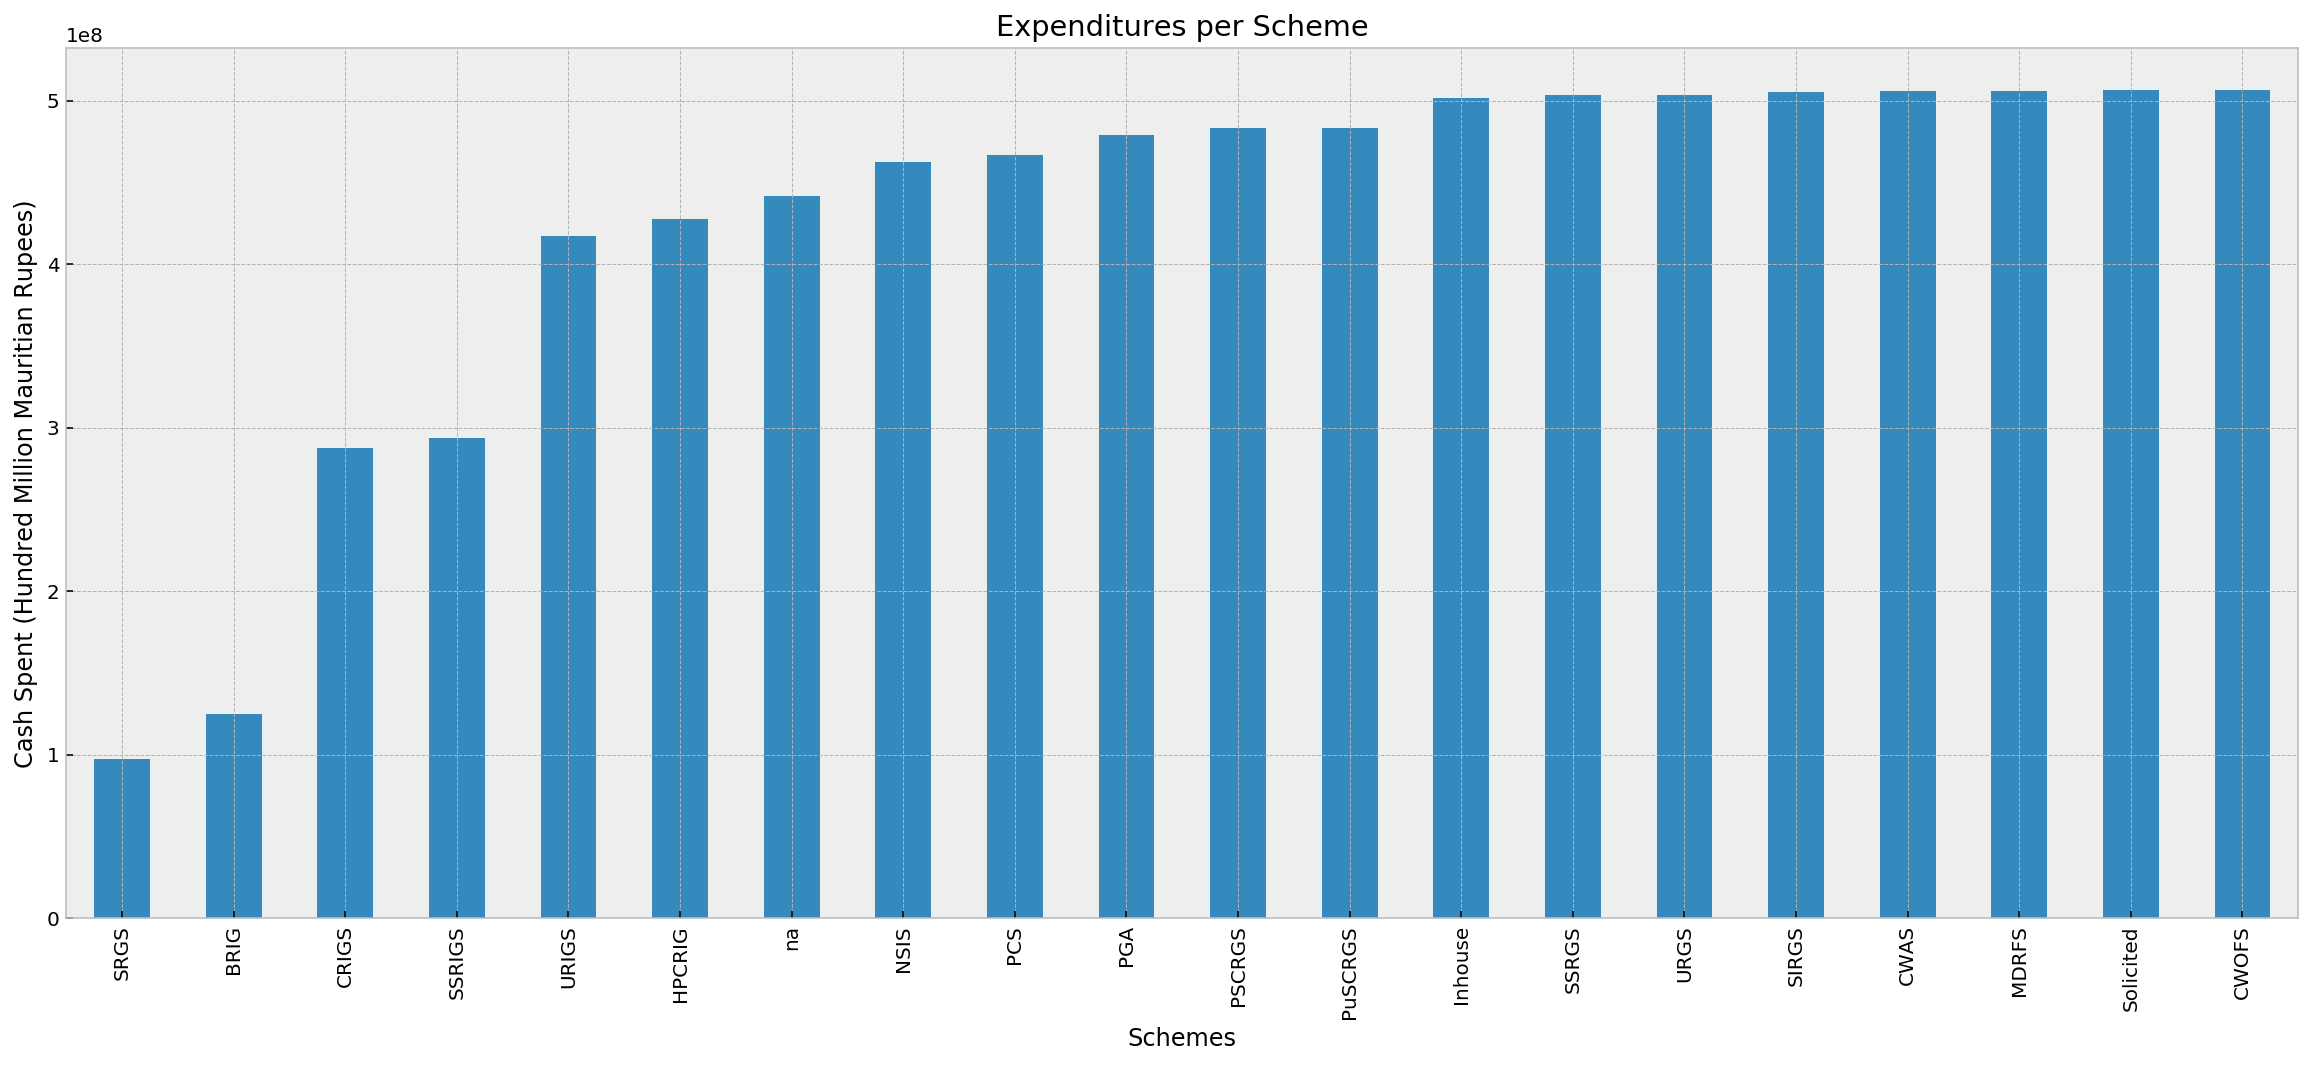

In [64]:
fig = plt.figure()
df_scheme_cash.plot(kind = 'bar', figsize=(20,8), legend = False)
plt.ylabel('Cash Spent (Hundred Million Mauritian Rupees)')
plt.xlabel('Schemes')
plt.title('Expenditures per Scheme')

for item in ax.get_yticklabels():
        yticks = item.get_text() 
ax.set_yticklabels(yticks, fontsize=30)
ax.yaxis.set_tick_params(pad=50)

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

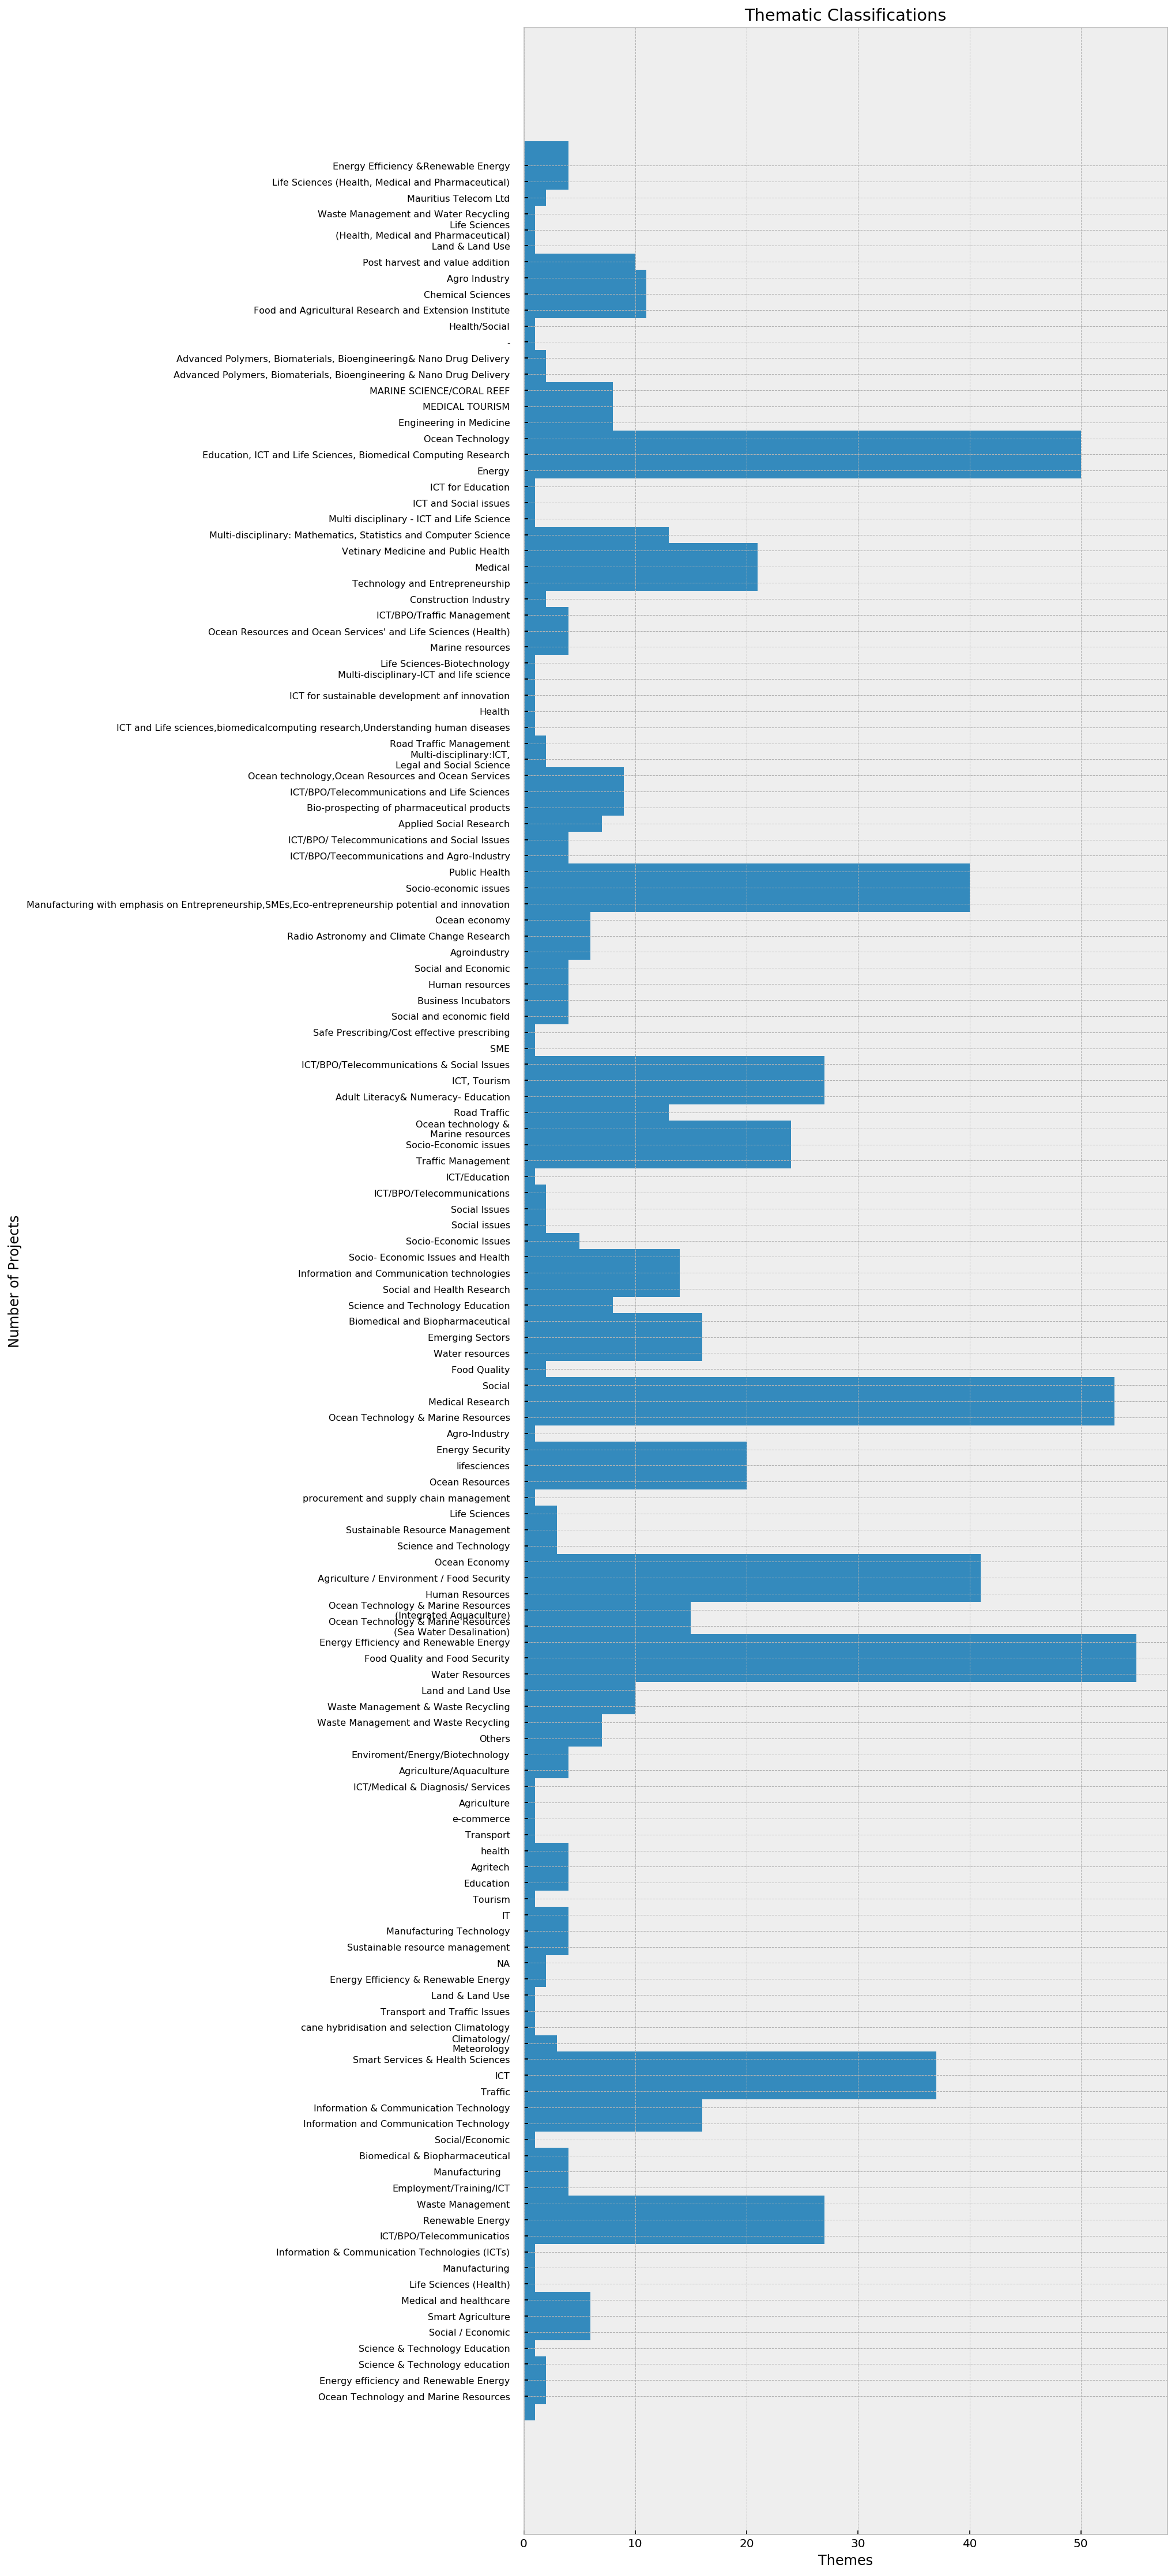

In [65]:
themes = pd.value_counts(df_mrc['Thematic Classification'].values, sort=False)

dif2 = []
for i in df_mrc['Thematic Classification']:
    if i not in dif2:
        dif2.append(i)

fig = plt.figure(figsize=(10, 40))
ax = fig.add_subplot(111)

bar_height = 3

plt.barh(dif2, themes, height = bar_height)

plt.ylabel('Number of Projects')
plt.xlabel('Themes')
plt.title('Thematic Classifications')

ax.yaxis.set_tick_params(width = 1, pad=12, labelsize = 8)

count = count + 1
outPNG = 'figure_{}.png'.format(count)
plt.savefig(outPNG, dpi = 300, bbox_inches = 'tight', transparent  = True)

# SOURCES


"Statistics Mauritius - National Accounts and Investment." Accessed June 24, 2018. http://statsmauritius.govmu.org/English/StatsbySubj/Pages/National-Accounts.aspx.


"Government of Mauritius," November 16, 2012. https://web.archive.org/web/20121116054236/http://www.gov.mu/portal/site/Mainhomepage/menuitem.a42b24128104d9845dabddd154508a0c/?content_id=f13e036cf1f2f010VgnVCM1000000a04a8c0RCRD.


"Statistics Mauritius - Education." Accessed June 24, 2018. http://statsmauritius.govmu.org/English/StatsbySubj/Pages/Education.aspx.


"Statistics Mauritius - Population and Vital Statistics." Accessed July 12, 2018. http://statsmauritius.govmu.org/English/Pages/POPULATION--And-VITAL-STATISTICS.aspx.

**_Special thanks to Dr. Suddhoo, Sandeep, Yogesh, and Rubina for helping with this project_**
